## Loading the data and library

In [1]:
data <- read.csv('E:/Datasets/Wine_Quality/winequalityN.csv')

In [3]:
library('dplyr')
library('ggplot2')
library('corrplot')
library('rpart')
library('party')
library('randomForest')
library('caret')
library('gbm')

options(repr.plot.width = 20, repr.plot.height = 10, scipen = 100)

In [4]:
dim(data)

# Dataset have 13 variables and 6497 observations

[1] 6497   13

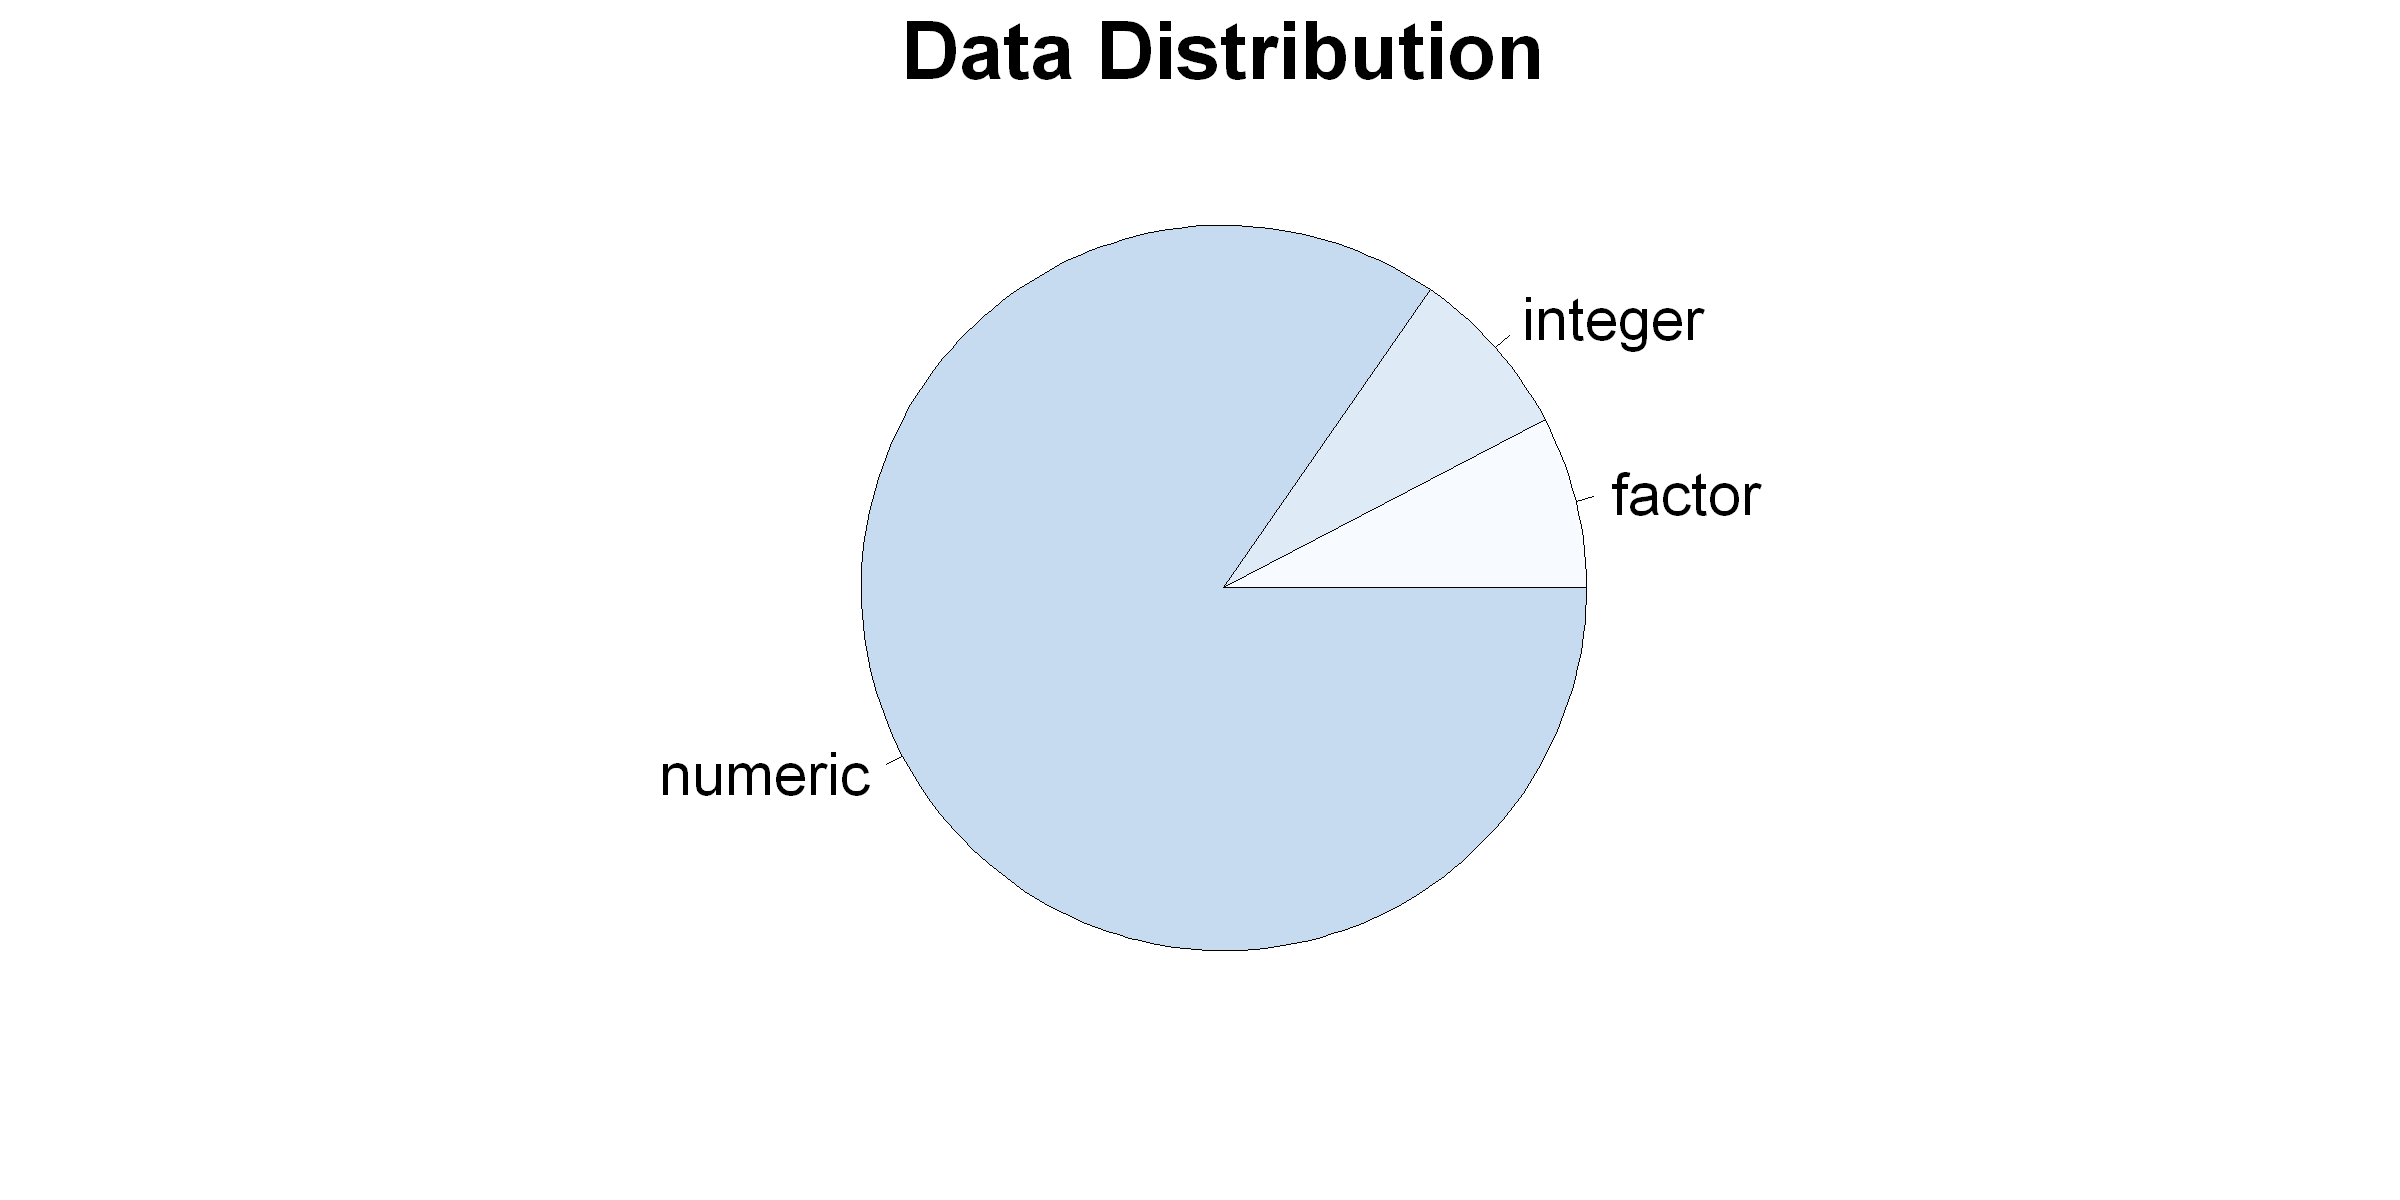

In [5]:
pie(table(sapply(data, class)), main = 'Data Distribution', cex.main = 4, cex = 3, col = blues9)

# around 90% of columns in the dataset is numeric

## Data Cleaning

In [6]:
sapply(data, function(x) sum(is.na(x)))

type        fixed.acidity     volatile.acidity 
                   0                   10                    8 
         citric.acid       residual.sugar            chlorides 
                   3                    2                    2 
 free.sulfur.dioxide total.sulfur.dioxide              density 
                   0                    0                    0 
                  pH            sulphates              alcohol 
                   9                    4                    0 
             quality 
                   0

In [7]:
# Replacing missing values with the mean

data$fixed.acidity <- ifelse(is.na(data$fixed.acidity) == T, mean(data$fixed.acidity, na.rm = T), data$fixed.acidity)
data$volatile.acidity <- ifelse(is.na(data$volatile.acidity)==T, mean(data$volatile.acidity,na.rm=T),data$volatile.acidity)
data$citric.acid <- ifelse(is.na(data$citric.acid) == T, mean(data$citric.acid, na.rm = T), data$citric.acid)
data$residual.sugar <- ifelse(is.na(data$residual.sugar) == T, mean(data$residual.sugar, na.rm = T), data$residual.sugar)
data$chlorides <- ifelse(is.na(data$chlorides) == T, mean(data$chlorides, na.rm = T), data$chlorides)
data$pH <- ifelse(is.na(data$pH) == T, mean(data$pH, na.rm = T), data$pH)
data$sulphates <- ifelse(is.na(data$sulphates) == T, mean(data$sulphates, na.rm = T), data$sulphates)

In [8]:
sapply(data, function(x) sum(is.na(x)))

type        fixed.acidity     volatile.acidity 
                   0                    0                    0 
         citric.acid       residual.sugar            chlorides 
                   0                    0                    0 
 free.sulfur.dioxide total.sulfur.dioxide              density 
                   0                    0                    0 
                  pH            sulphates              alcohol 
                   0                    0                    0 
             quality 
                   0

## Dividing the data into train and test

In [9]:
set.seed(100)

samp <- sample(seq_len(nrow(data)), size = floor(nrow(data)*0.8))
train <- data[samp,]
test <- data[-samp,]

In [10]:
nrow(data)
nrow(train)
nrow(test)

[1] 6497

[1] 5197

[1] 1300

## Pearson Correlation

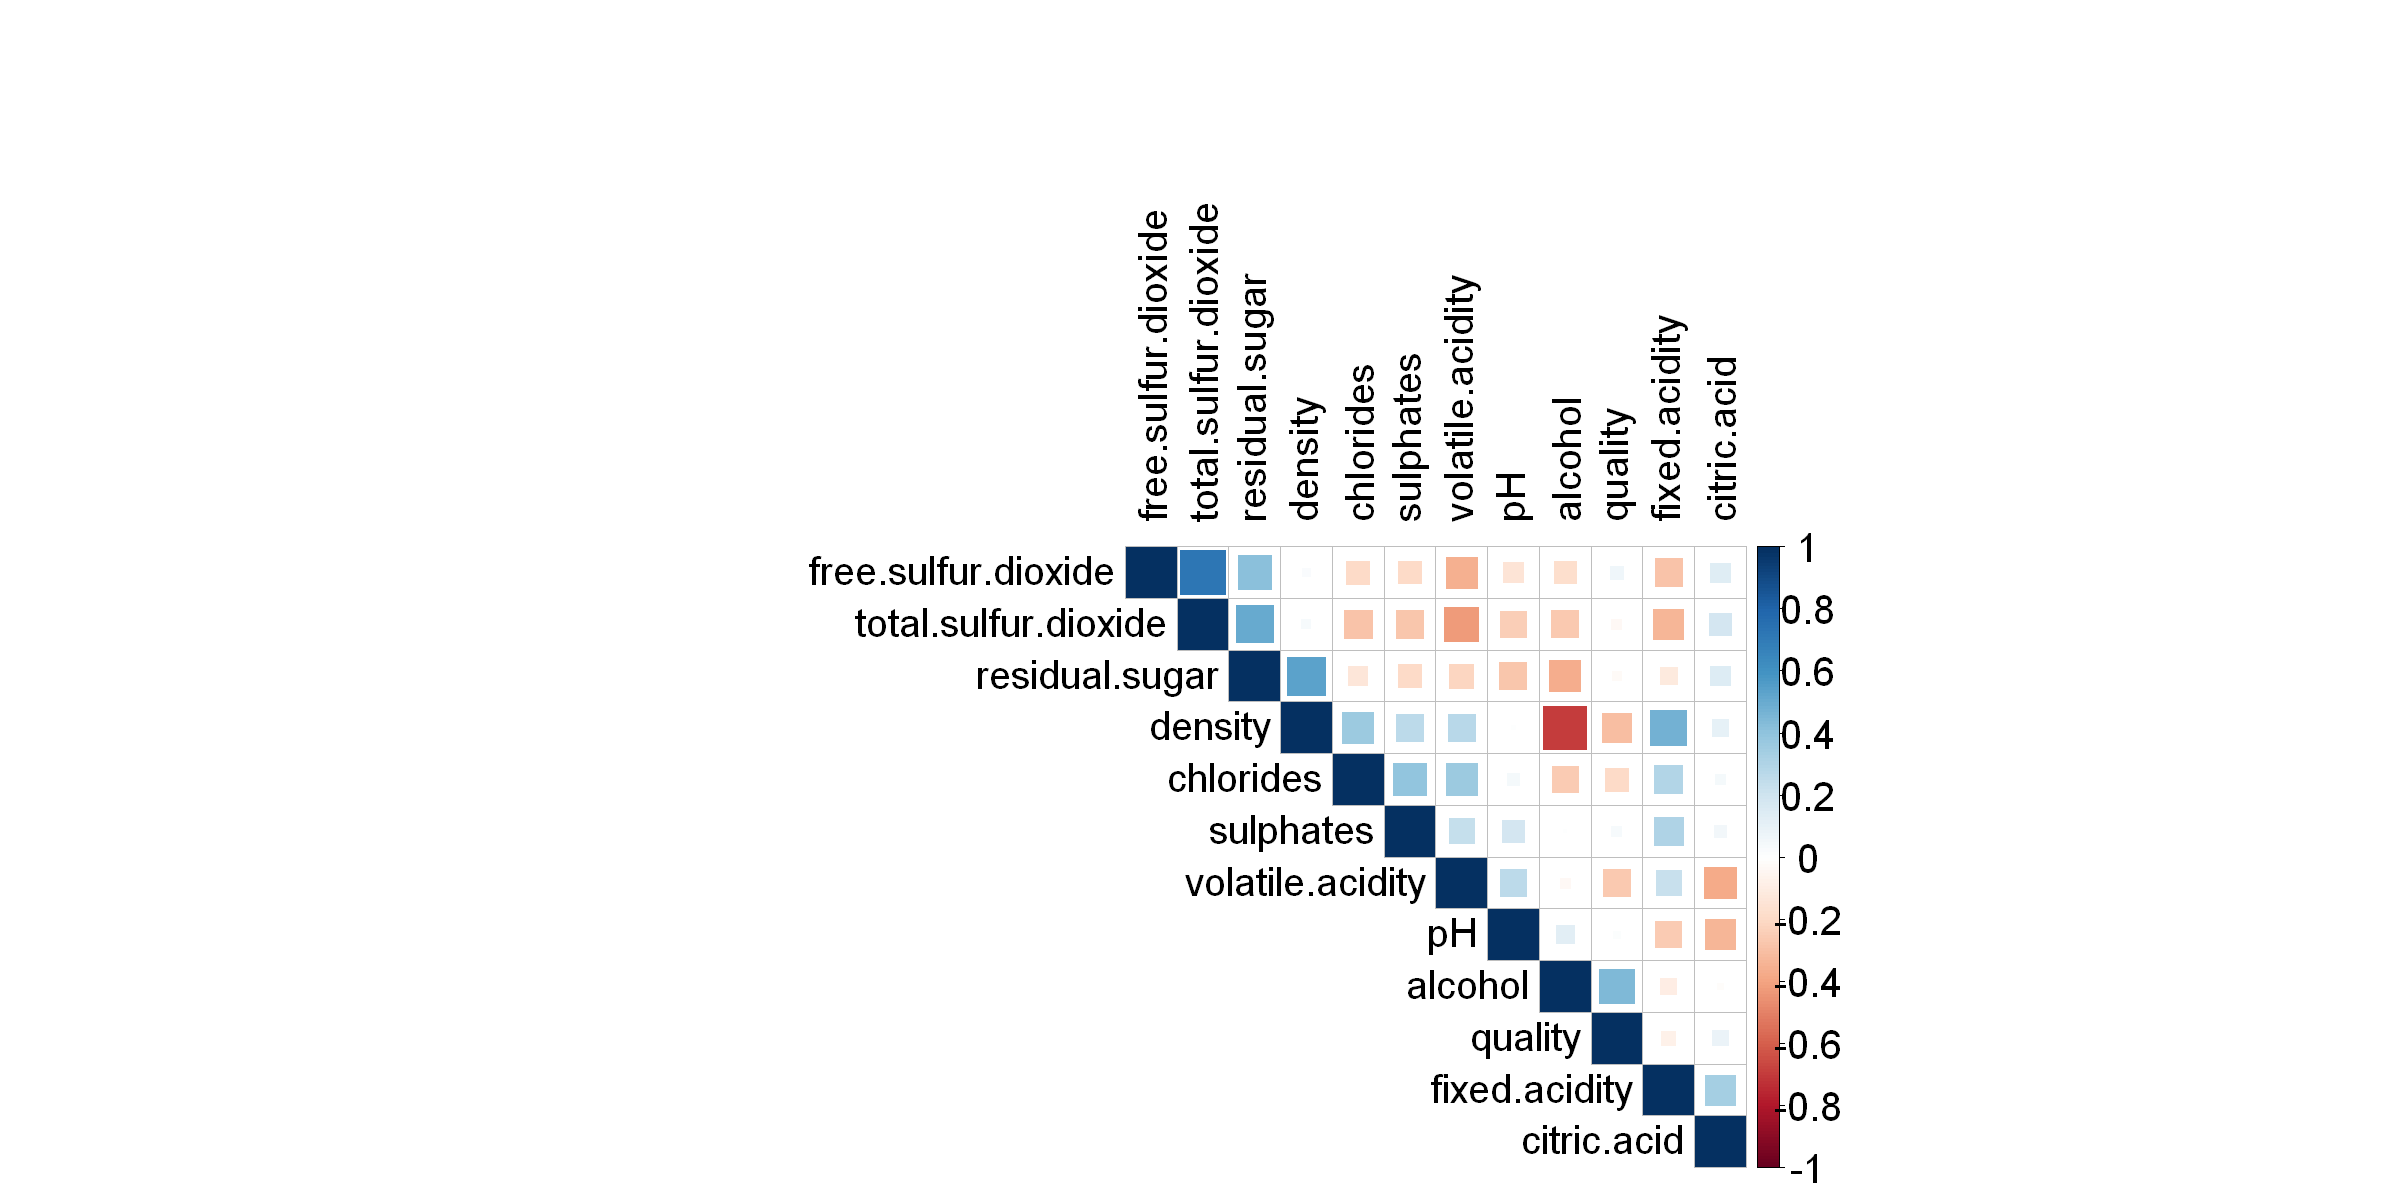

In [11]:
c <- cor(train[, sapply(train, function(x) is.numeric(x))])
corrplot(c, order = 'hclust', method = 'square', type = 'upper', cl.cex = 2, tl.cex = 2, tl.col = 'black')

## Exploratory data analysis

In [12]:
train %>% group_by(type) %>% count

# 75.18% wine's are white type of wine.

type,n
<fct>,<int>
red,1285
white,3912


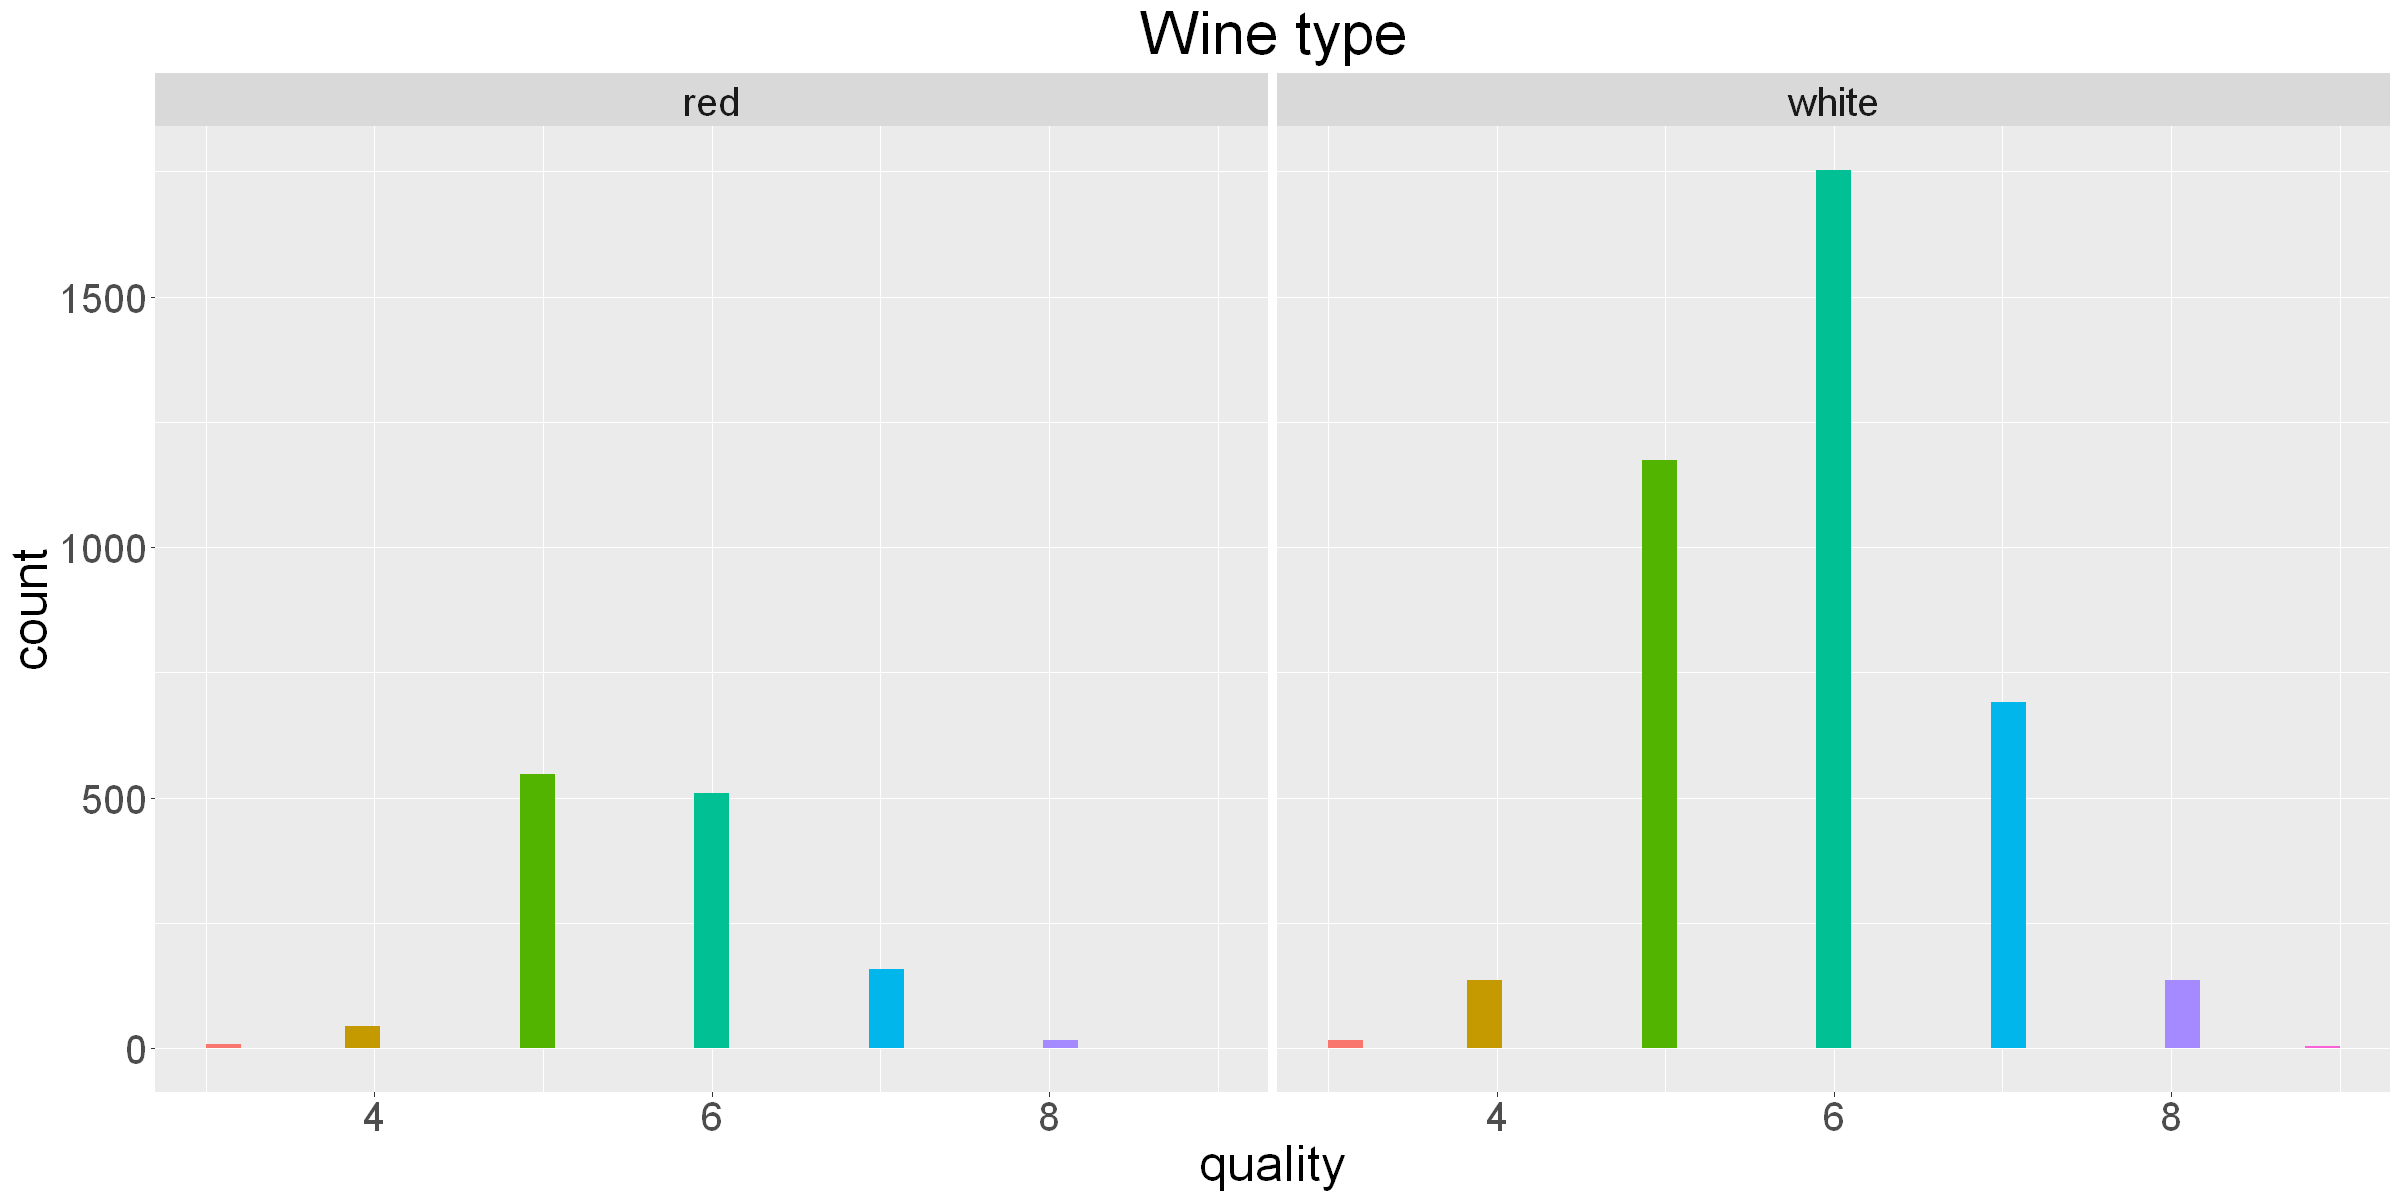

In [13]:
ggplot(train) + geom_histogram(aes(quality, fill = factor(quality)), bins =30) + facet_wrap(~type) + ggtitle('Wine type') +
theme(text = element_text(size = 30), plot.title = element_text(hjust = 0.5), legend.position = 'Null')

# In red wine, there is no wine of quality 9.
# 44.61% of white wine's is of quality 6.(Most of the white wine's is of quality 6).
# 42.18% of red wine's is of quality 5 where as 40.69% wine's are of quality 6.

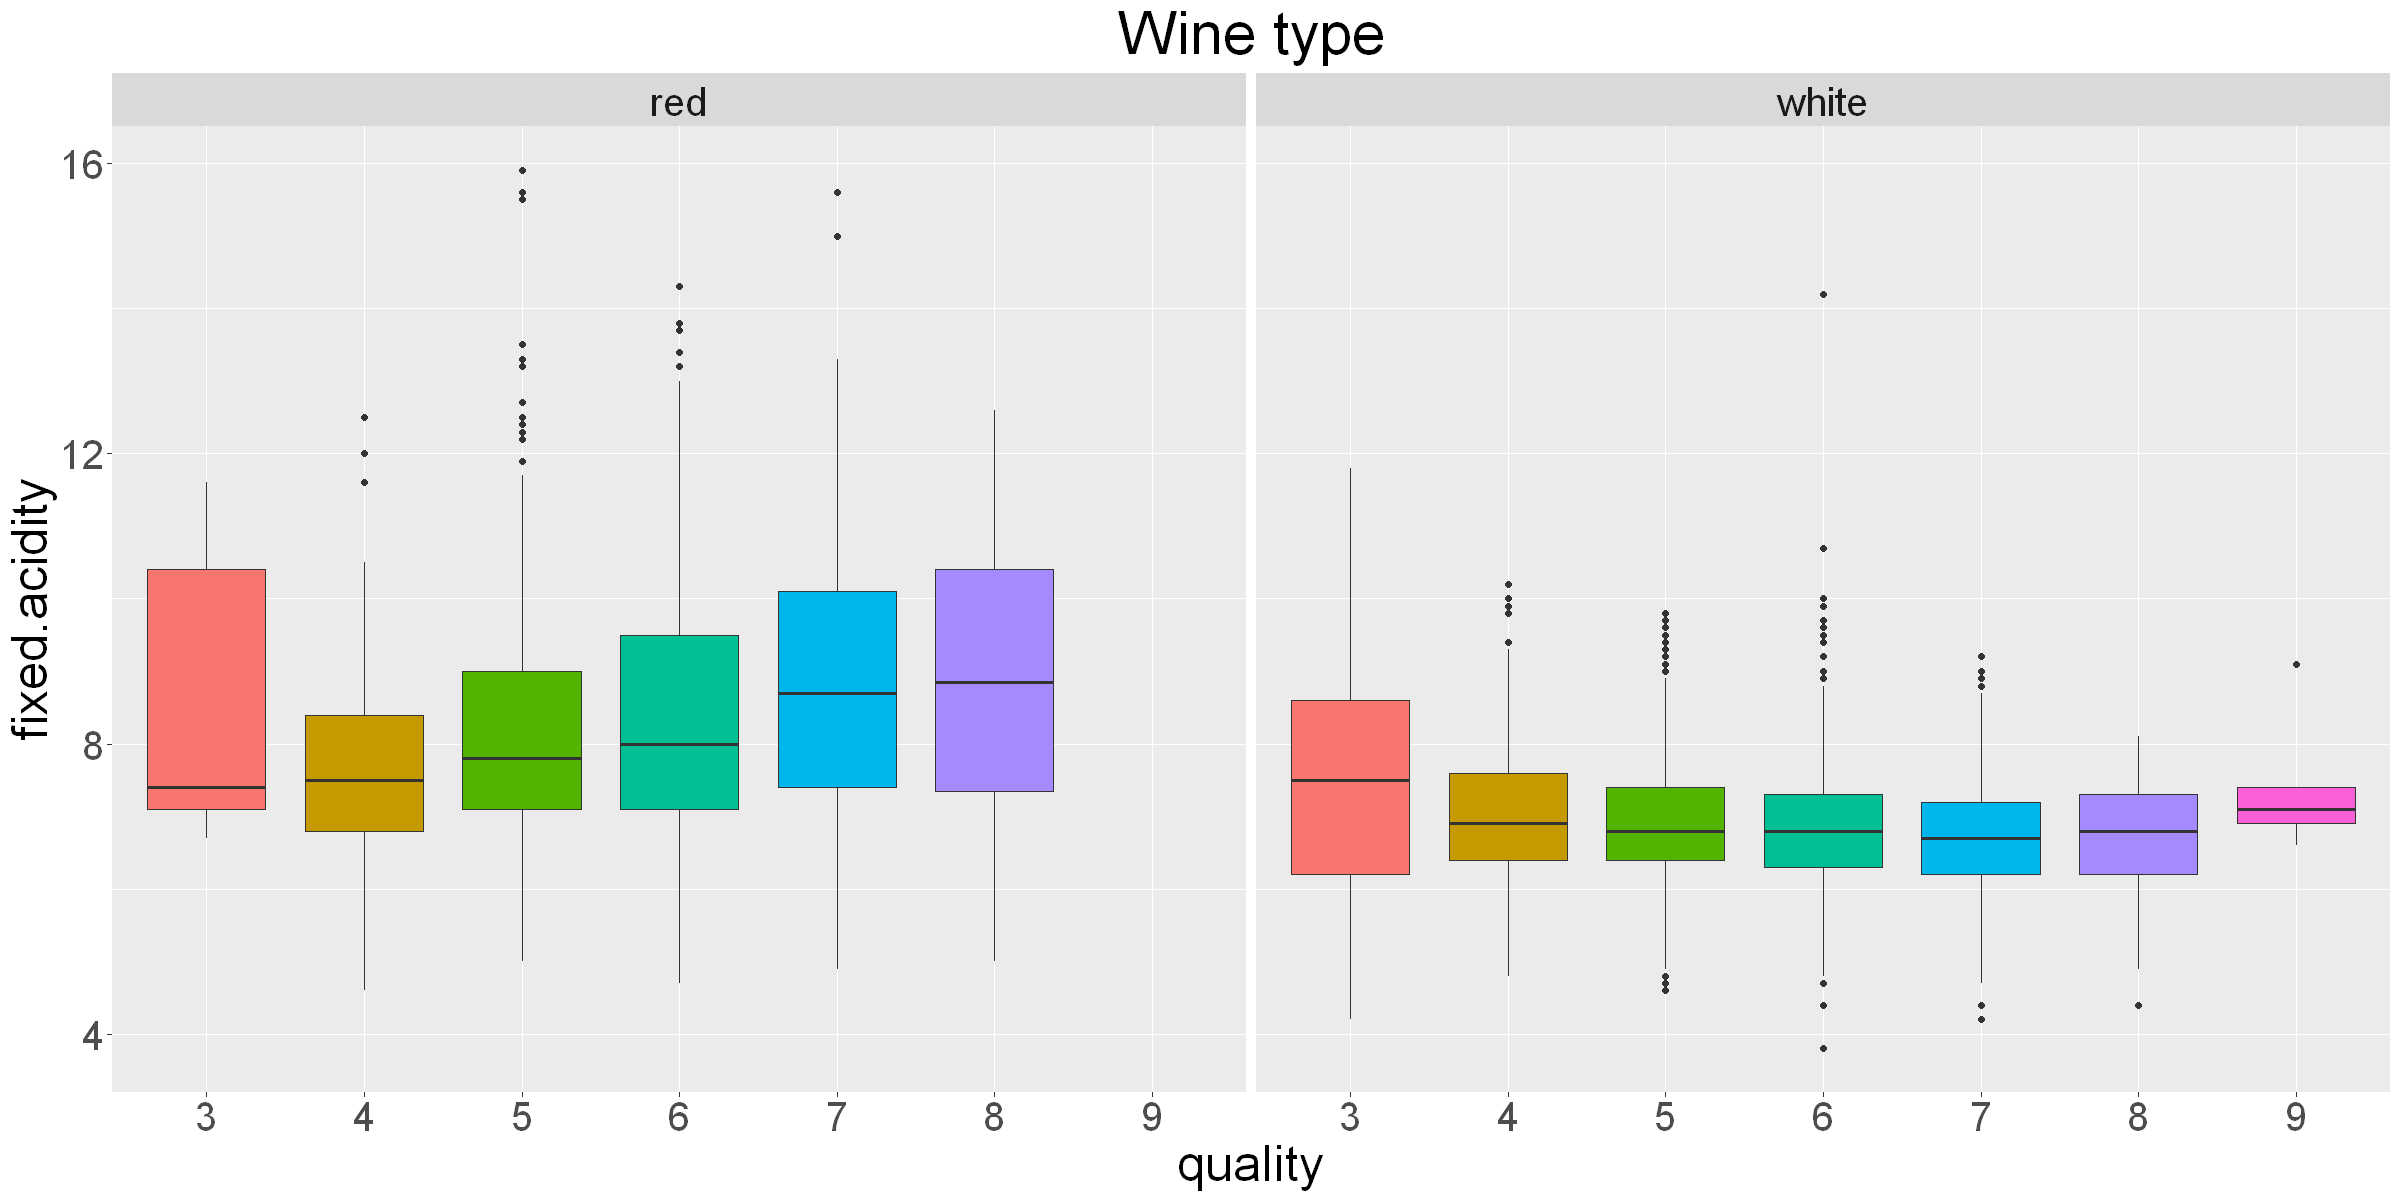

In [14]:
ggplot(train, aes(factor(quality), fixed.acidity)) + geom_boxplot(aes(fill = factor(quality))) + labs(x = 'quality') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
facet_wrap(~type) + ggtitle('Wine type')

# Wine's of quality 5,6 and 7 have many outliers.
# fixed.acidtiy increases as the quality of the red wine increases but we can't conclude the same for white wine.
# white wine have relatively less fixed.acidity then red wine.

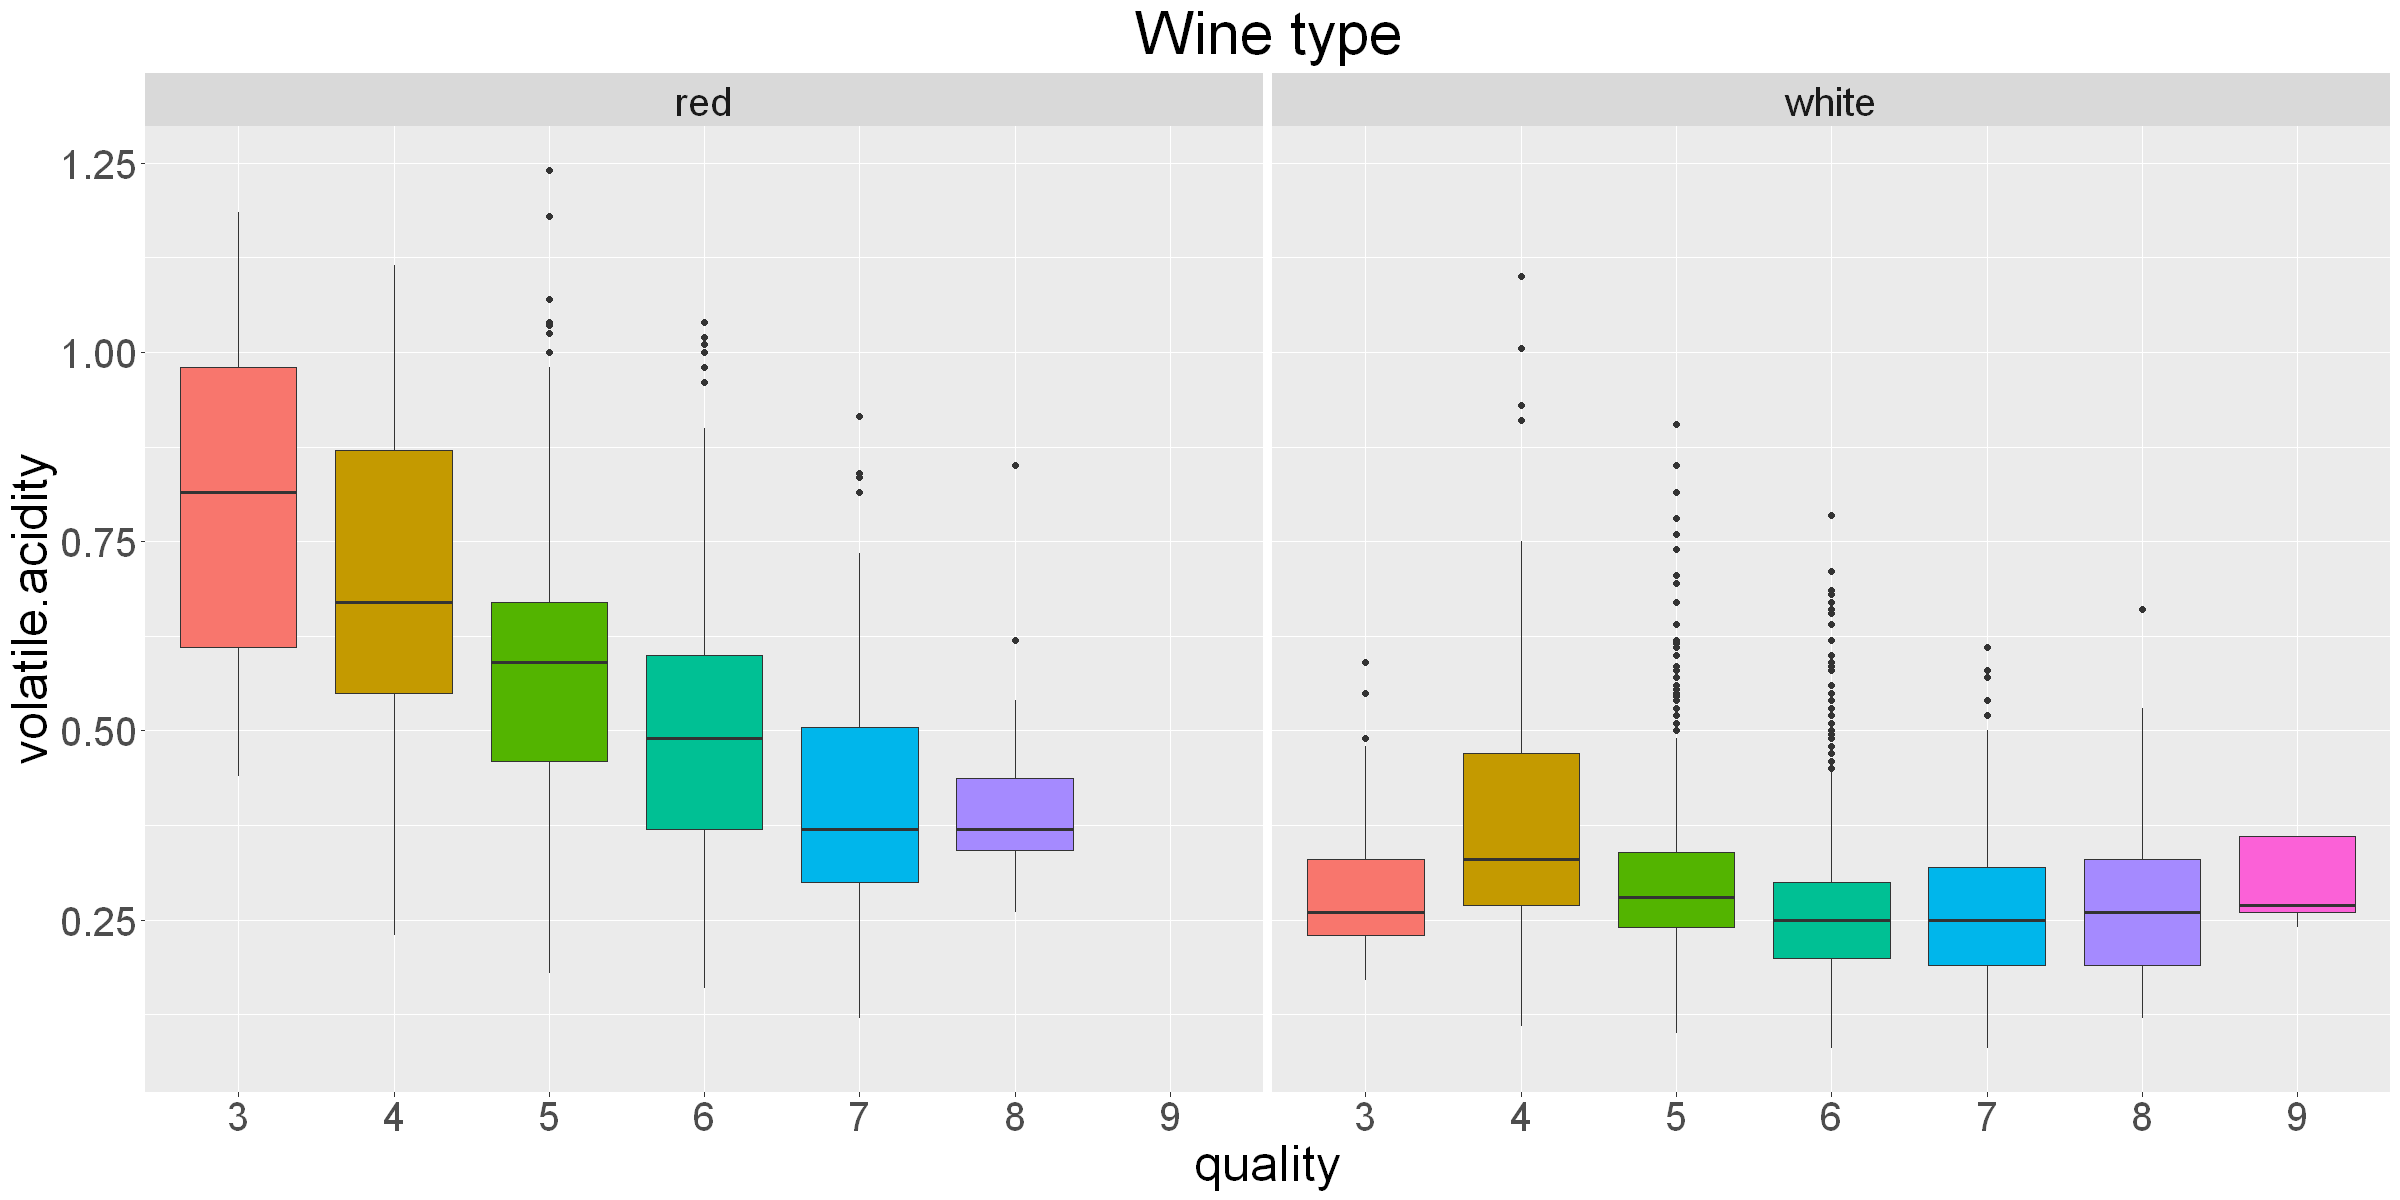

In [15]:
ggplot(train, aes(factor(quality), volatile.acidity)) + geom_boxplot(aes(fill = factor(quality))) + labs(x = 'quality') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
facet_wrap(~type) + ggtitle('Wine type')

# volatile.acidity decreses as the quality increses for red wine but such relative trend isn't found for white wine's.
# there are too many outliers for white wine of quality 5 and 6.
# red wine type have relatively more volatile.acidity than white wine,

`geom_smooth()` using formula 'y ~ x'



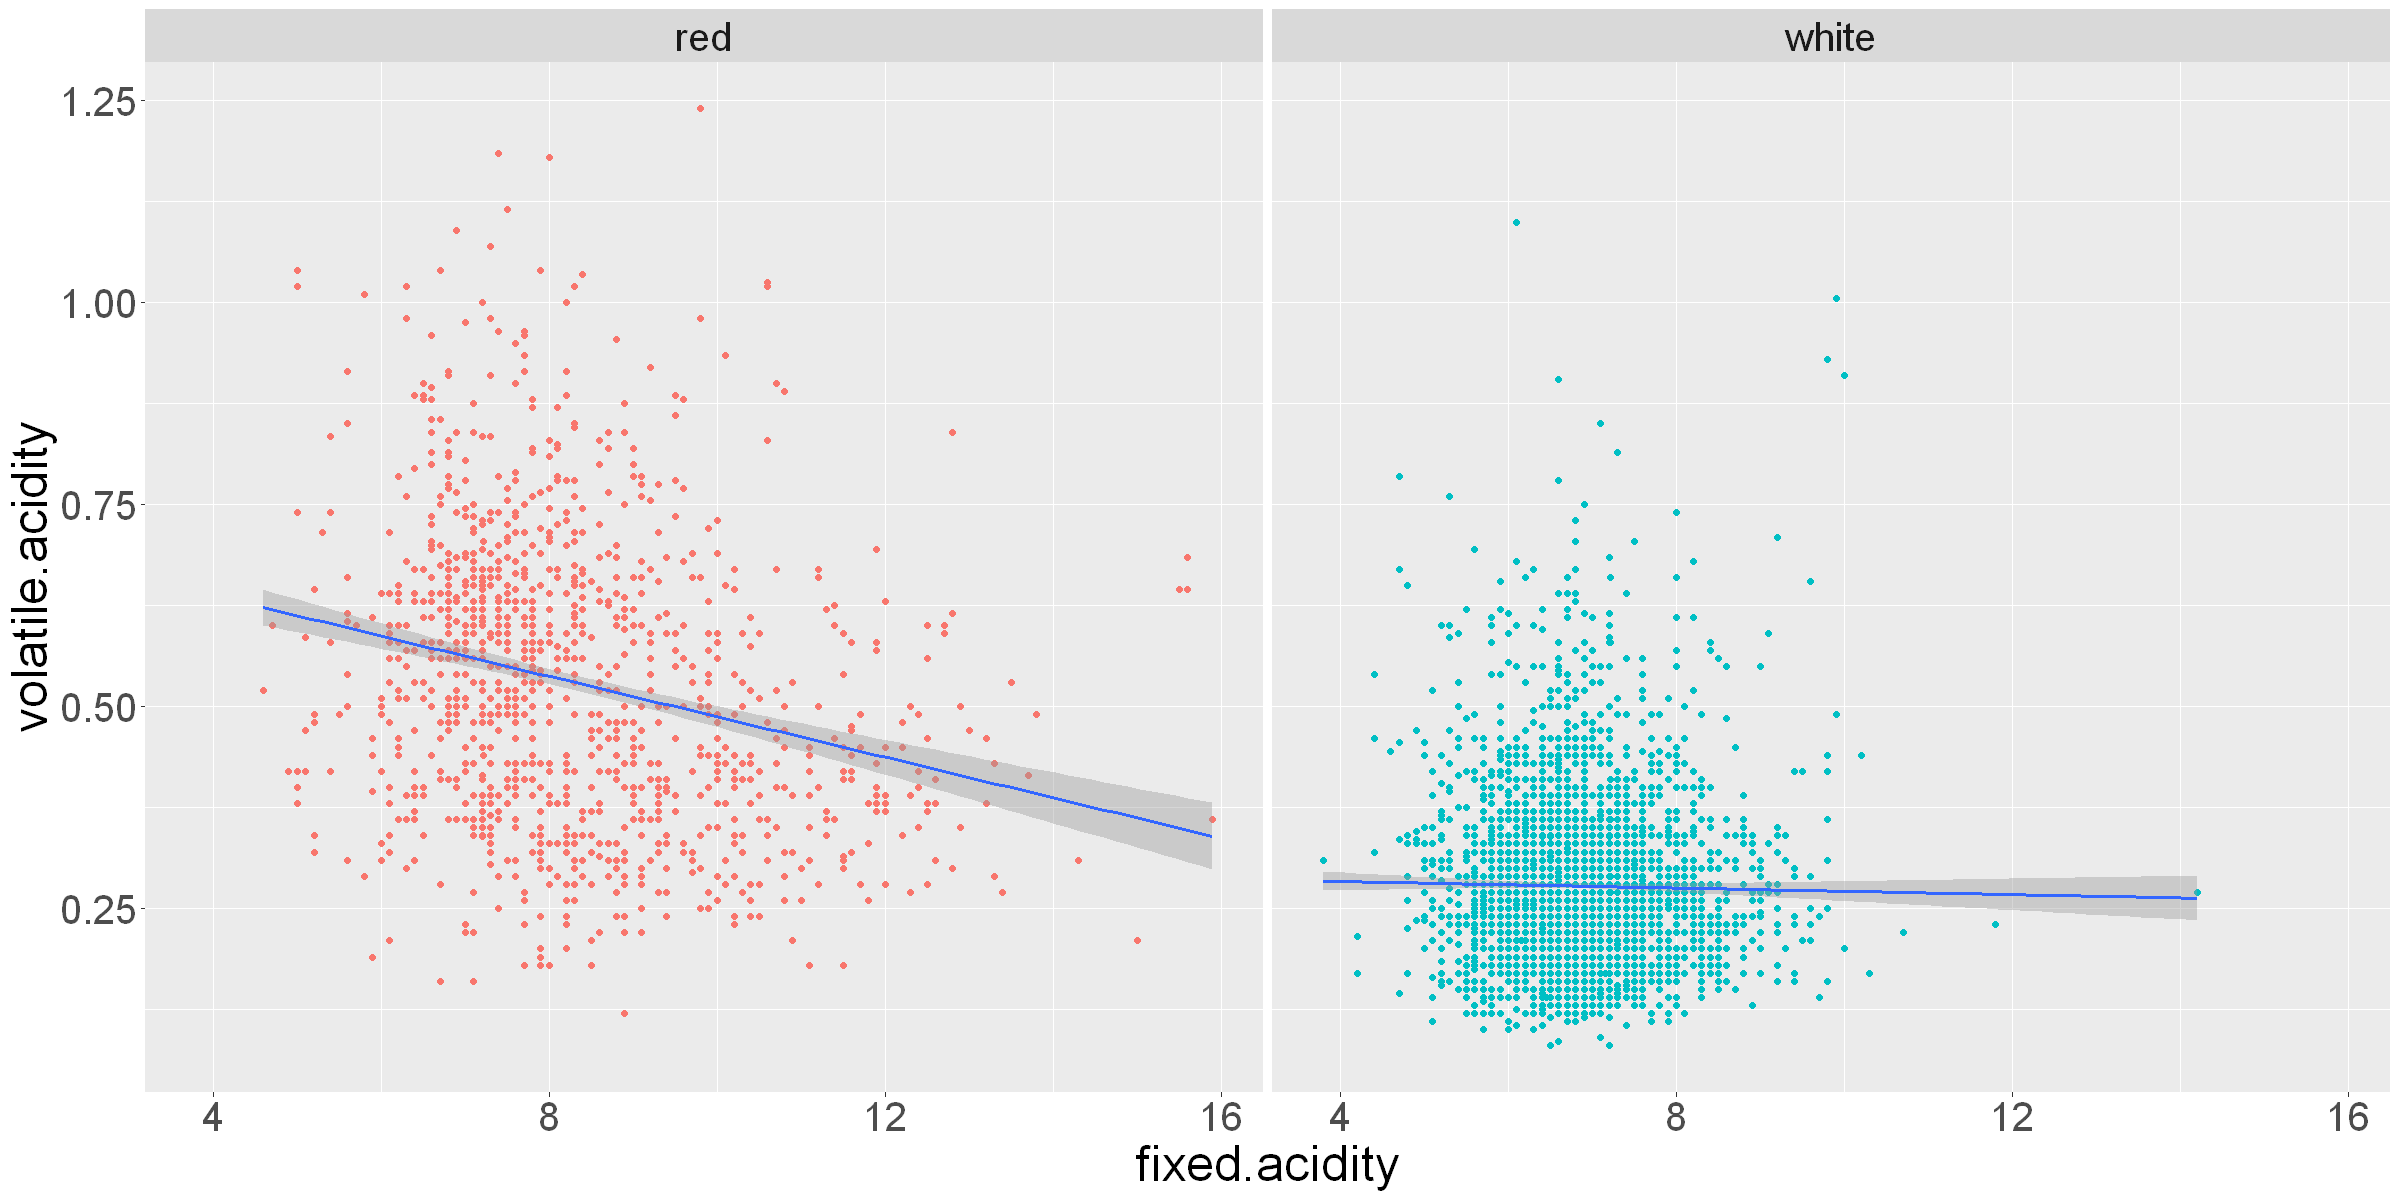

In [16]:
ggplot(train,aes(fixed.acidity, volatile.acidity)) + geom_point(aes(col = factor(type))) + geom_smooth(method = 'lm') +
theme(text = element_text(size = 30), legend.position = 'Null') + facet_wrap(~type)

# In general, fixed.acidity and volatile.acidity are directly proportional.

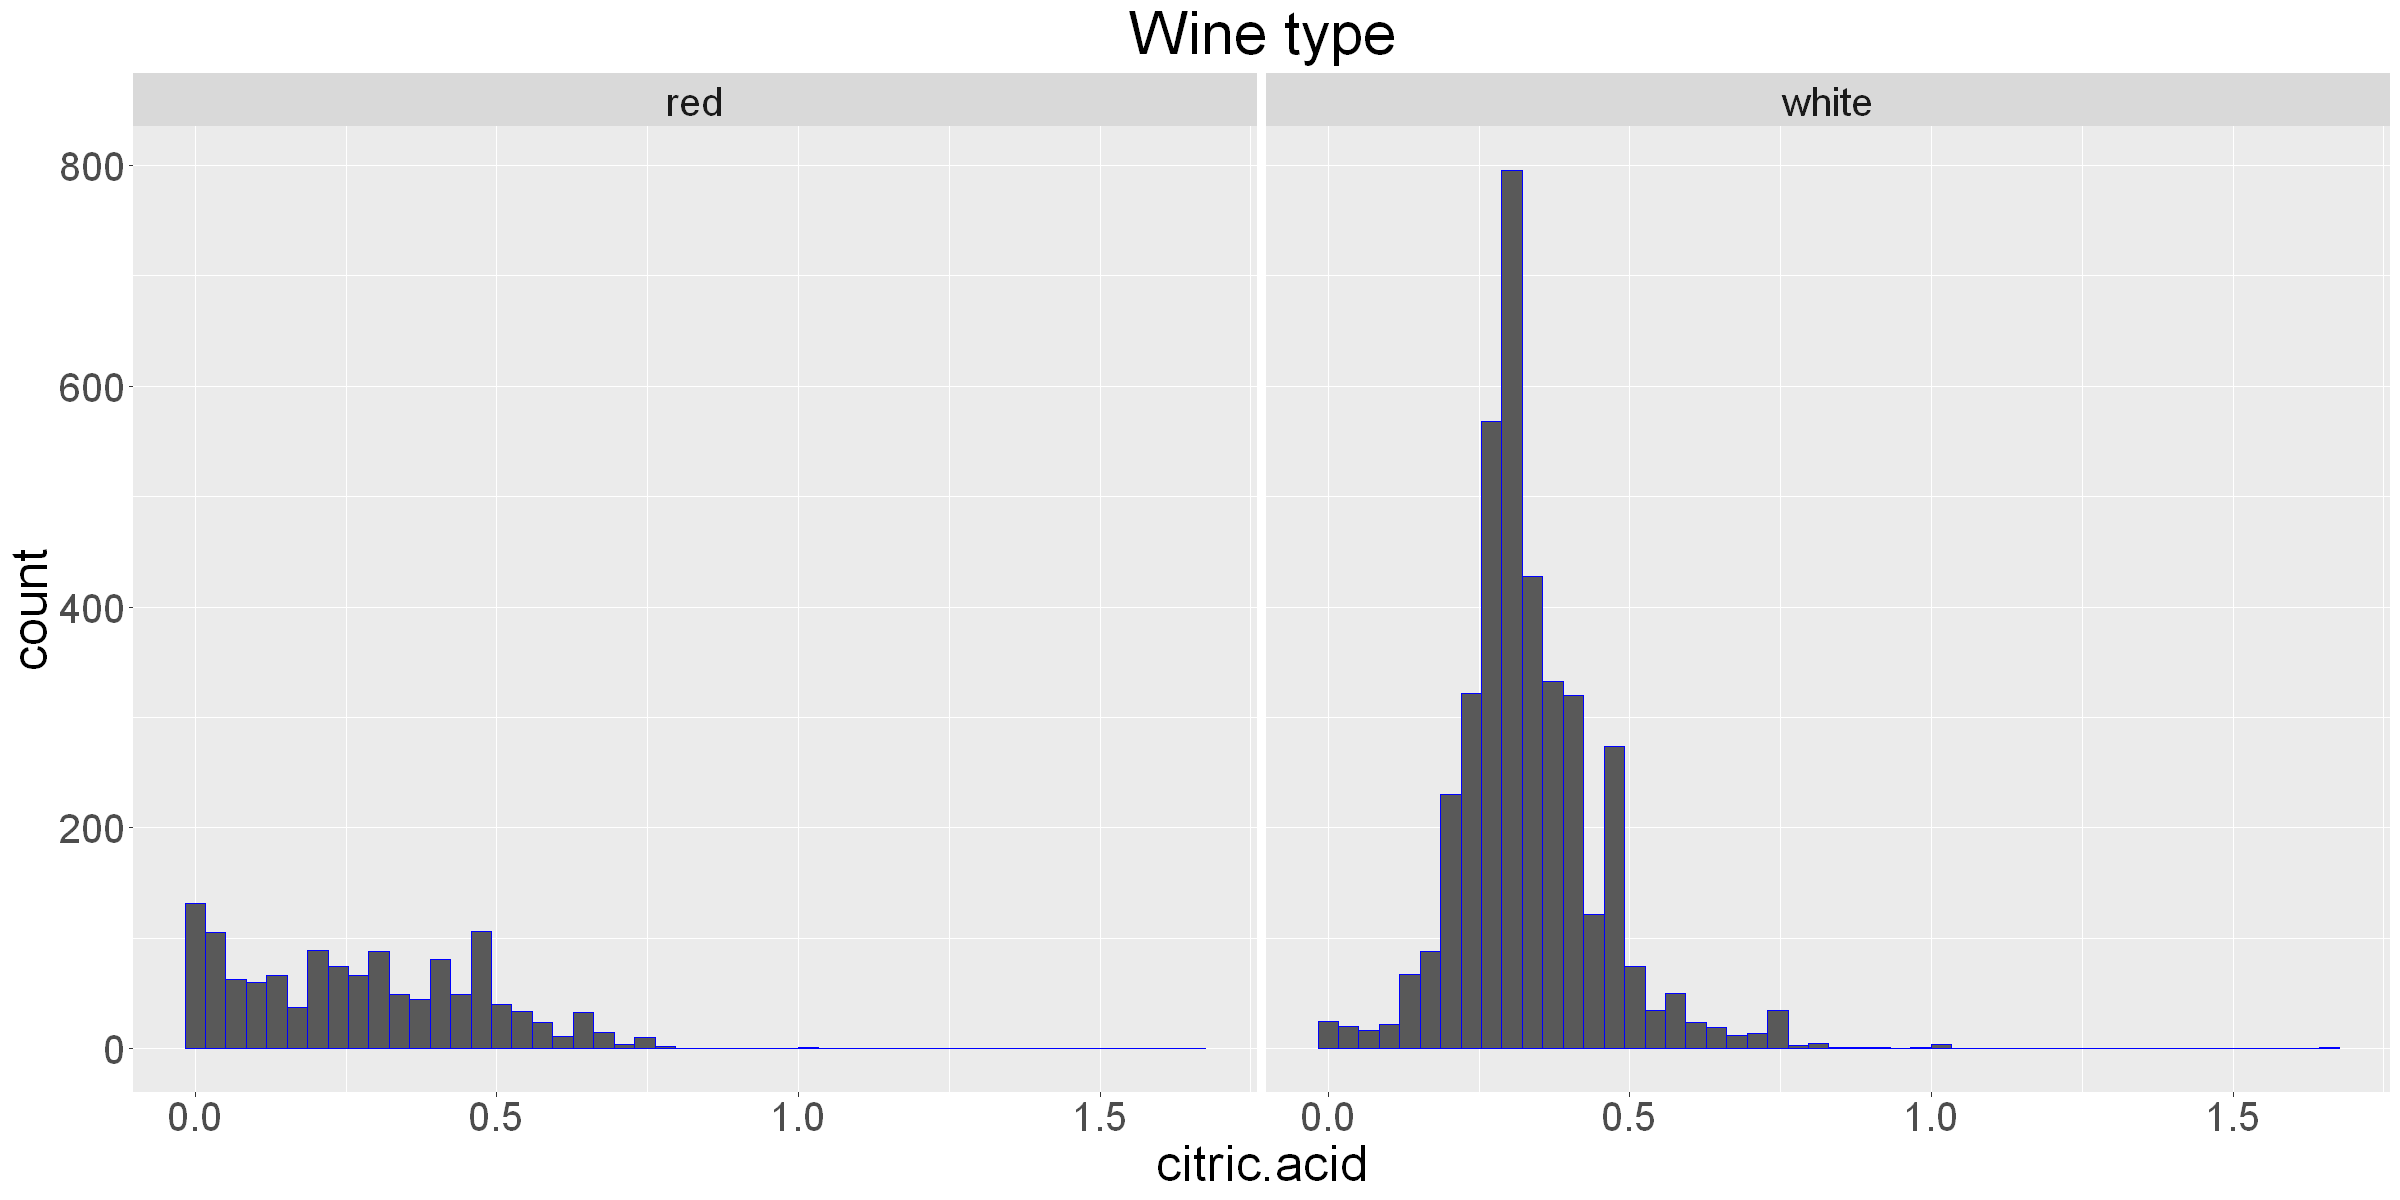

In [17]:
ggplot(train) + geom_histogram(aes(citric.acid), bins = 50, col = 'blue') + theme(text = element_text(size = 30)) + 
facet_wrap(~type) + ggtitle('Wine type') + theme(plot.title = element_text(hjust = 0.5))

# Most of the white wine have a citric.acid of 0.33.
# Majority of red wine have a ciric.acid of 0.43 after 0.
# Max citric.acid present in red wine is 0.8 after 1(but only 1) and in white wine max citric.acid value is 1.8.

`geom_smooth()` using formula 'y ~ x'



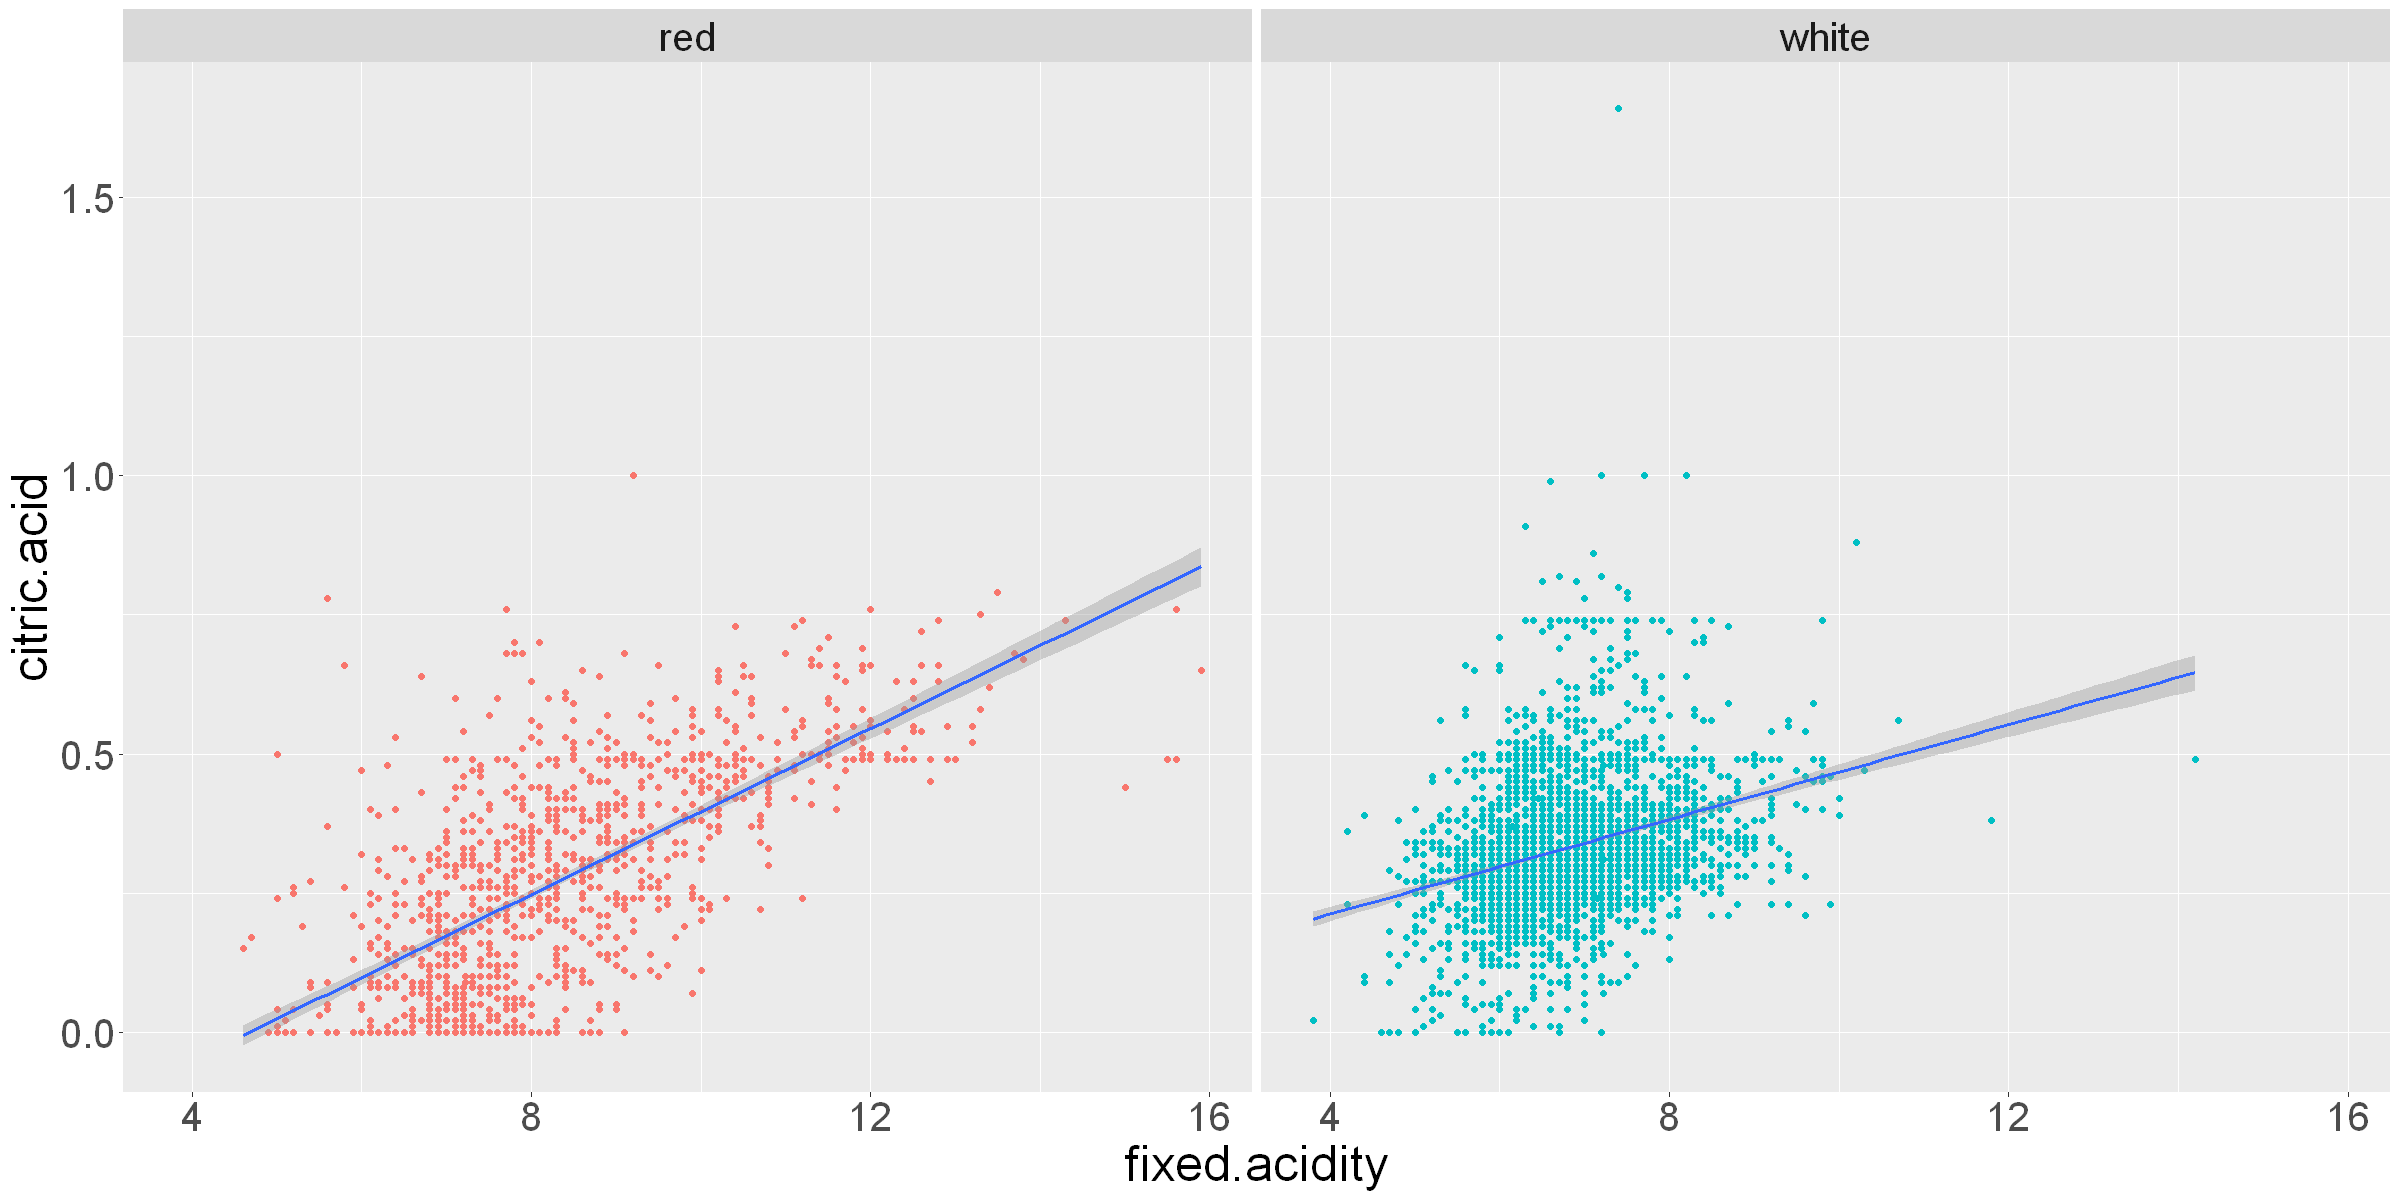

In [18]:
ggplot(train,aes(fixed.acidity, citric.acid)) + geom_point(aes(col = factor(type))) + geom_smooth(method = 'lm') +
theme(text = element_text(size = 30), legend.position = 'Null') + facet_wrap(~type)

# fixed.acidity and citric.acid are directly proportional.

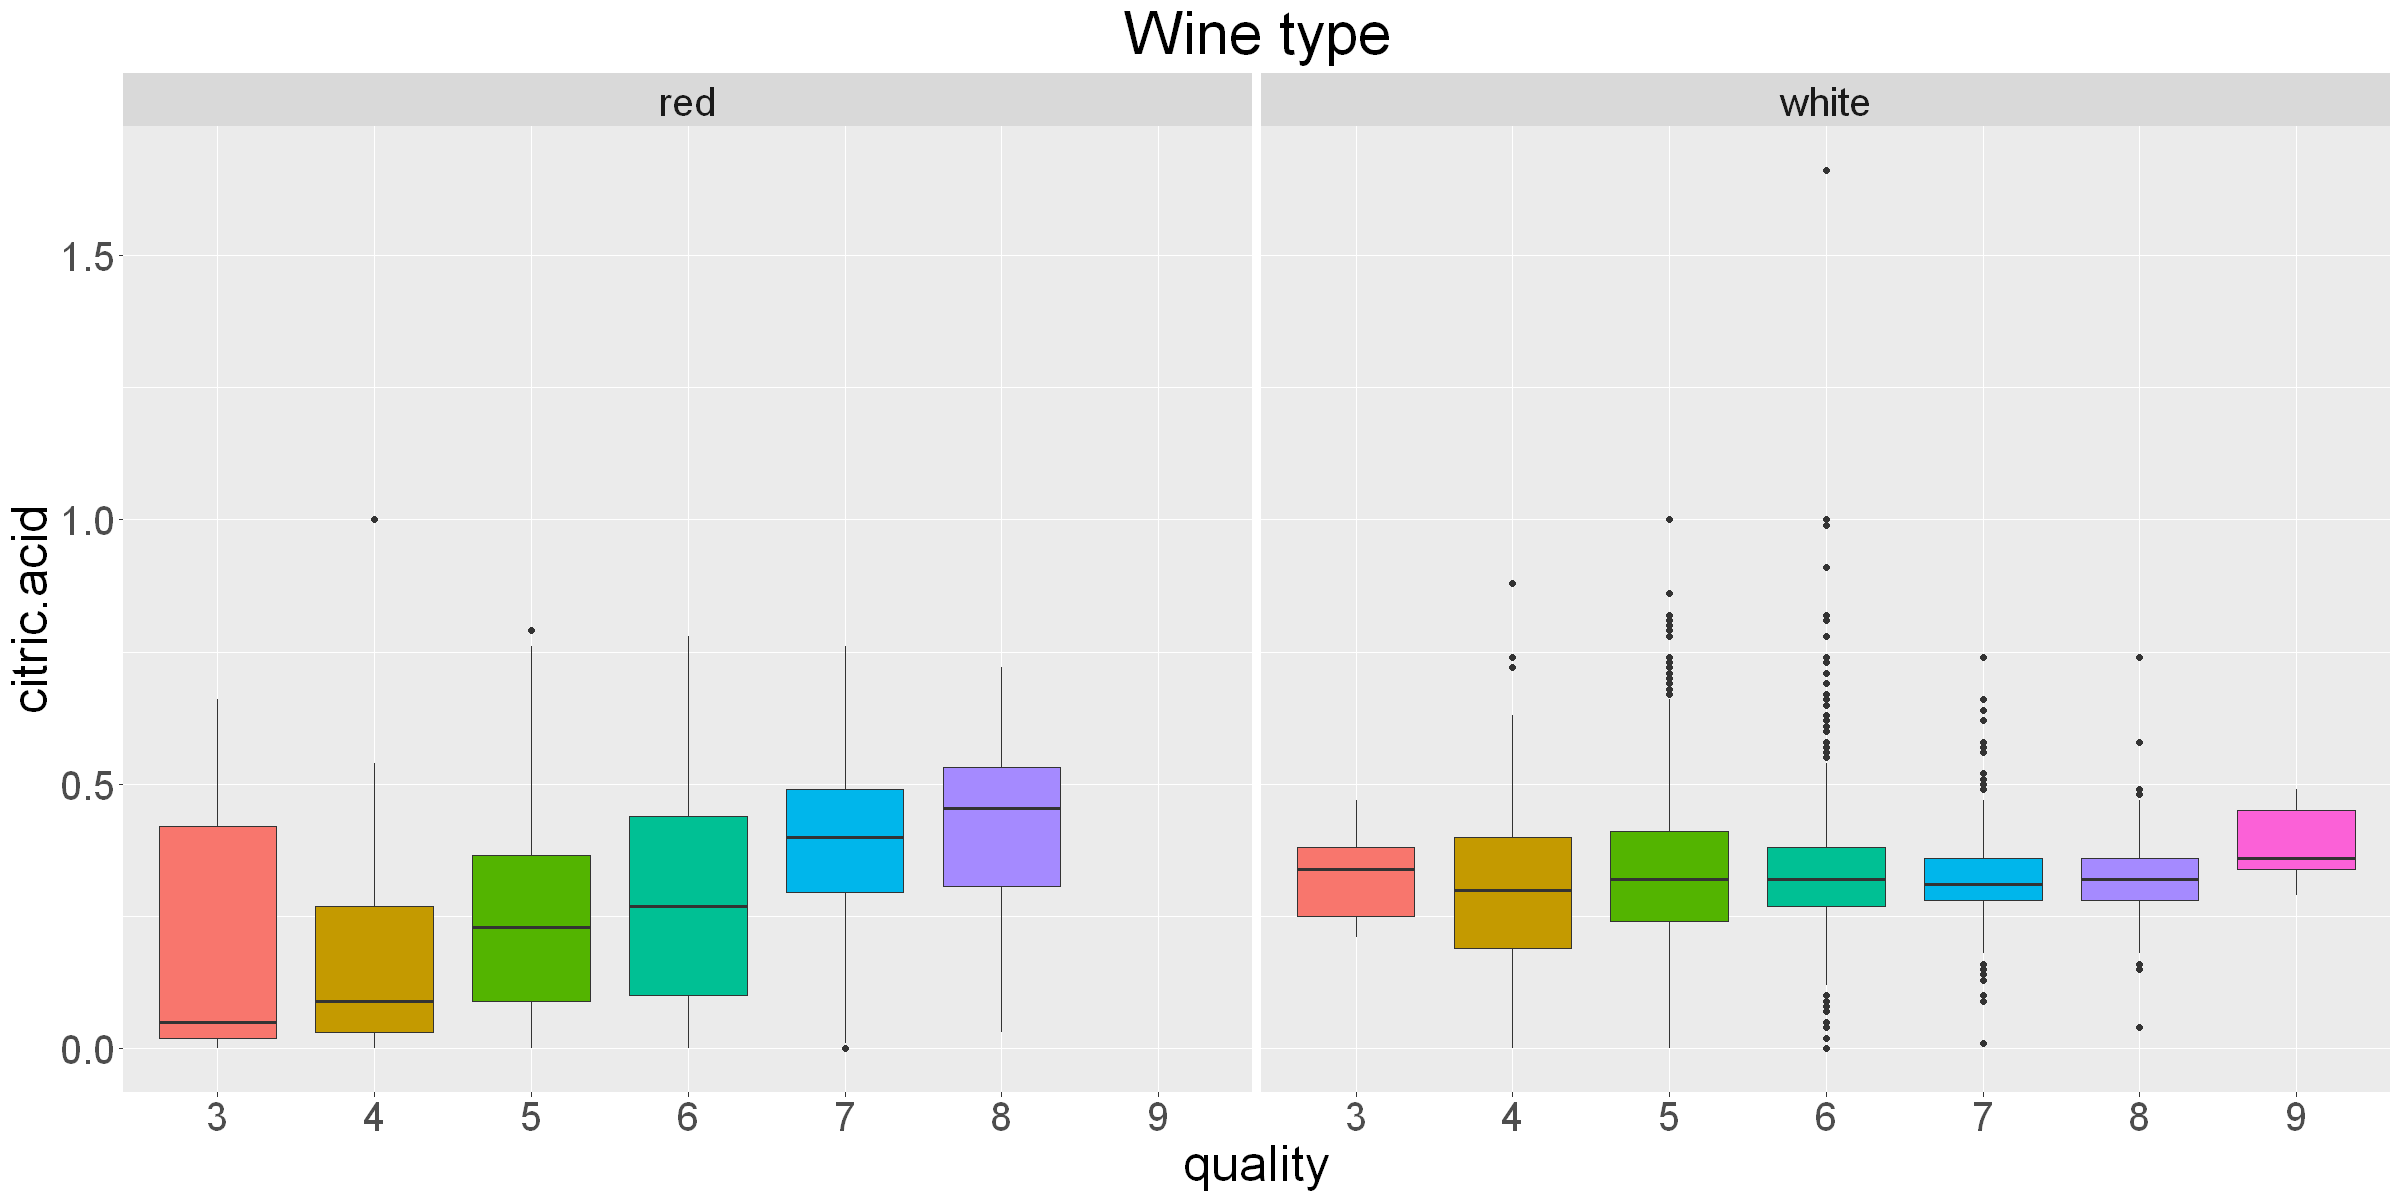

In [19]:
ggplot(train, aes(factor(quality), citric.acid)) + geom_boxplot(aes(fill = factor(quality))) + labs(x = 'quality') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
facet_wrap(~type) + ggtitle('Wine type')

# citric.acid increases as the quality of wine improves for red wine but such trend isn't found for white wine.

`geom_smooth()` using formula 'y ~ x'



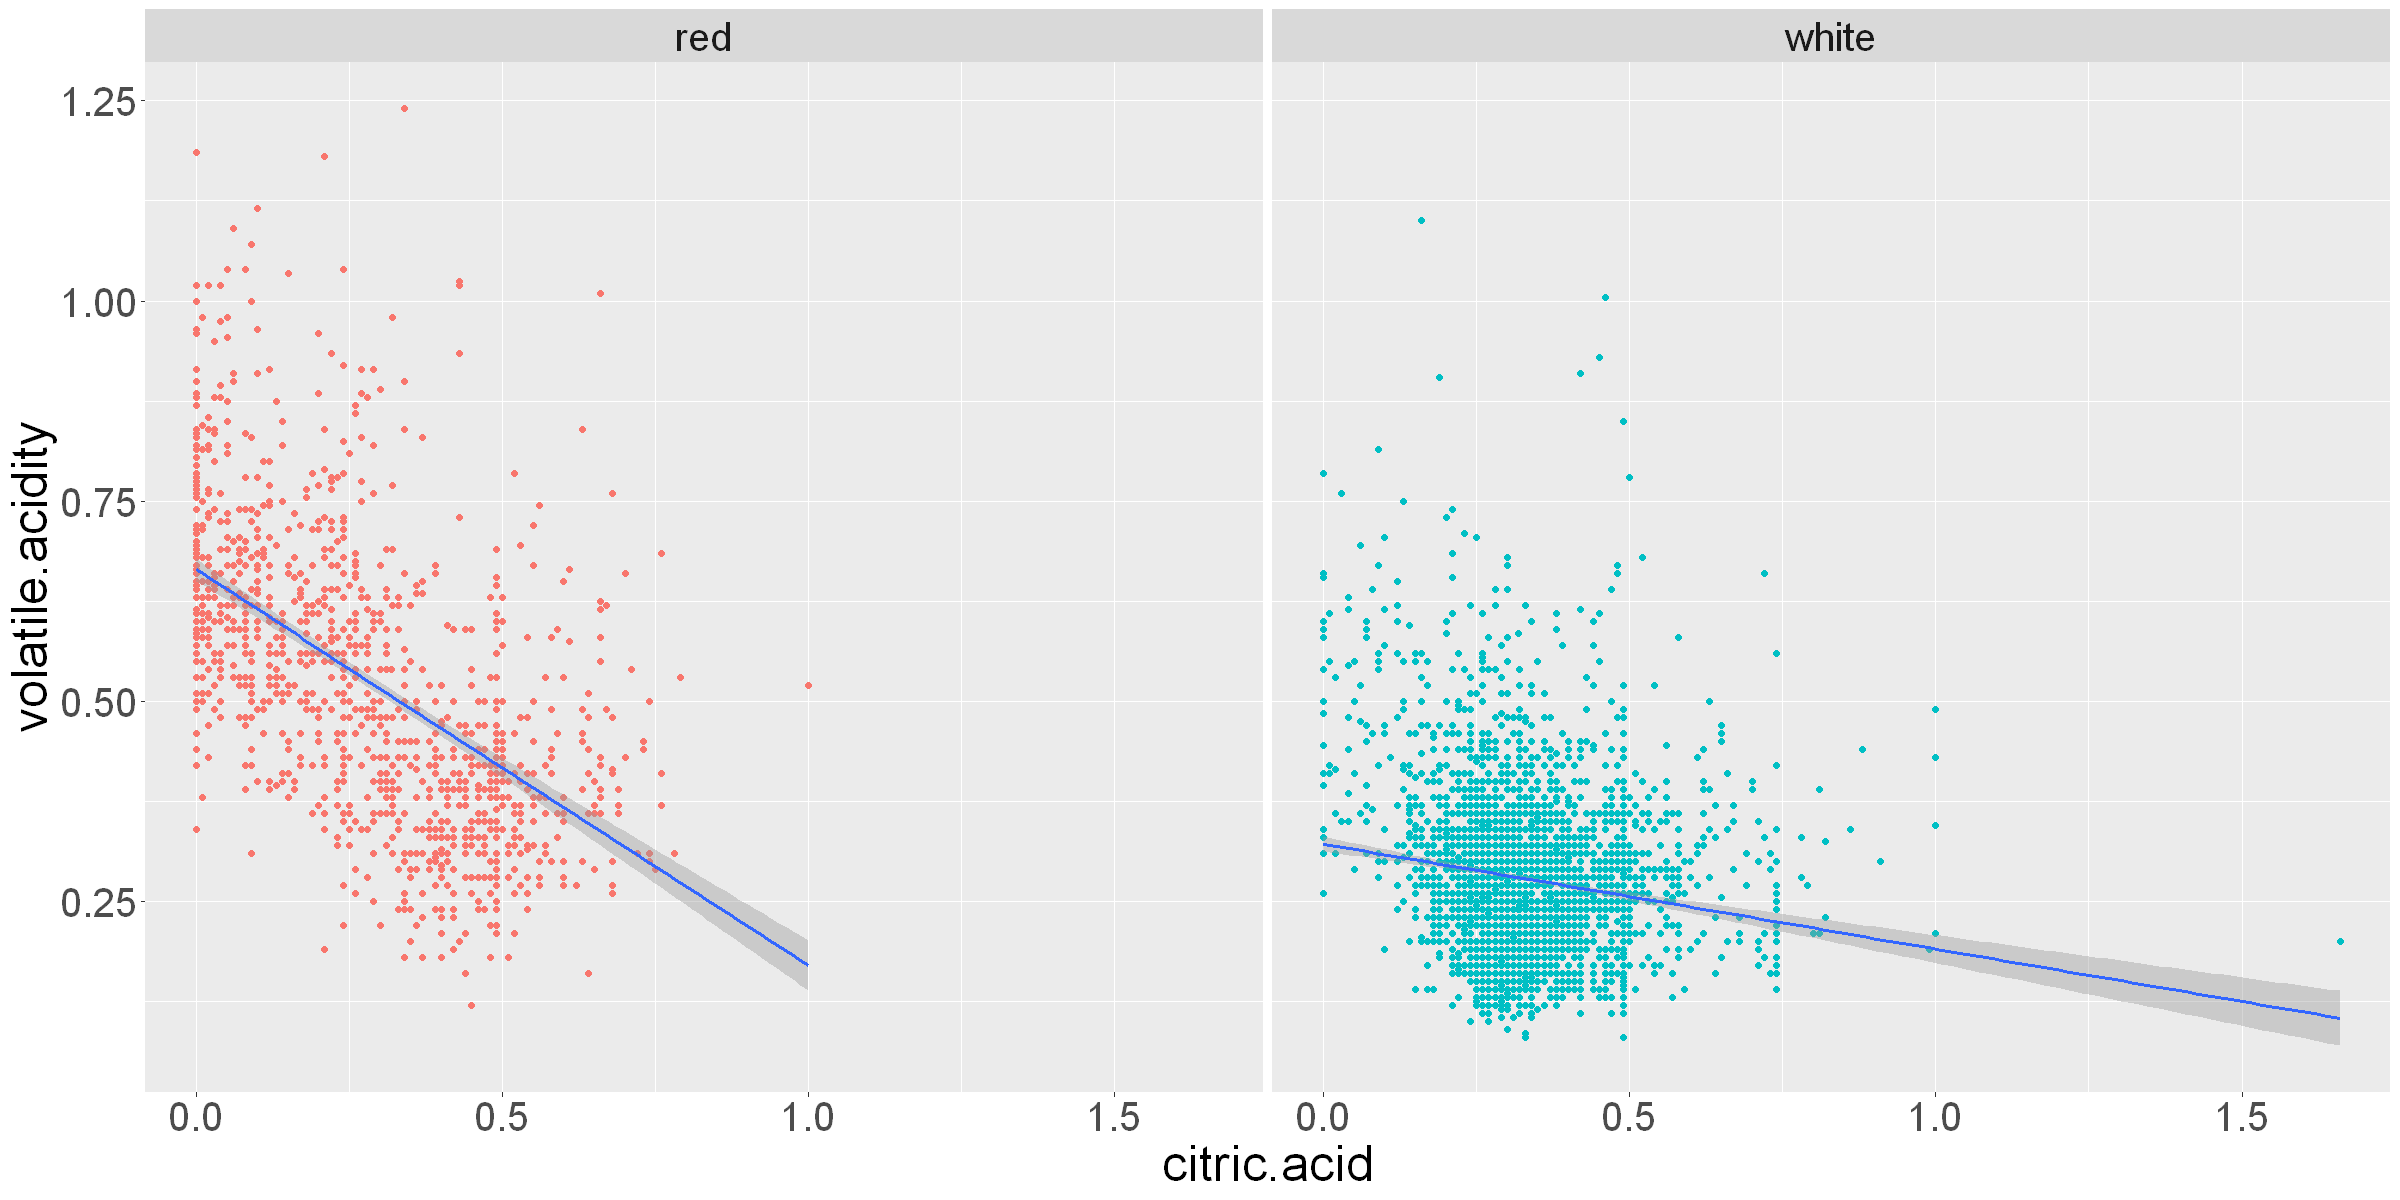

In [20]:
ggplot(train,aes(citric.acid, volatile.acidity)) + geom_point(aes(col = factor(type))) + geom_smooth(method = 'lm') +
theme(text = element_text(size = 30), legend.position = 'Null') + facet_wrap(~type)

# volatile.acidity is inversly proportional to citric.acid

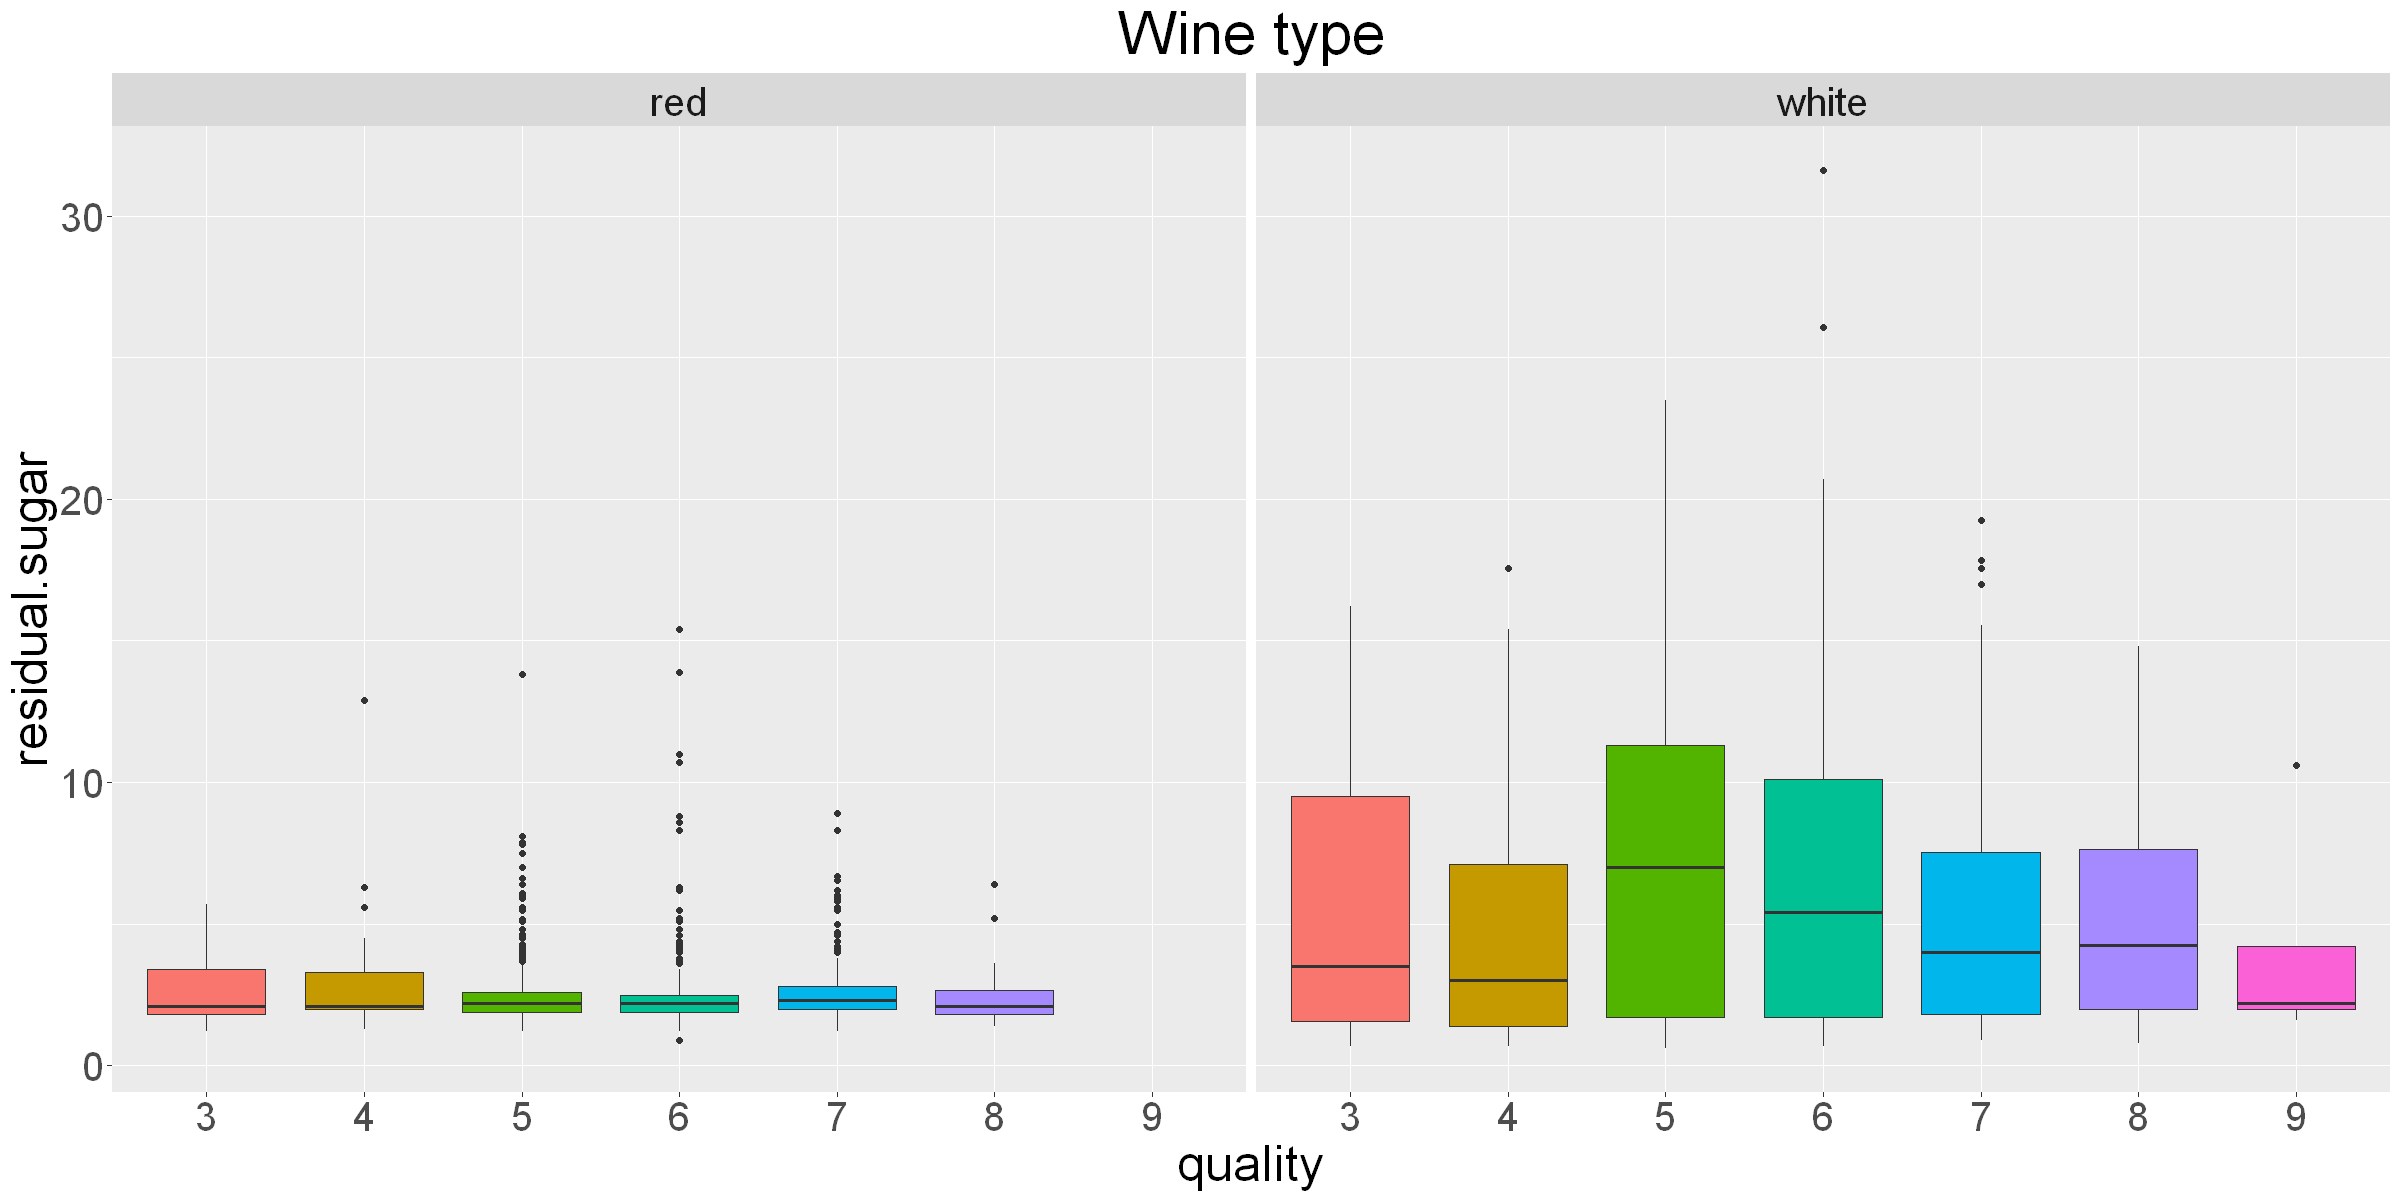

In [21]:
ggplot(train, aes(factor(quality), residual.sugar)) + geom_boxplot(aes(fill = factor(quality))) + labs(x = 'quality') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
facet_wrap(~type) + ggtitle('Wine type')

# In general, residual.sugar level is less in red wine than white wine.

`geom_smooth()` using formula 'y ~ x'



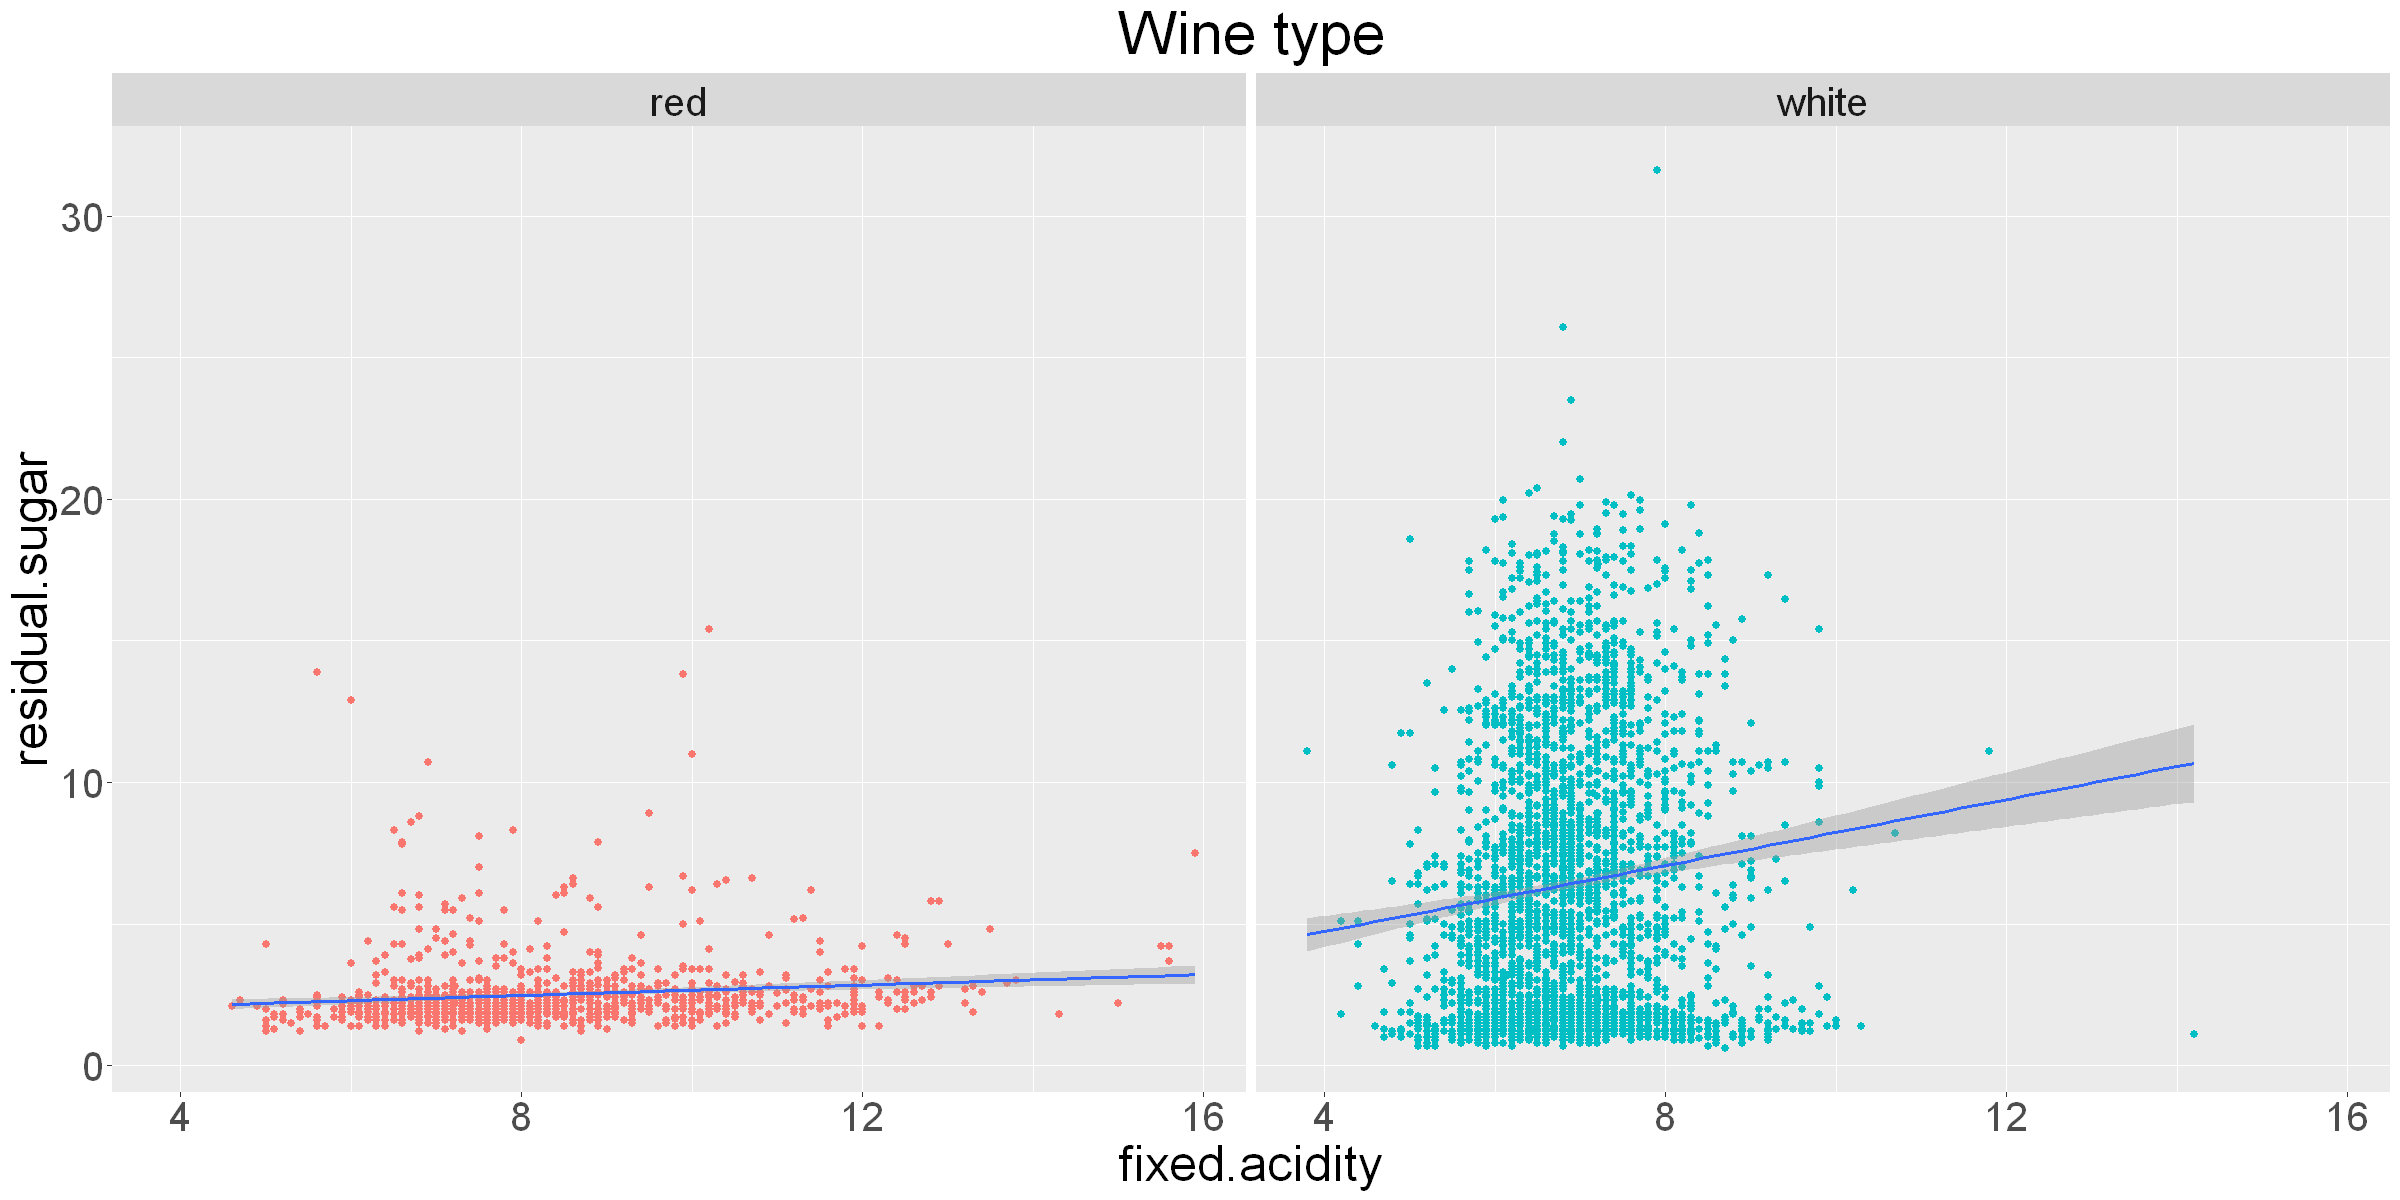

In [22]:
ggplot(train,aes(fixed.acidity,residual.sugar)) + geom_point(aes(col =factor(type)),size =2) + geom_smooth(method = 'lm') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
facet_wrap(~type) + ggtitle('Wine type')

# residual.sugar level increases as the fixed.acidity increases for white wine. But the same chabge isn't much significant
# fir red wine.

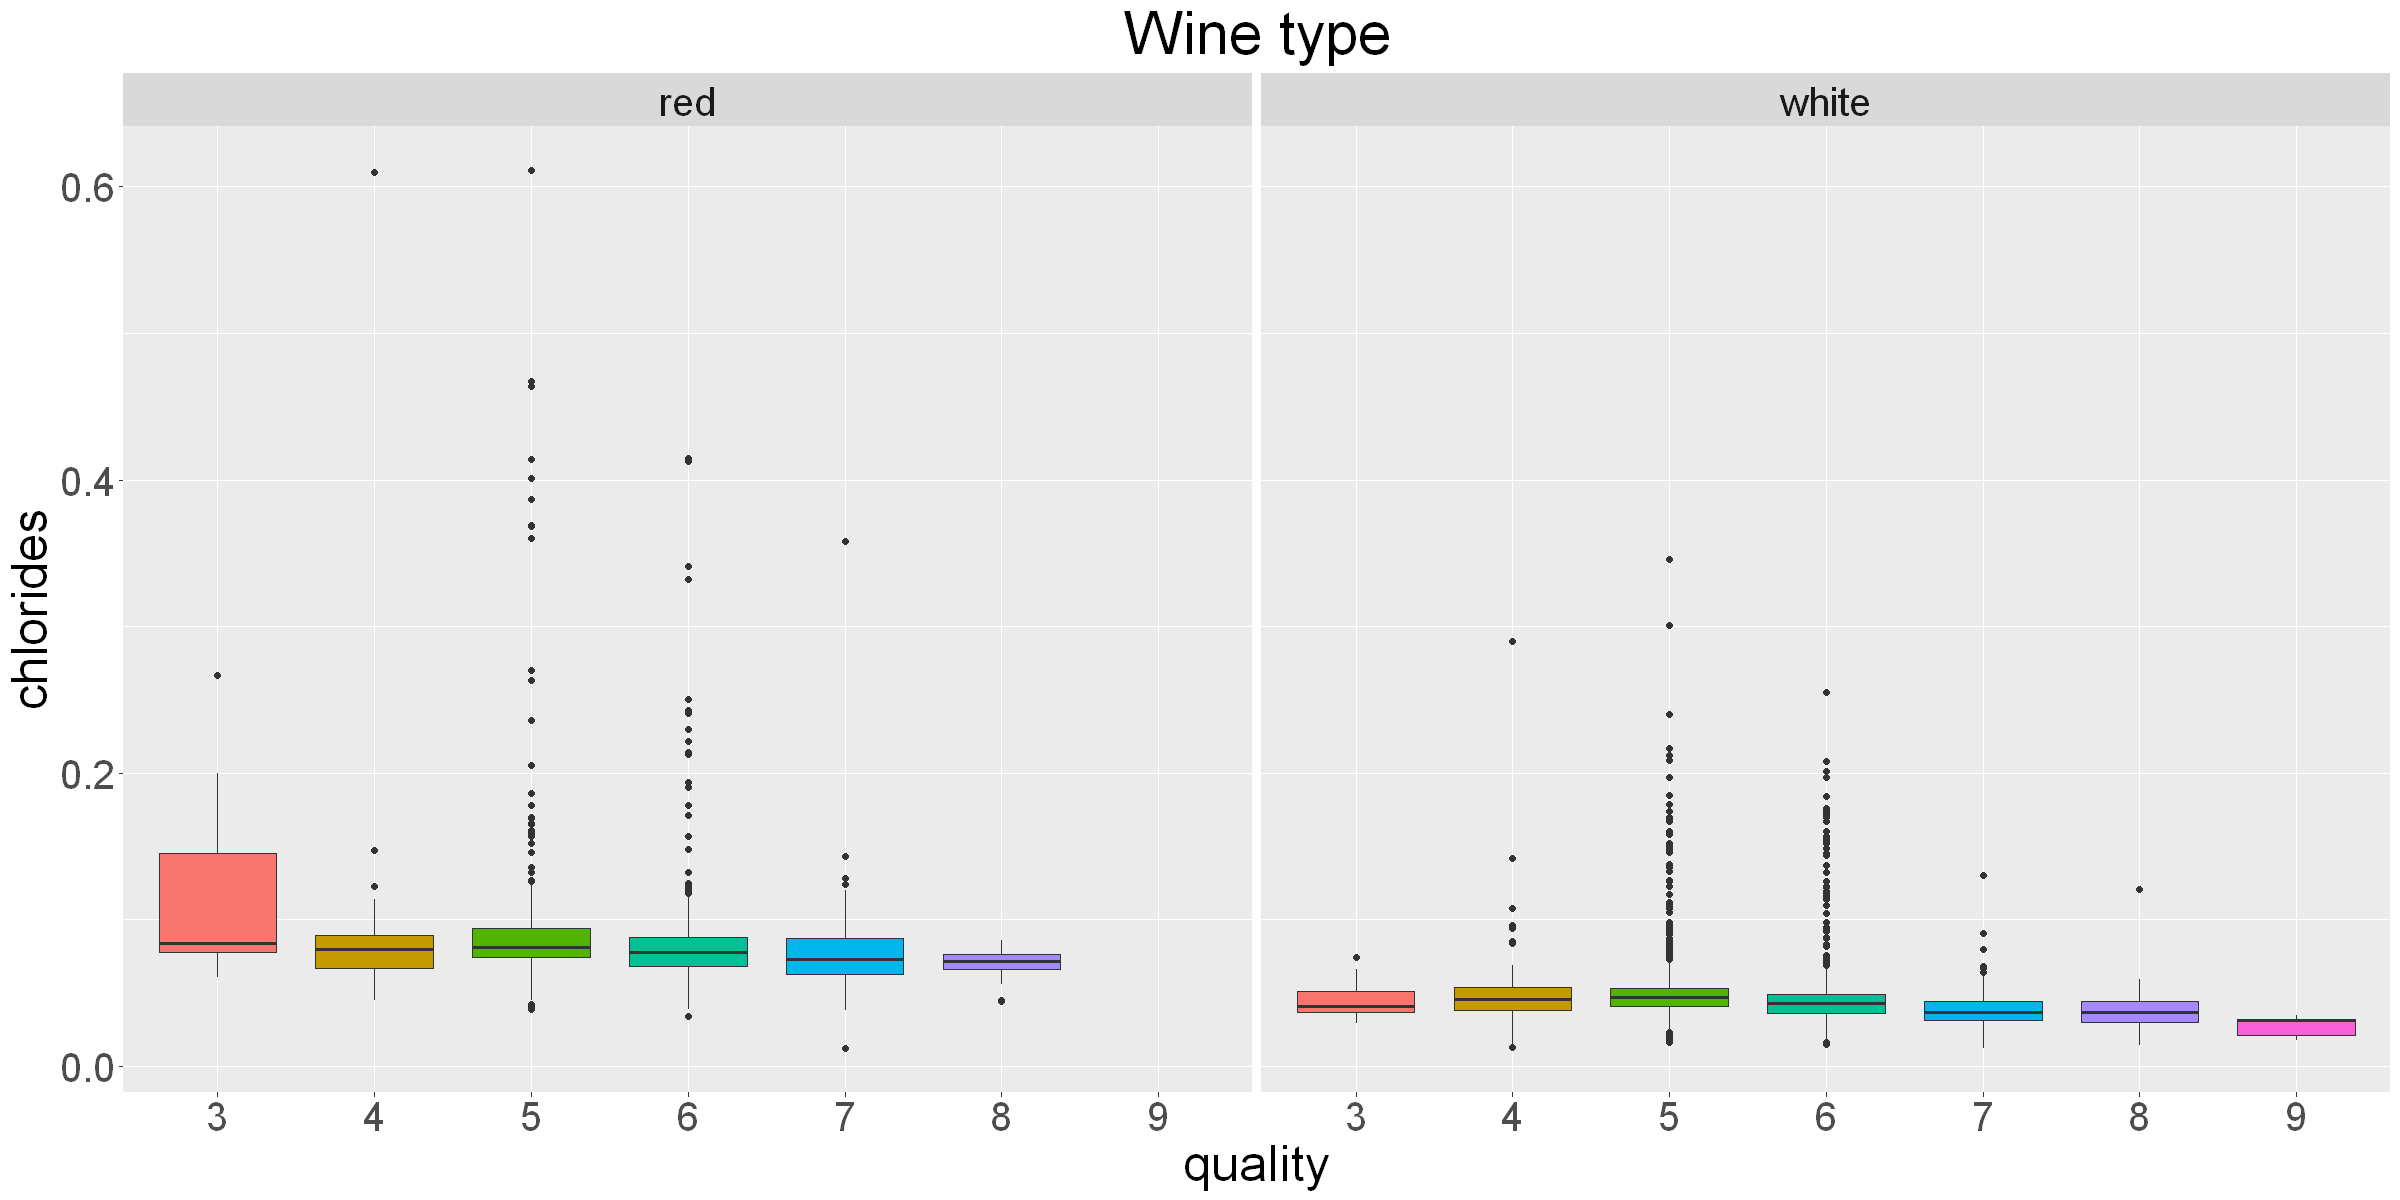

In [23]:
ggplot(train, aes(factor(quality), chlorides)) + geom_boxplot(aes(fill = factor(quality))) + labs(x = 'quality') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
facet_wrap(~type) + ggtitle('Wine type')

# chlorides levels in the wine decreases as the quality of wine increases.
# There are too many outliers for the wines of quality 5 and 6.

`geom_smooth()` using formula 'y ~ x'



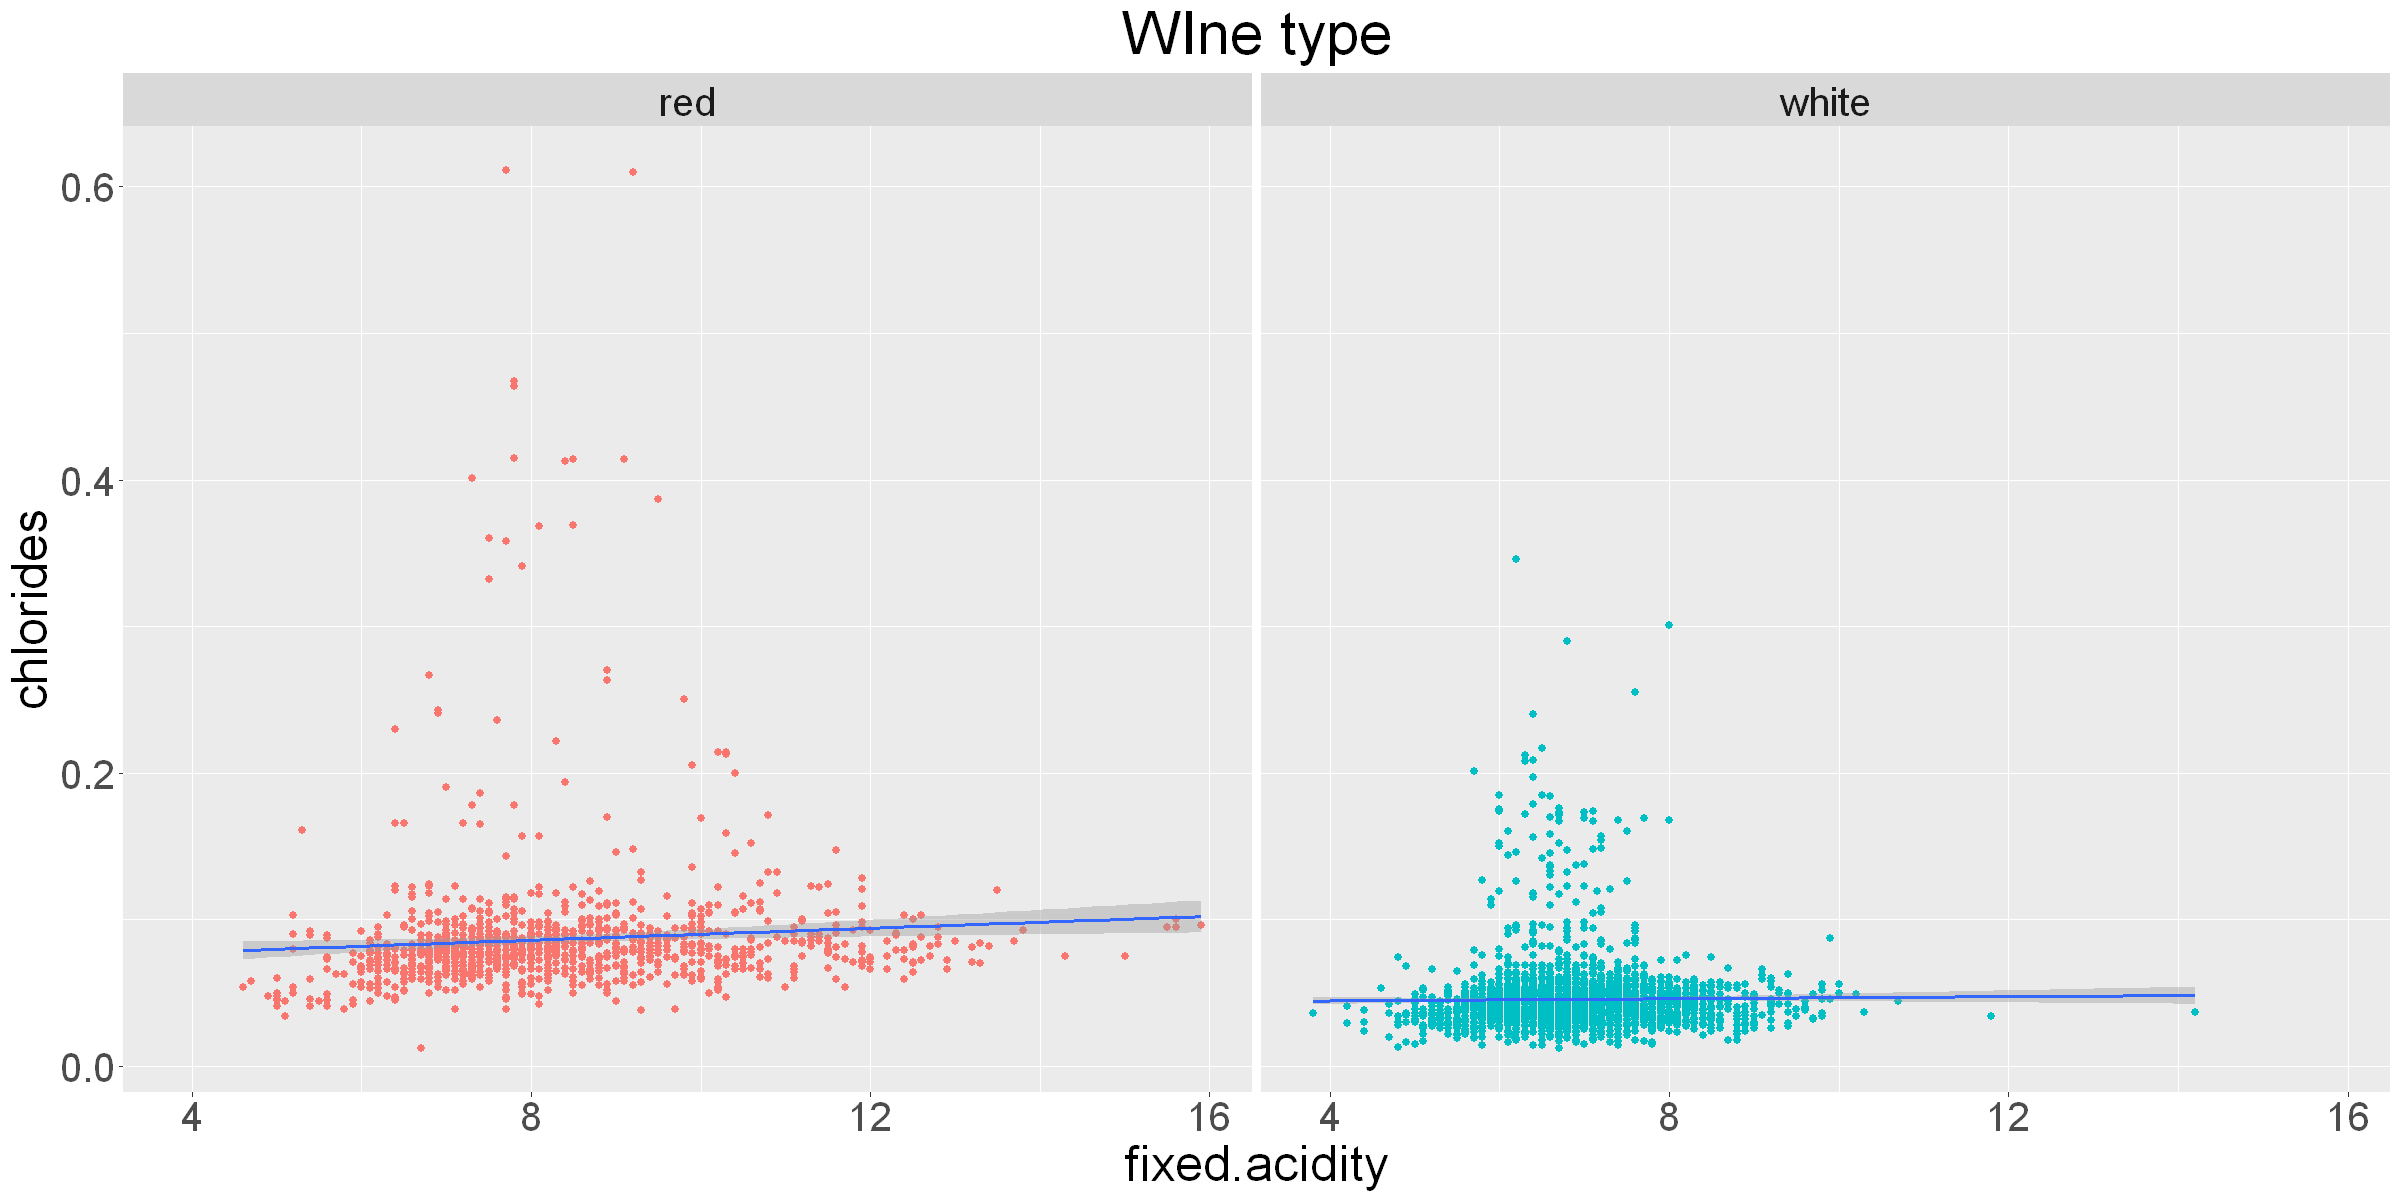

In [24]:
ggplot(train,aes(fixed.acidity,chlorides)) + geom_point(aes(col =factor(type)),size =2) + geom_smooth(method = 'lm') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) + 
facet_wrap(~type) + ggtitle('WIne type')

# chlorides levels in the wine increases as the fixed.acidity of wine increases. But it's very small for white wine
# chlorides level in red wide is more than in white wine.

`geom_smooth()` using formula 'y ~ x'



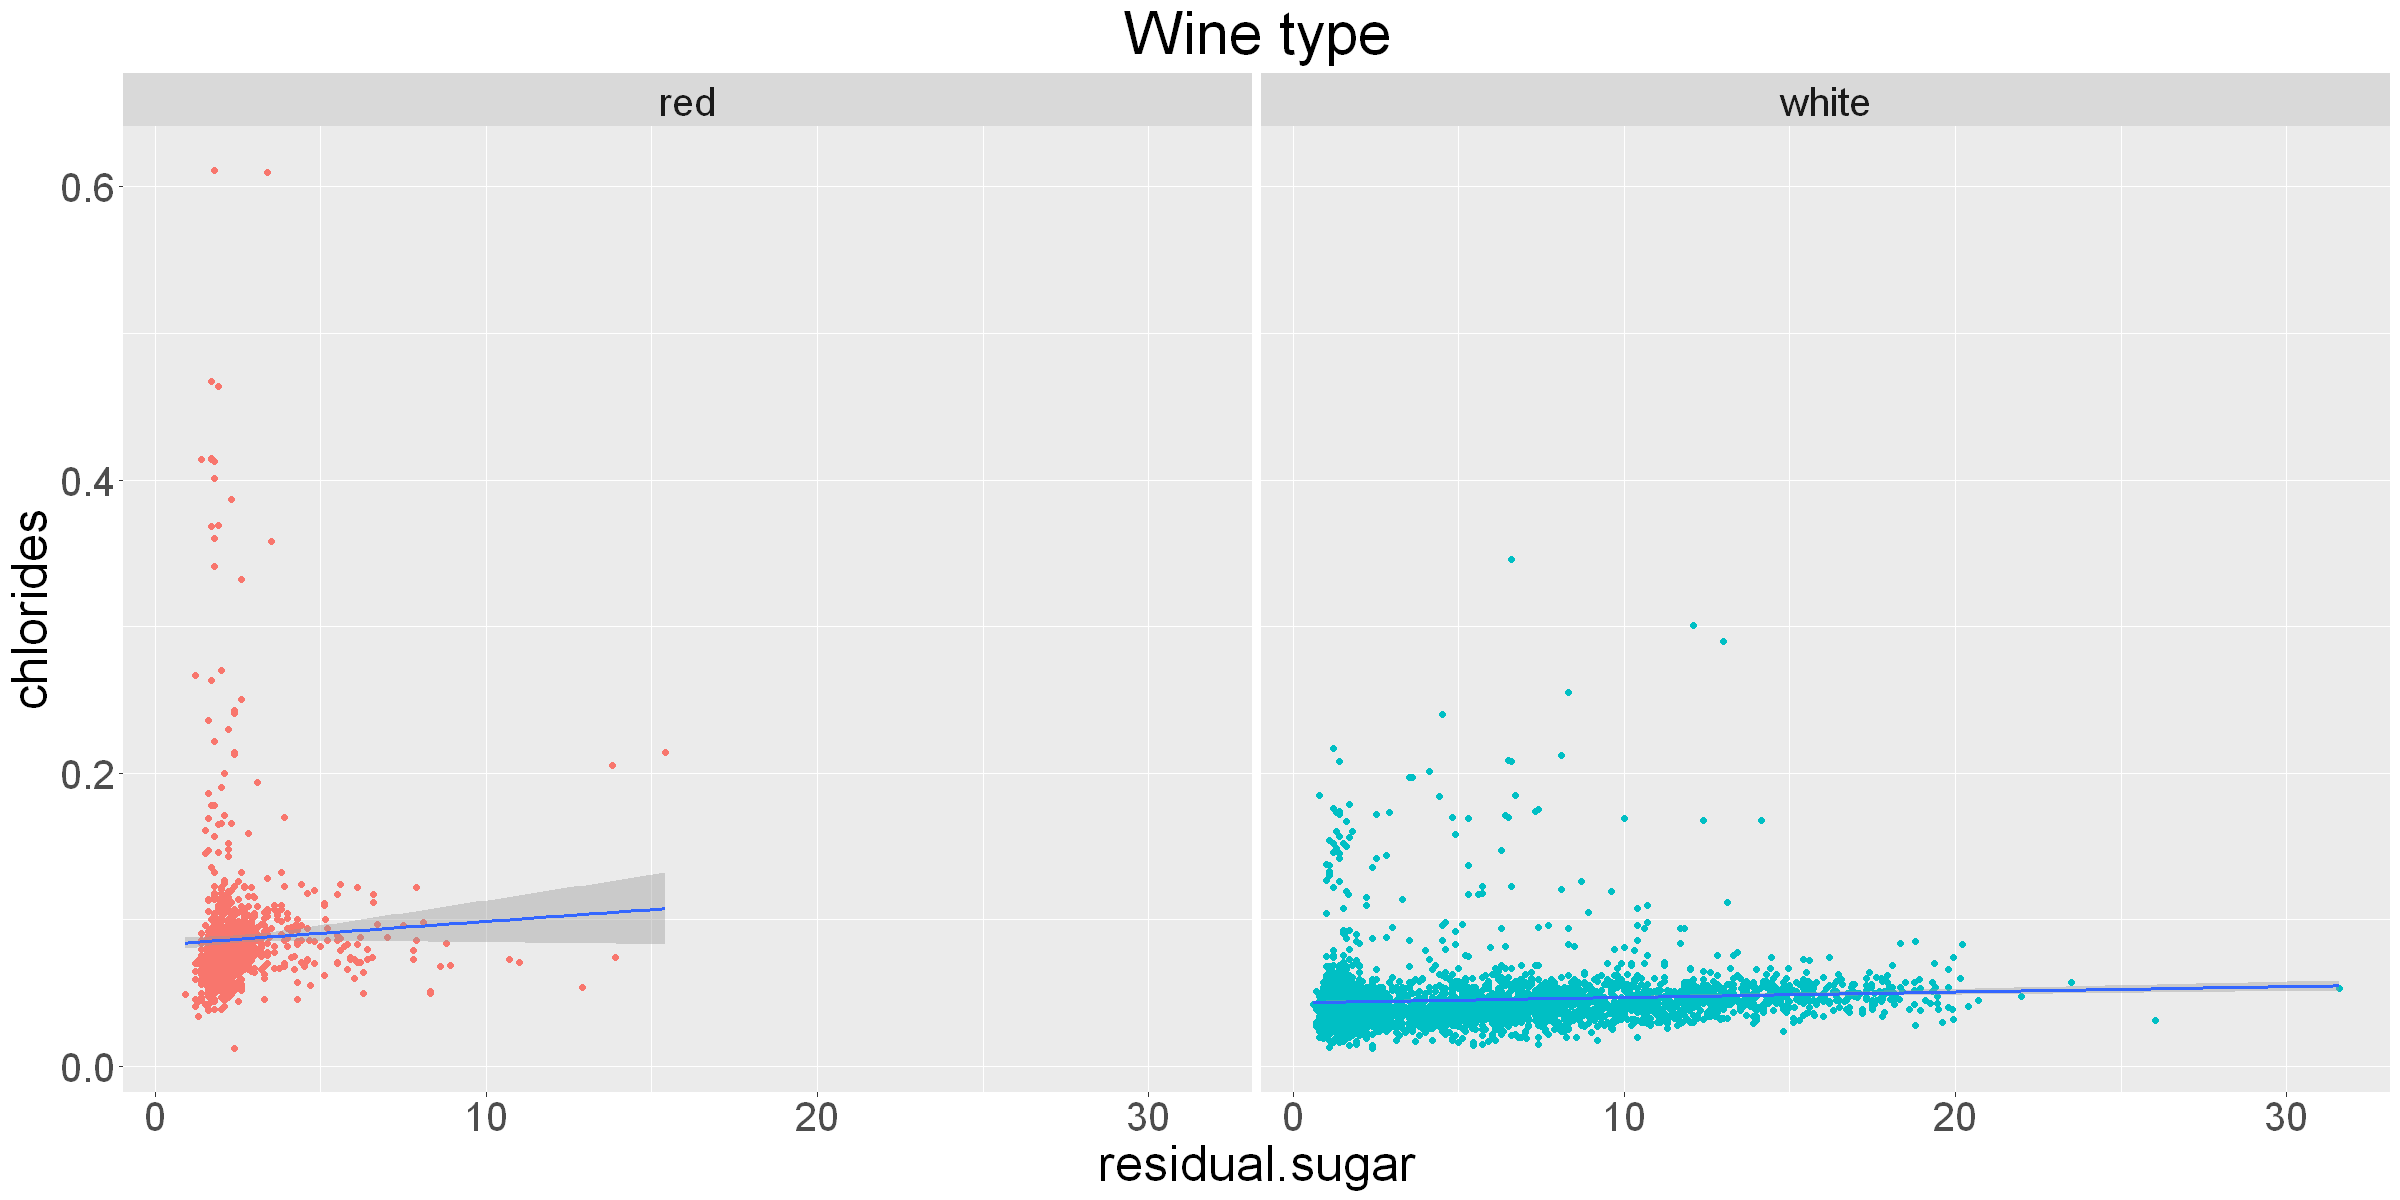

In [25]:
ggplot(train,aes(residual.sugar,chlorides)) + geom_point(aes(col =factor(type))) + theme(text = element_text(size = 30)) + 
theme(legend.position = 'Null',  plot.title = element_text(hjust = 0.5)) + facet_wrap(~type) + geom_smooth(method = 'lm') +
ggtitle('Wine type')

# ratio of chlorides vs residual.sugar is higher for red wine.

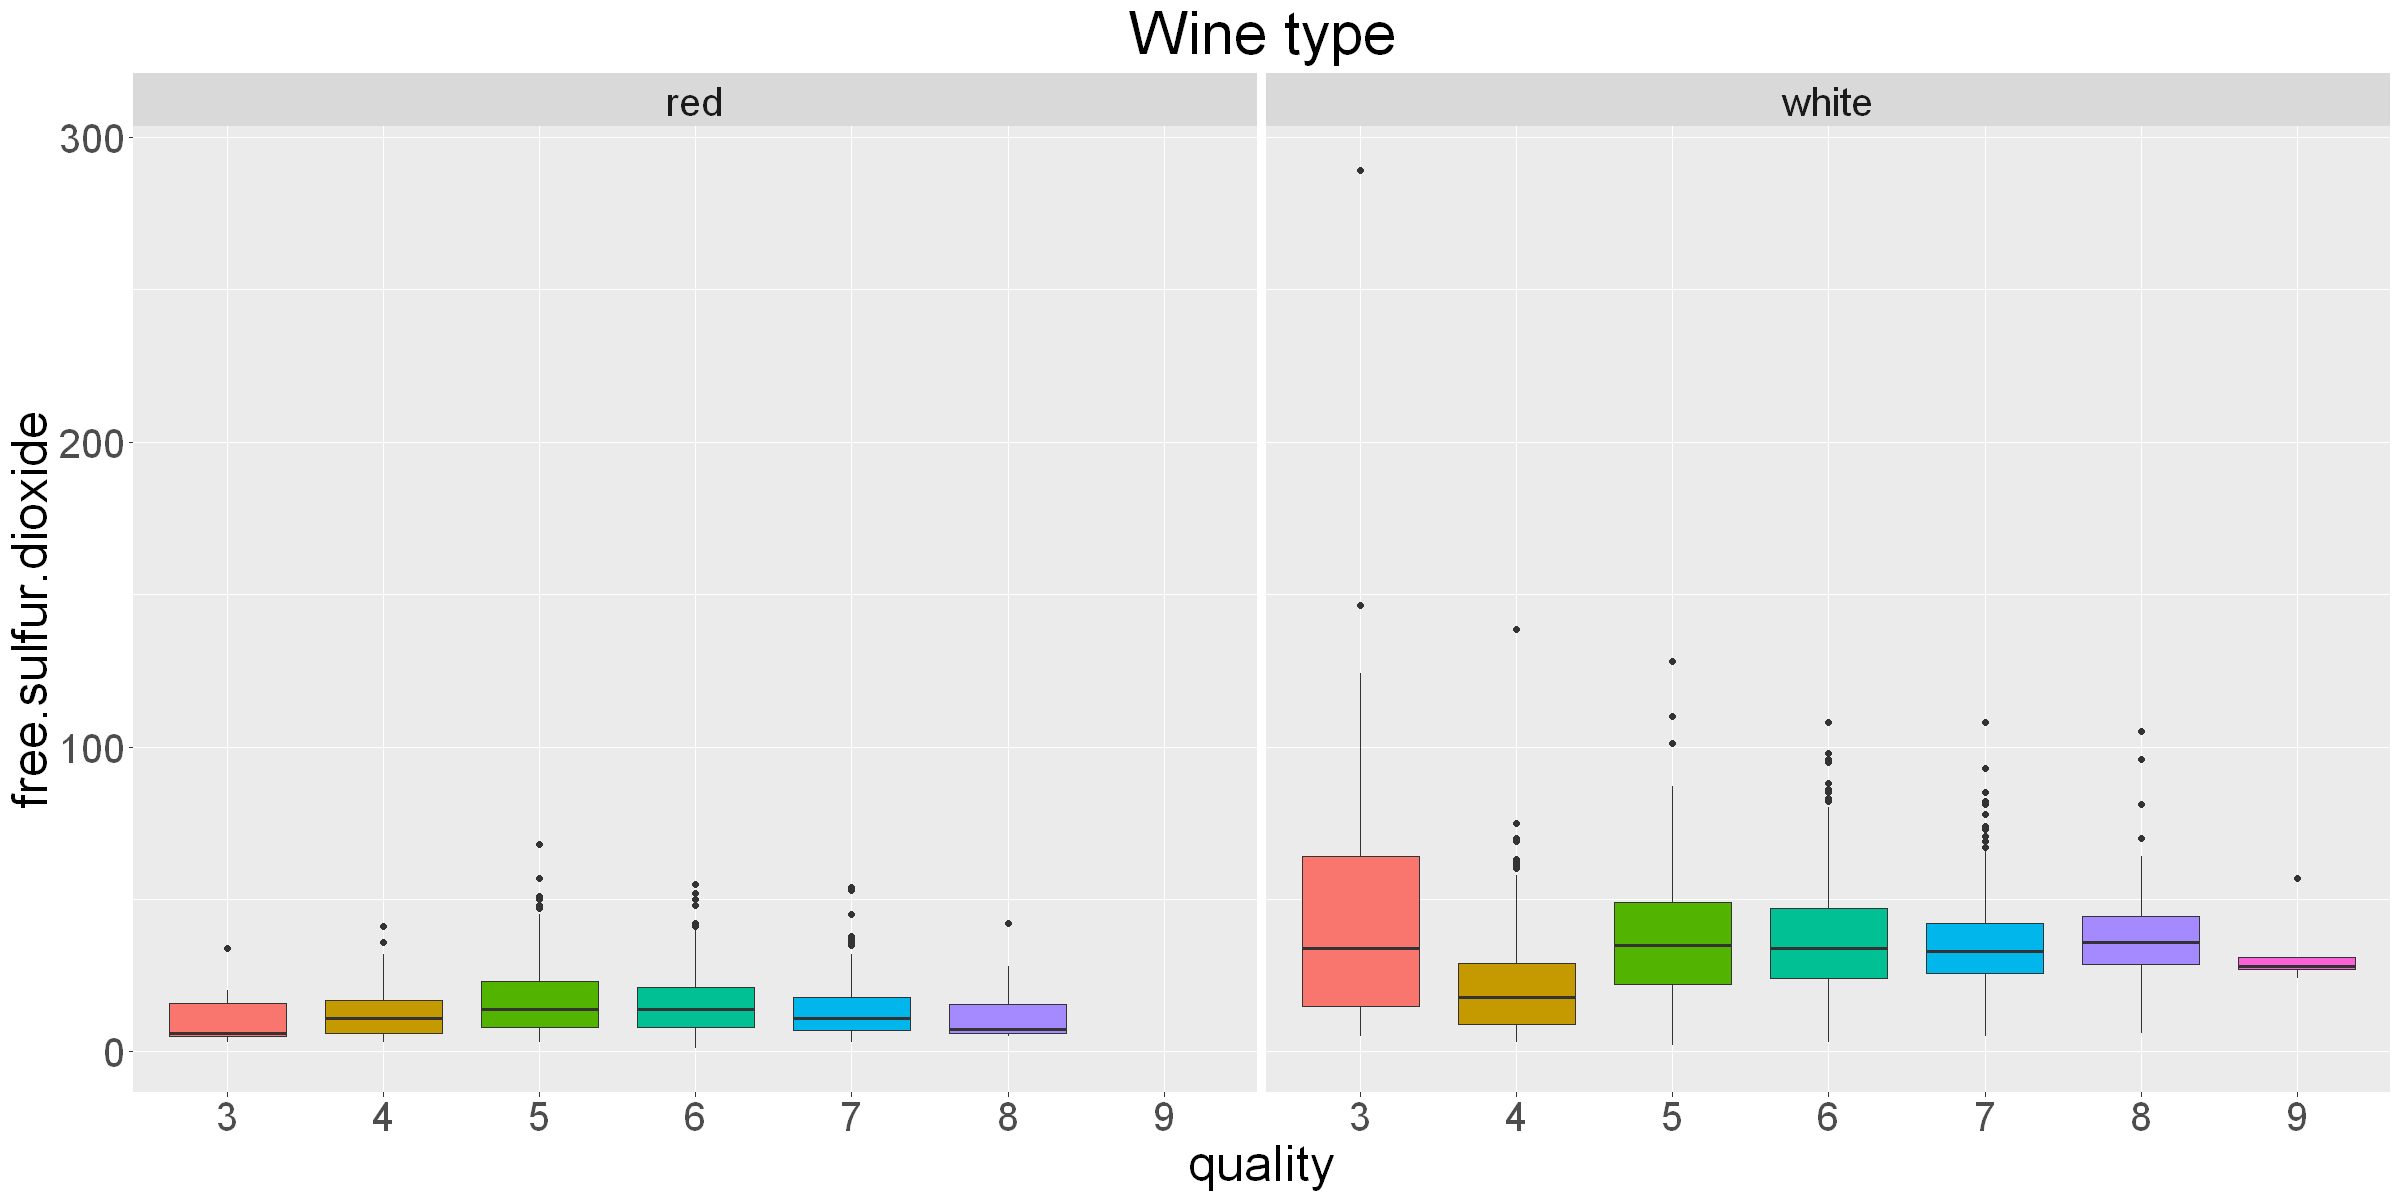

In [26]:
ggplot(train, aes(factor(quality),free.sulfur.dioxide)) + geom_boxplot(aes(fill = factor(quality))) + labs(x = 'quality') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
facet_wrap(~type) + ggtitle('Wine type')

# there is a sudden decreses in free.sulfur.dioxide level in white wine of quallity 4.
# Except for white wine of quality 4 and 5, level of free.sulfur.dioxide decreses as the quality improves.
# for red wine, level of free.sulfur.dioxide increases till quality 5 as it improves but afterwards it decreases.

`geom_smooth()` using formula 'y ~ x'



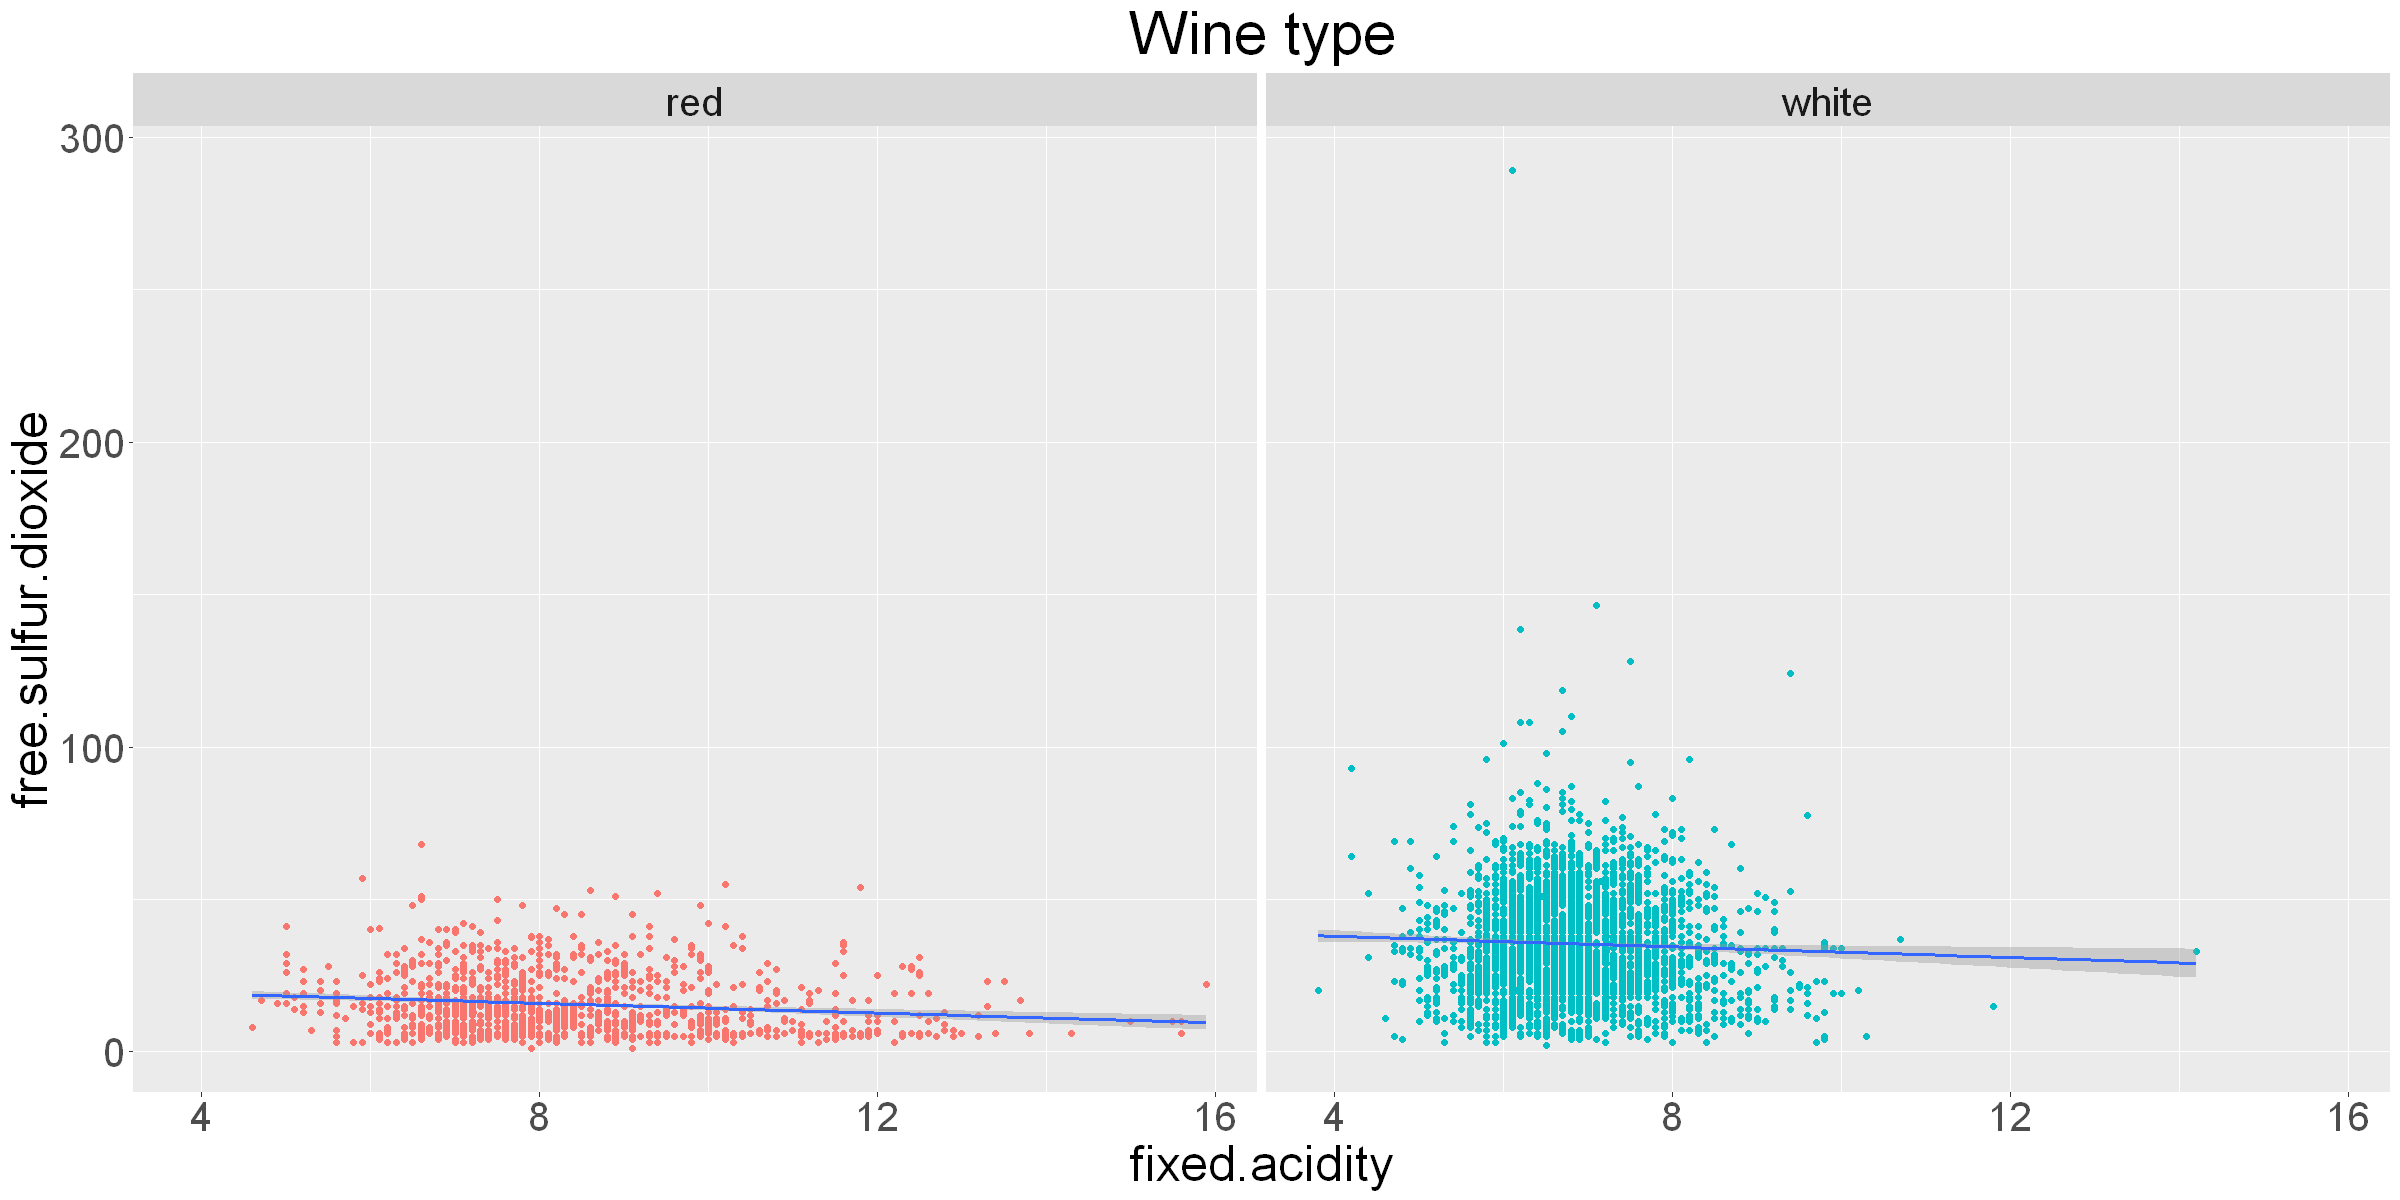

In [27]:
ggplot(train,aes(fixed.acidity,free.sulfur.dioxide)) + geom_point(aes(col =factor(type))) + geom_smooth(method = 'lm') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) + 
facet_wrap(~type) + ggtitle('Wine type')

# In general, free.sulfur.dioxide decreses as the fixed.acidity increases.
# ratio of free.sulfur.dioxide vs fixed.acidity is greater for white wine than red wine.
# free.sulfur.dioxide is more in white wine than in red wine.

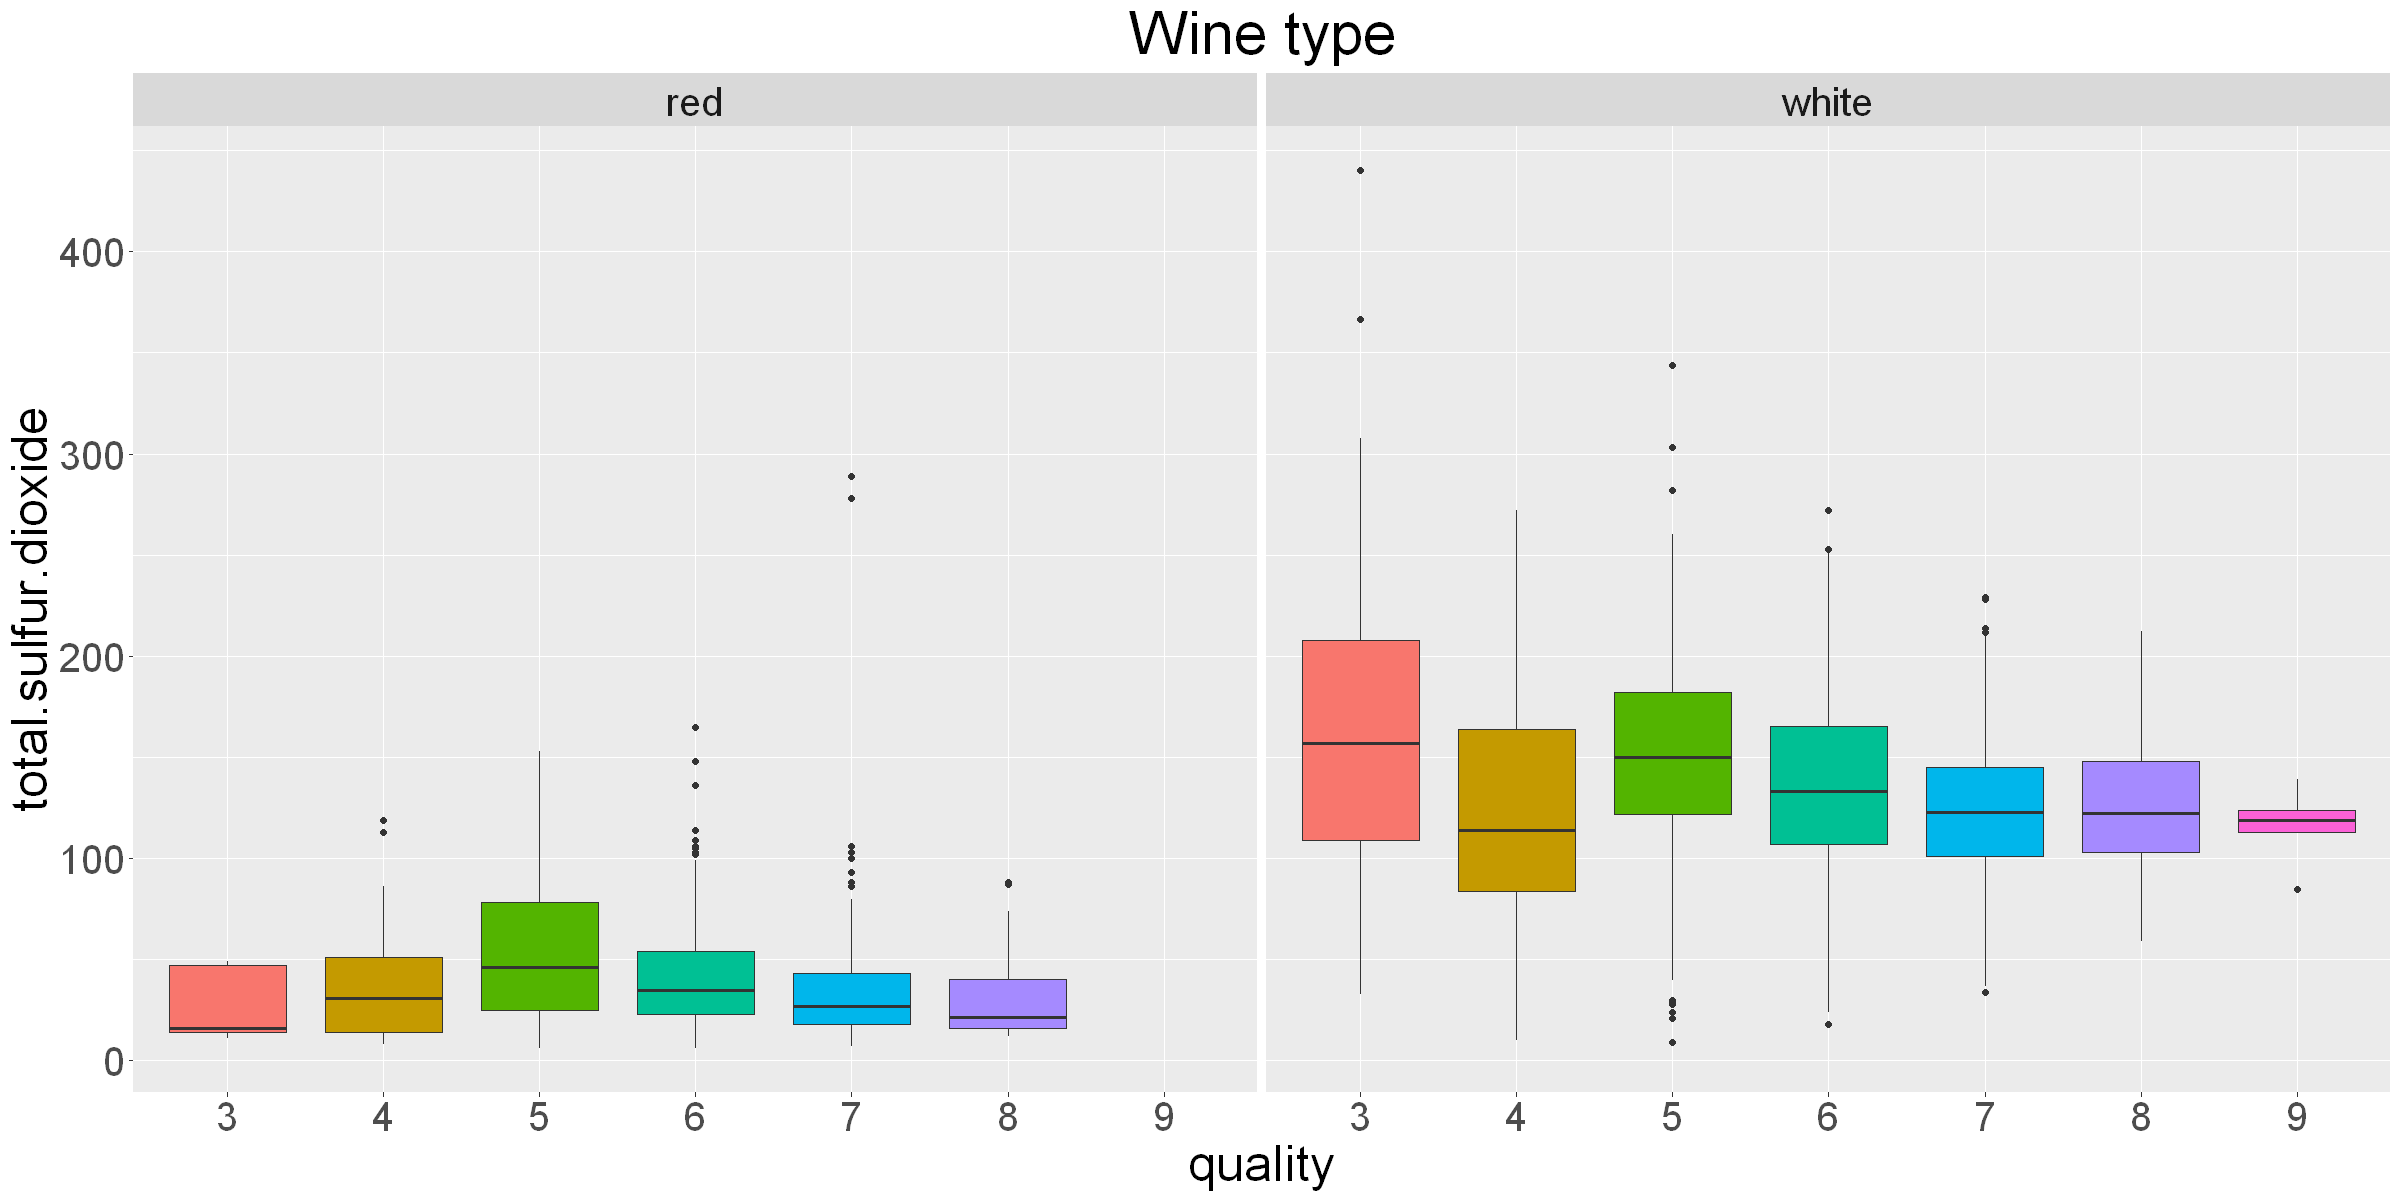

In [28]:
ggplot(train, aes(factor(quality),total.sulfur.dioxide)) + geom_boxplot(aes(fill = factor(quality))) + labs(x ='quality') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
facet_wrap(~type) + ggtitle('Wine type')

# Similar trend observed in free.sulfur.dioxide but level of total.sulfur.dioxide in white wine is more than 
# free.sulfur.dioxide

`geom_smooth()` using formula 'y ~ x'



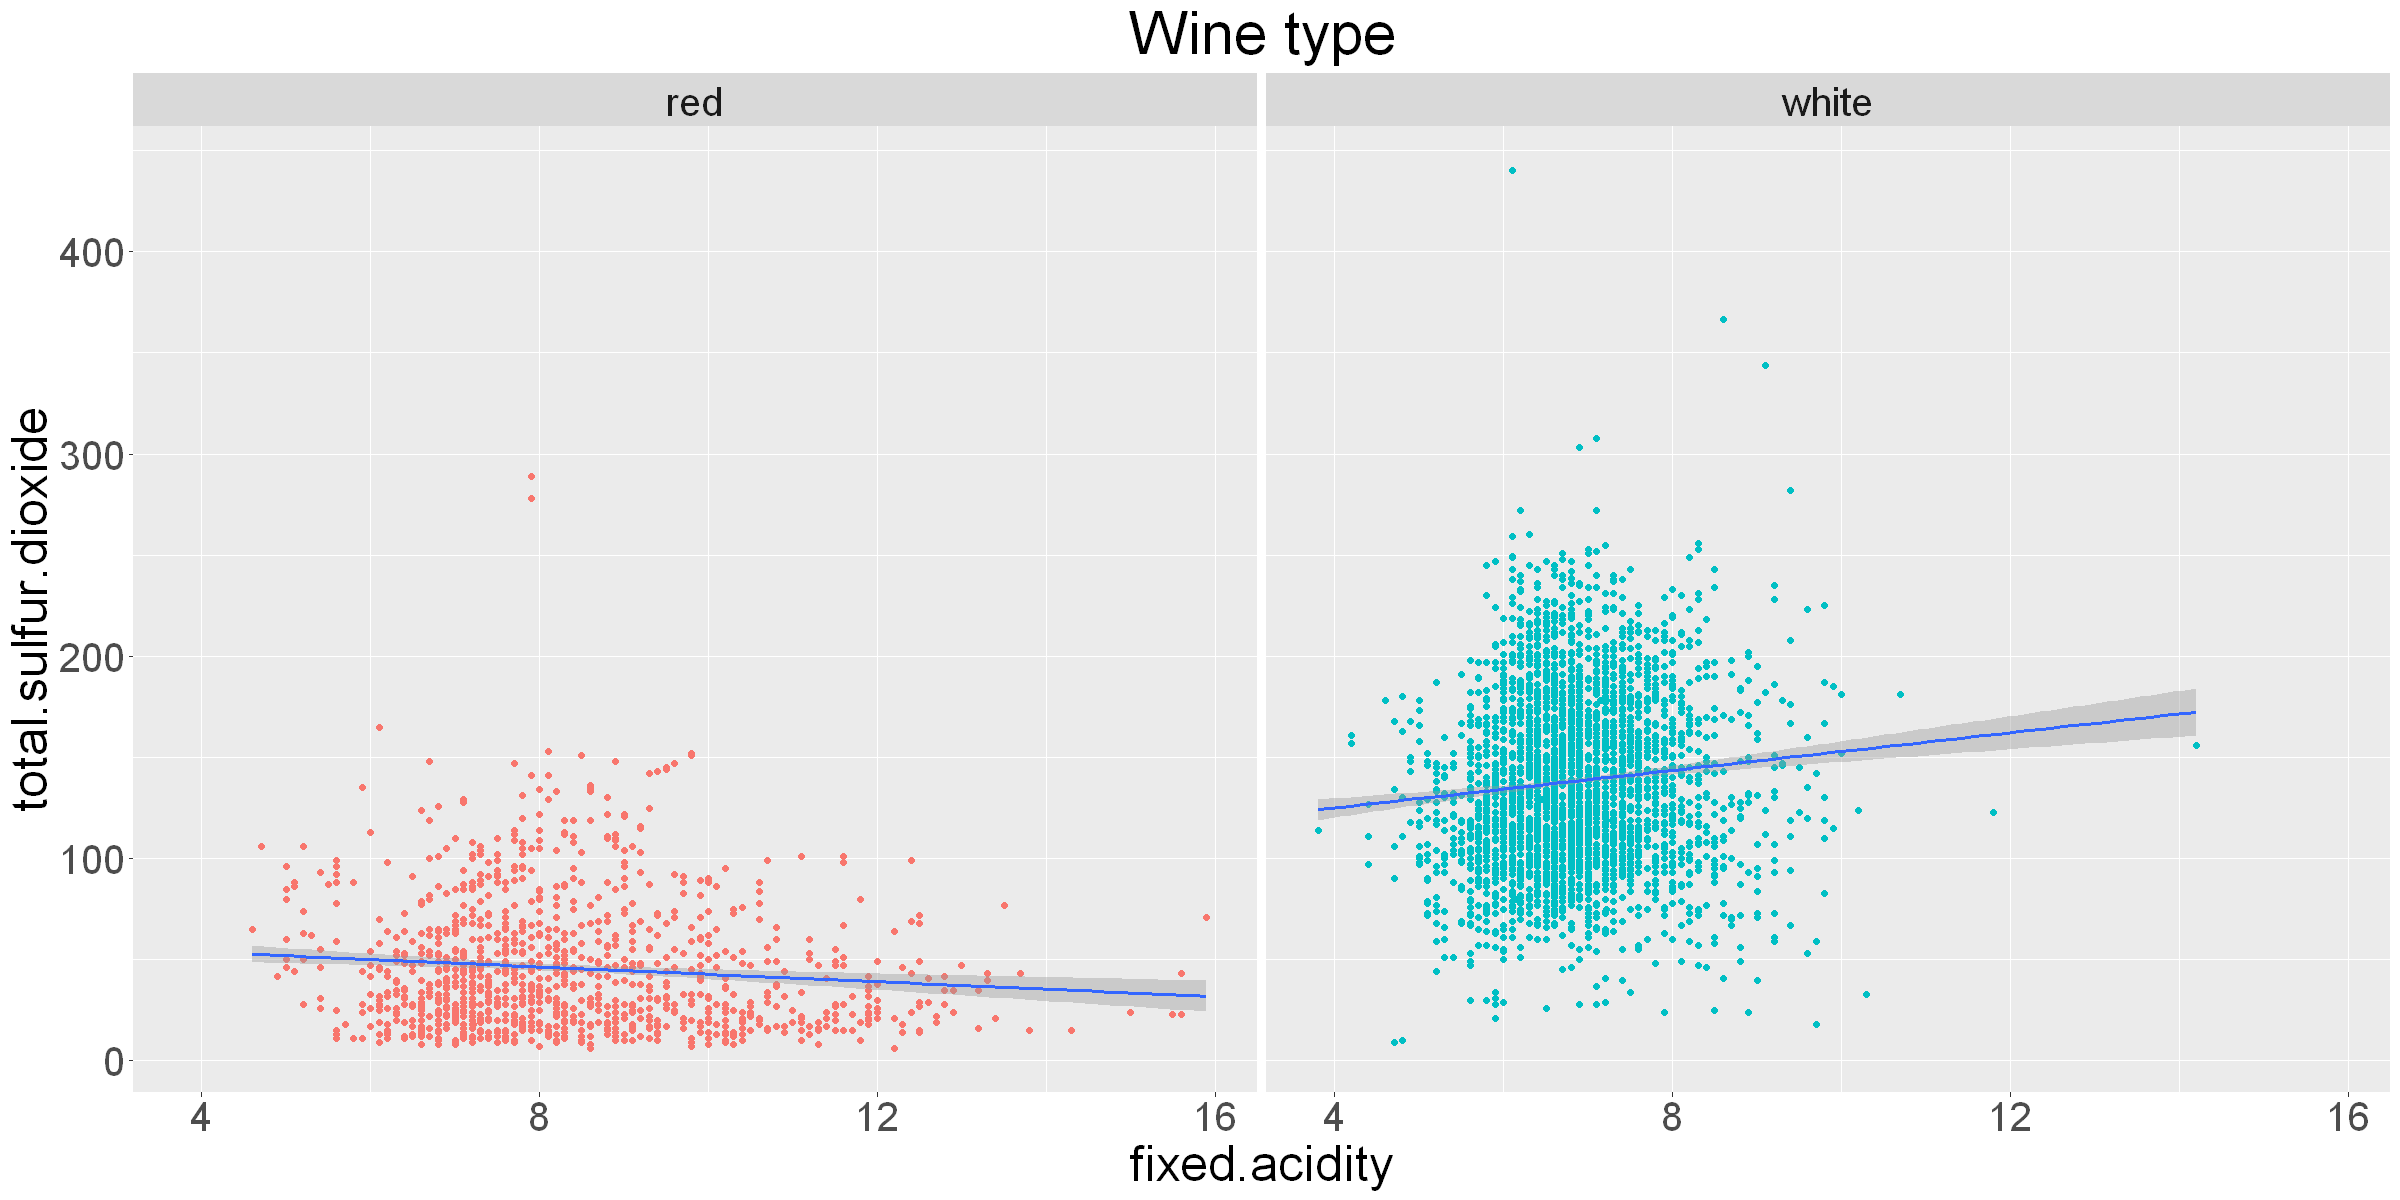

In [29]:
ggplot(train,aes(fixed.acidity,total.sulfur.dioxide)) + geom_point(aes(col =factor(type))) + geom_smooth(method = 'lm') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
facet_wrap(~type) + ggtitle('Wine type')

# total.sulfur.dioxide decreses as the fixed.acidity increases for red wine whereas it increases for white wine..
# total.sulfur.dioxide for white wine is more than red wine.

`geom_smooth()` using formula 'y ~ x'



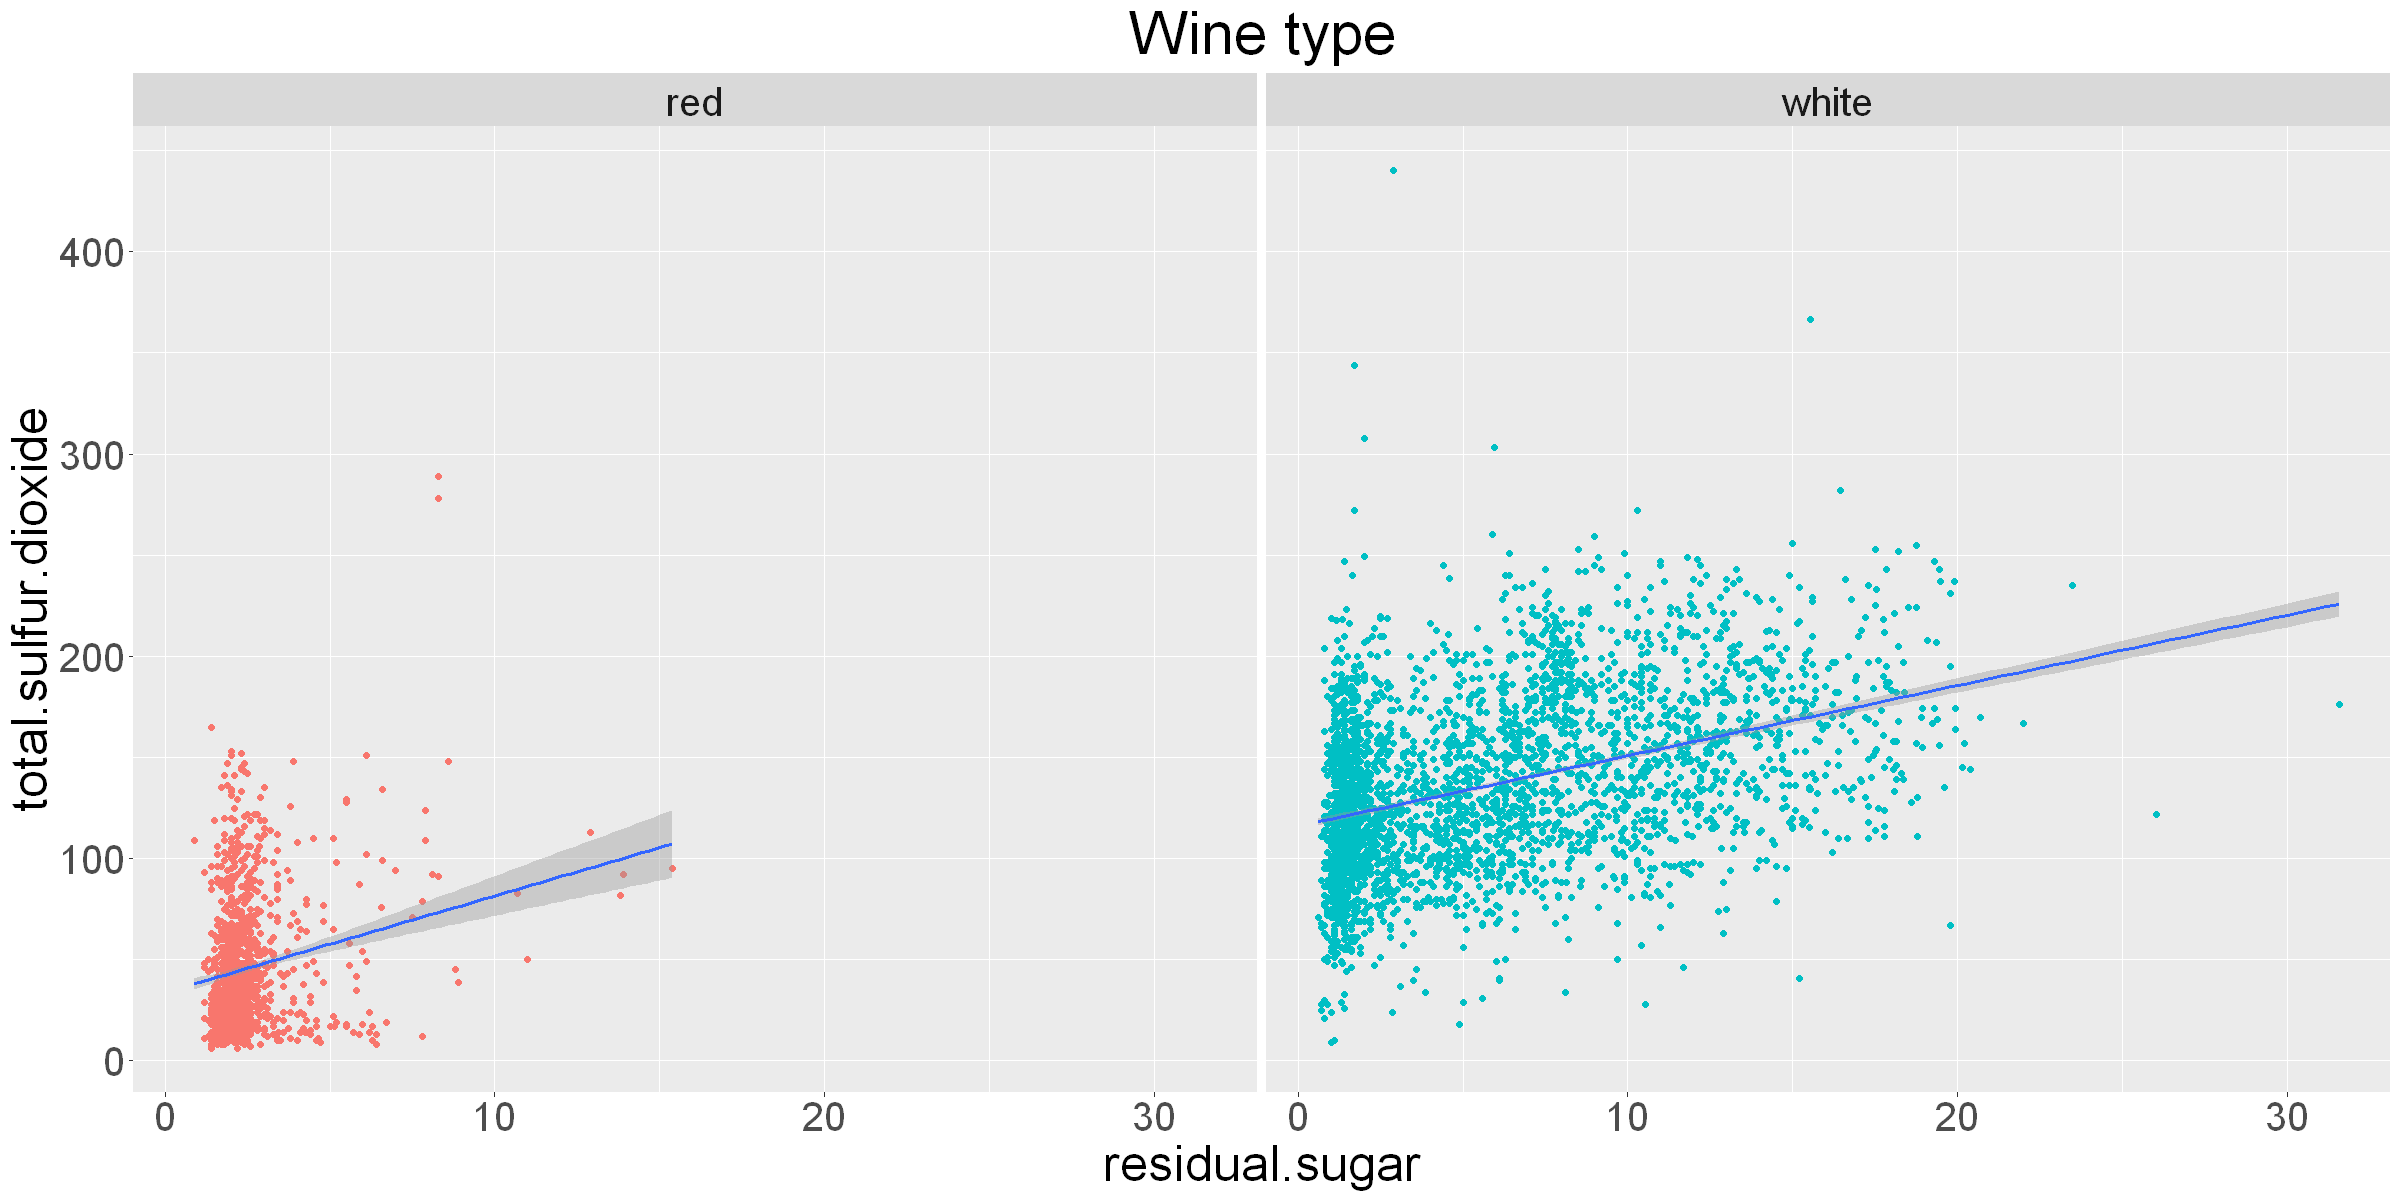

In [30]:
ggplot(train,aes(residual.sugar,total.sulfur.dioxide)) + geom_point(aes(col =factor(type))) + geom_smooth(method = 'lm') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
facet_wrap(~type) + ggtitle('Wine type')

# In general, total.sulfur.dioxide increases as residual.sugar increses.

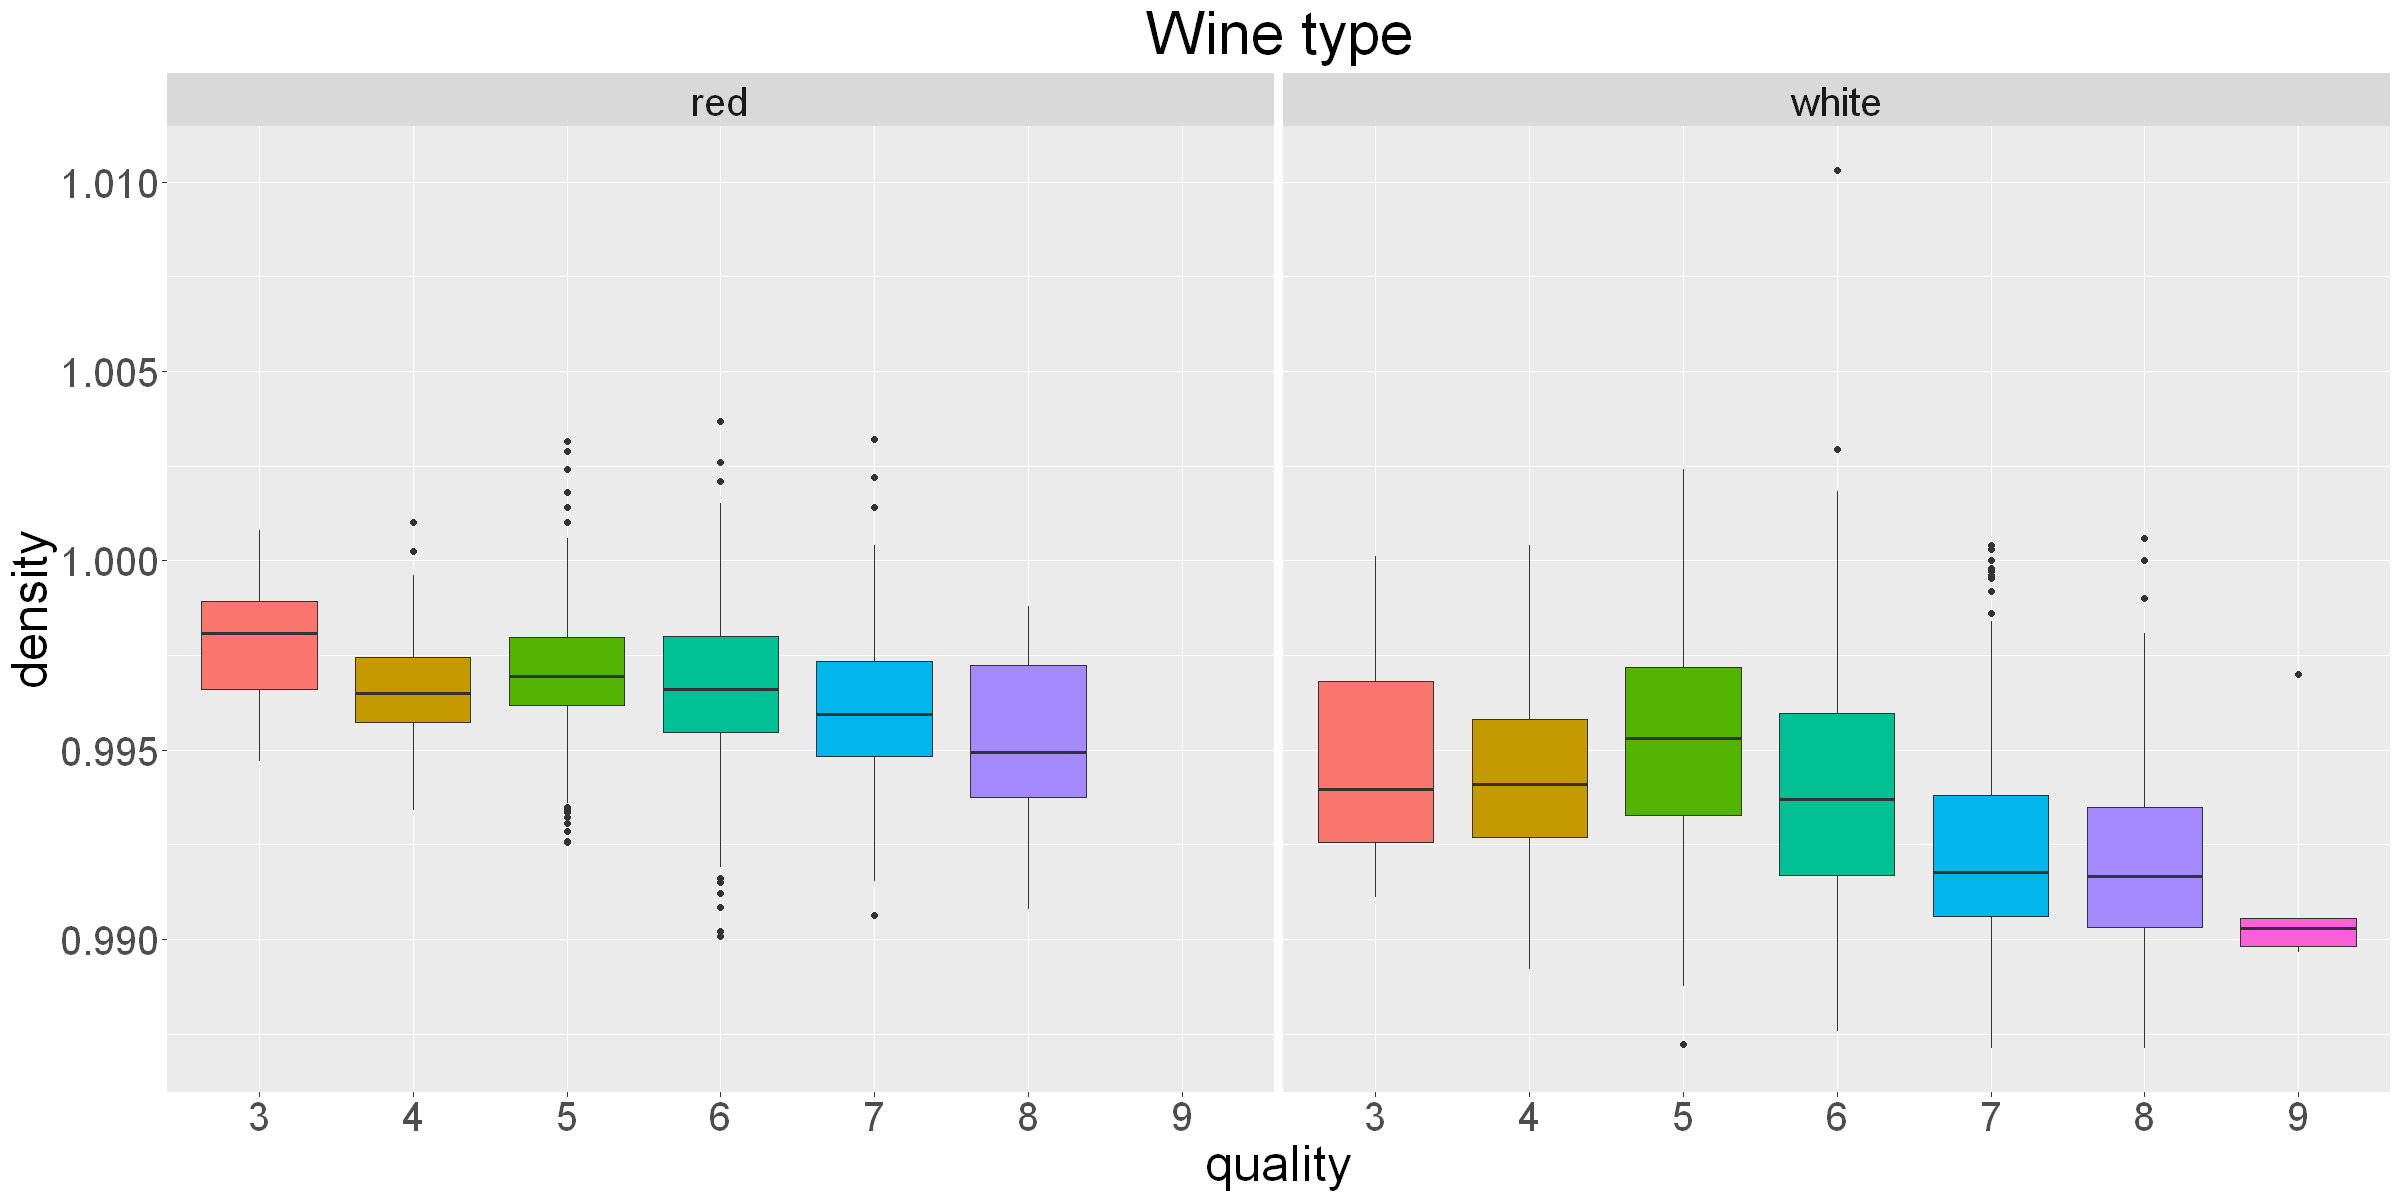

In [31]:
ggplot(train, aes(factor(quality),density)) + geom_boxplot(aes(fill = factor(quality))) + labs(x ='quality') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
facet_wrap(~type) + ggtitle('Wine type')

# density of the wine decreses as the quality improves but density increases from wine quality 4 to 5.

`geom_smooth()` using formula 'y ~ x'



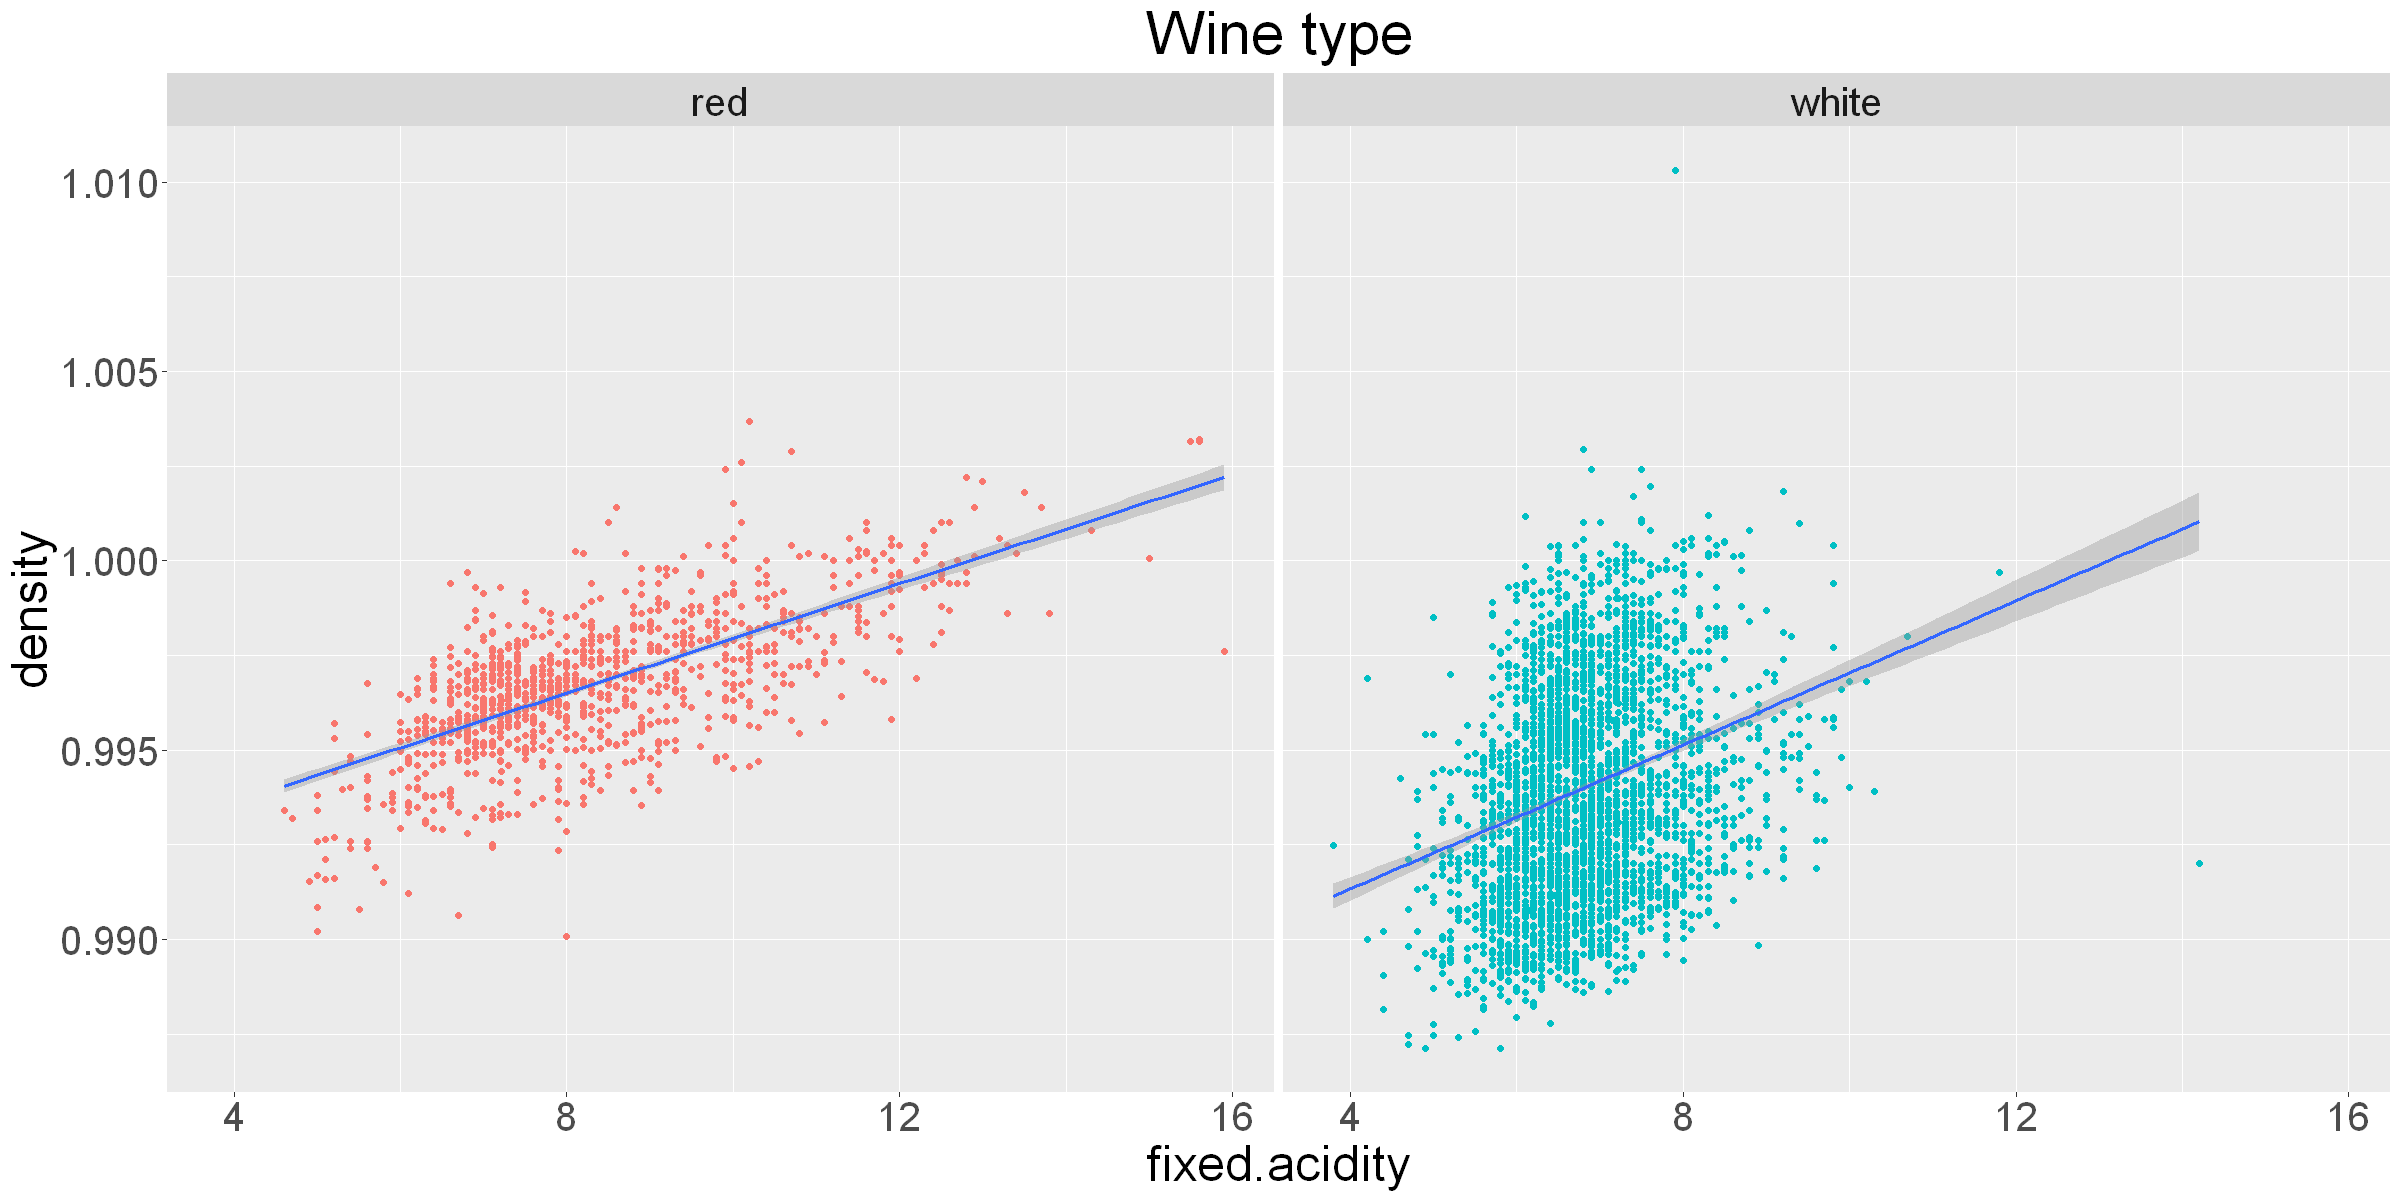

In [32]:
ggplot(train,aes(fixed.acidity,density)) + geom_point(aes(col =factor(type))) + geom_smooth(method = 'lm') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
facet_wrap(~type) + ggtitle('Wine type')

# density of the wine increses as the fixed.acidity increses.

`geom_smooth()` using formula 'y ~ x'



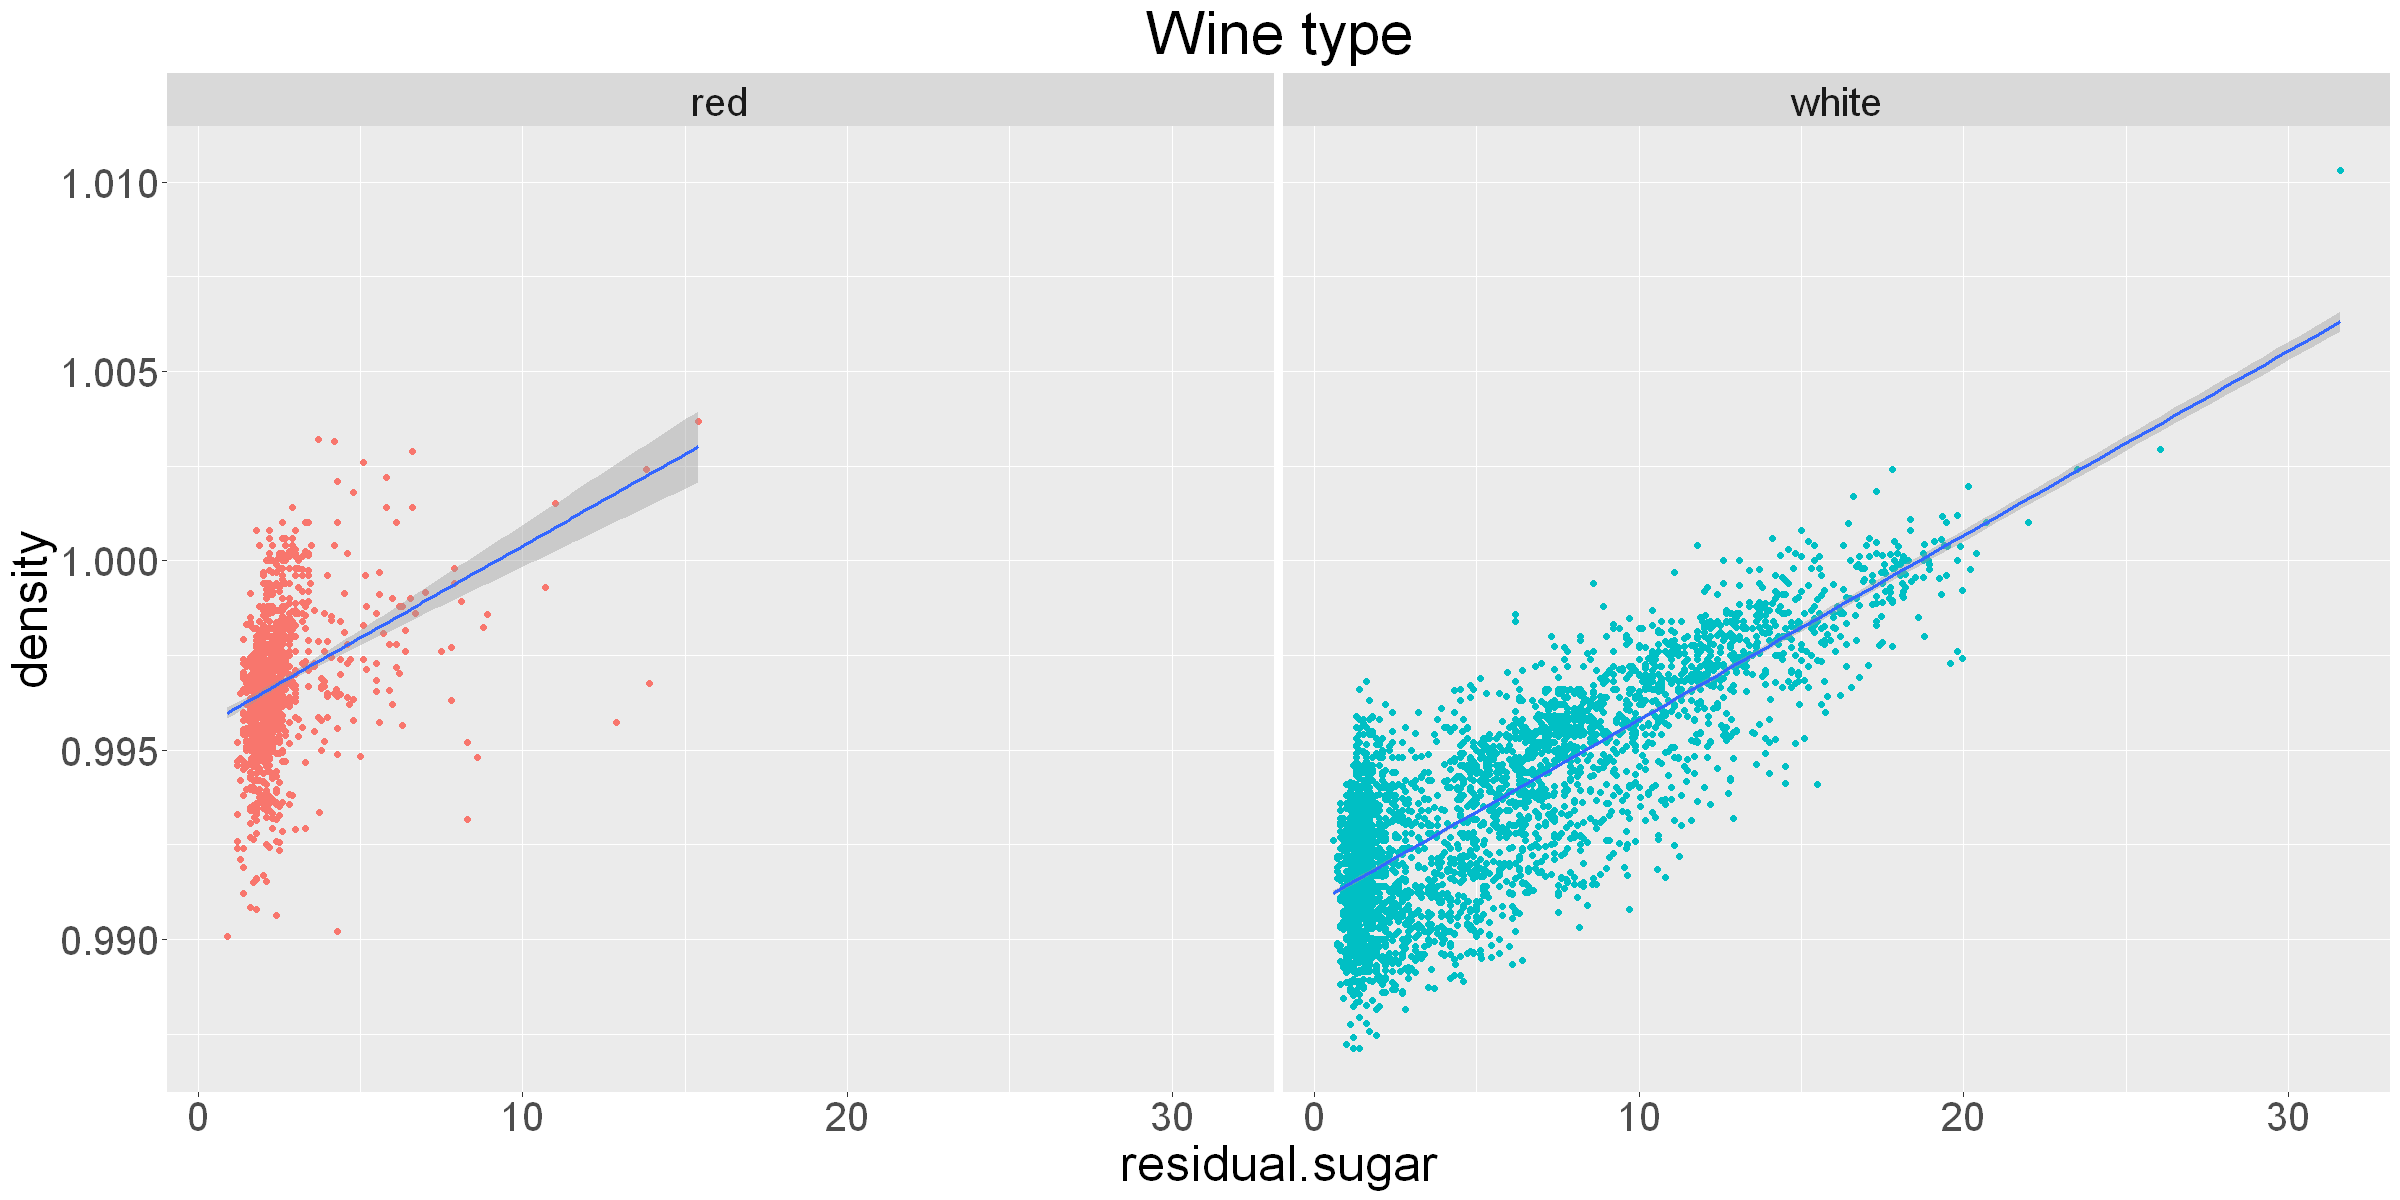

In [33]:
ggplot(train,aes(residual.sugar,density)) + geom_point(aes(col =factor(type))) + geom_smooth(method = 'lm') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
facet_wrap(~type) + ggtitle('Wine type')

# density of the wine increases as residual.sugar level increses.

`geom_smooth()` using formula 'y ~ x'



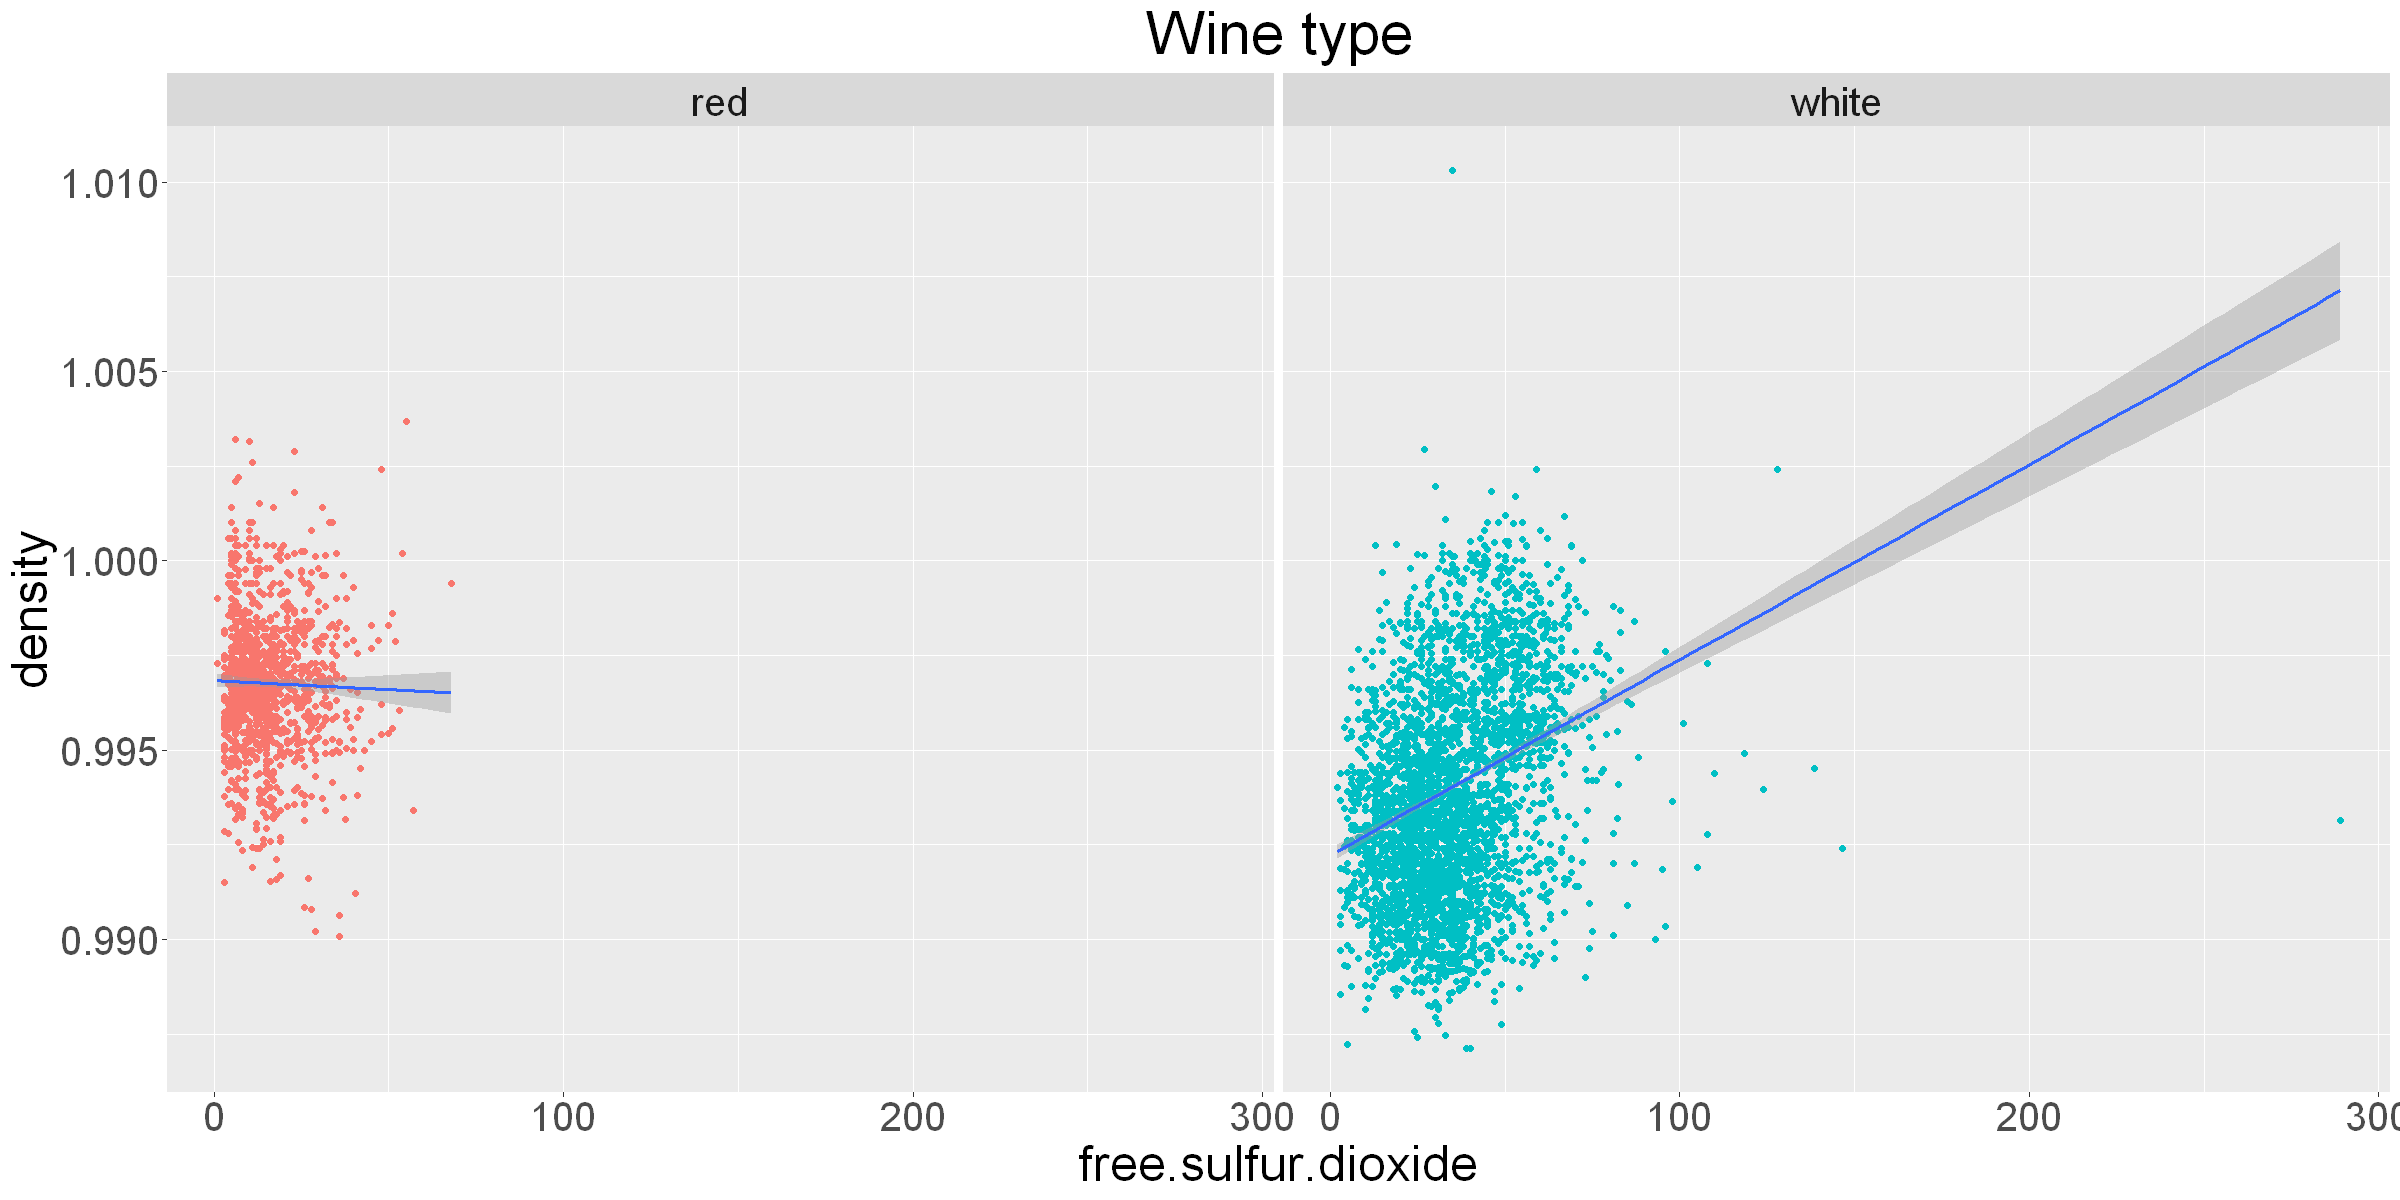

In [34]:
ggplot(train,aes(free.sulfur.dioxide,density)) + geom_point(aes(col =factor(type))) + geom_smooth(method = 'lm') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
facet_wrap(~type) + ggtitle('Wine type')

# level of free.sulfur.dioxide is not affecting the density of red wine much.
# But for white wine, density increases as free.sulfur.dioxide level increases.

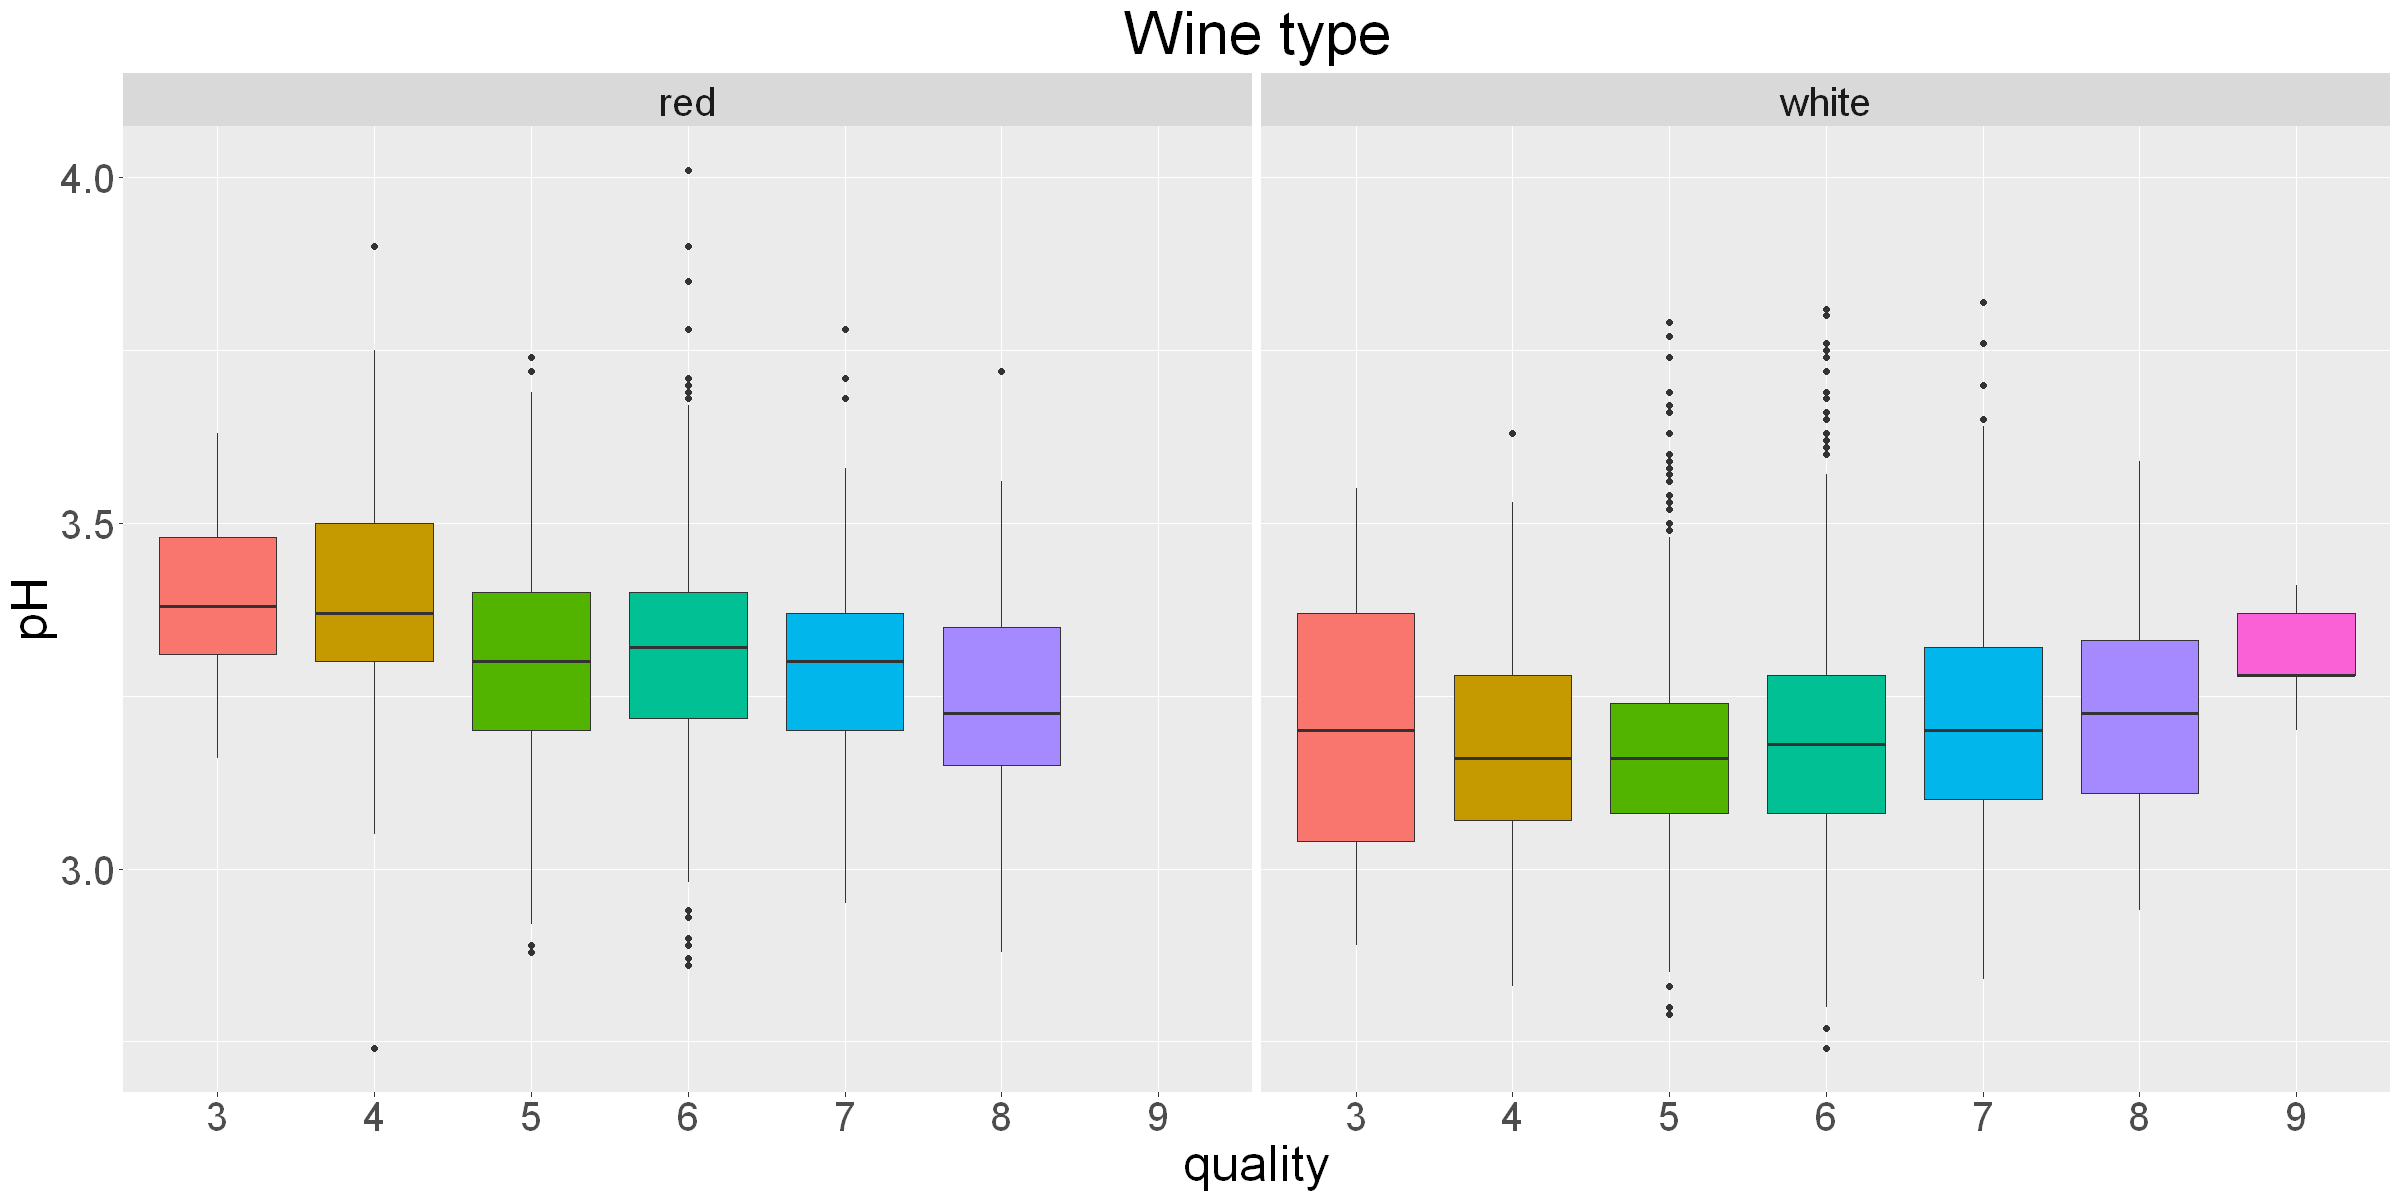

In [35]:
ggplot(train, aes(factor(quality),pH)) + geom_boxplot(aes(fill = factor(quality))) + labs(x ='quality') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
facet_wrap(~type) + ggtitle('Wine type')

# pH value of red wine decreases as the quality improves but for white wine pH value increses as the quality improves.

`geom_smooth()` using formula 'y ~ x'



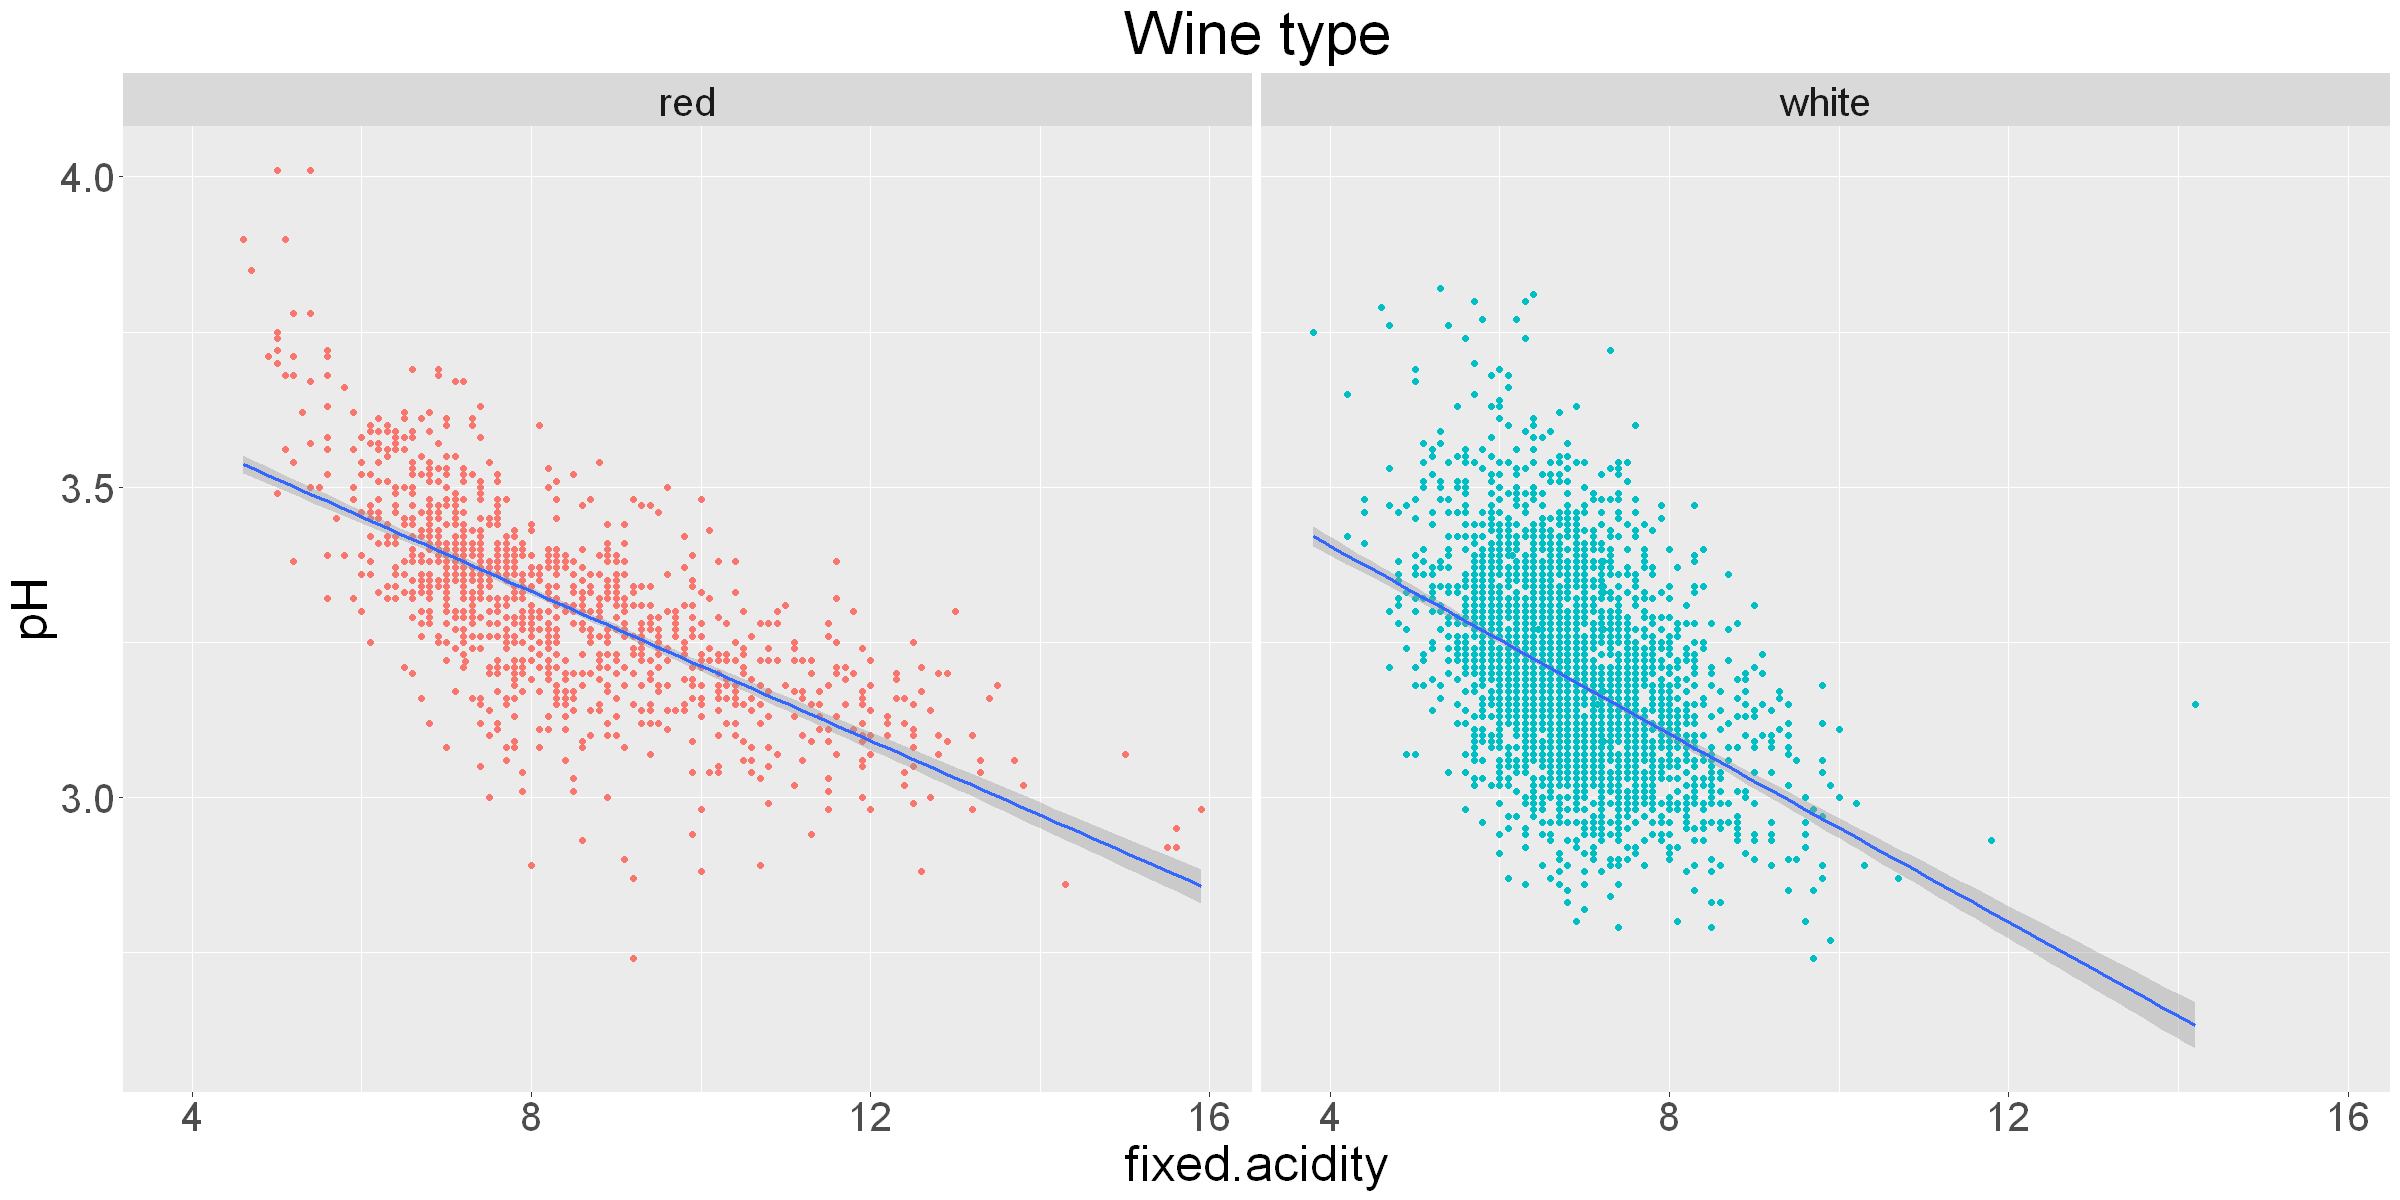

In [36]:
ggplot(train,aes(fixed.acidity,pH)) + geom_point(aes(col =factor(type))) + geom_smooth(method = 'lm') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
facet_wrap(~type) + ggtitle('Wine type')

# pH value decreases as the fixed.acidity of the wine increases.

`geom_smooth()` using formula 'y ~ x'



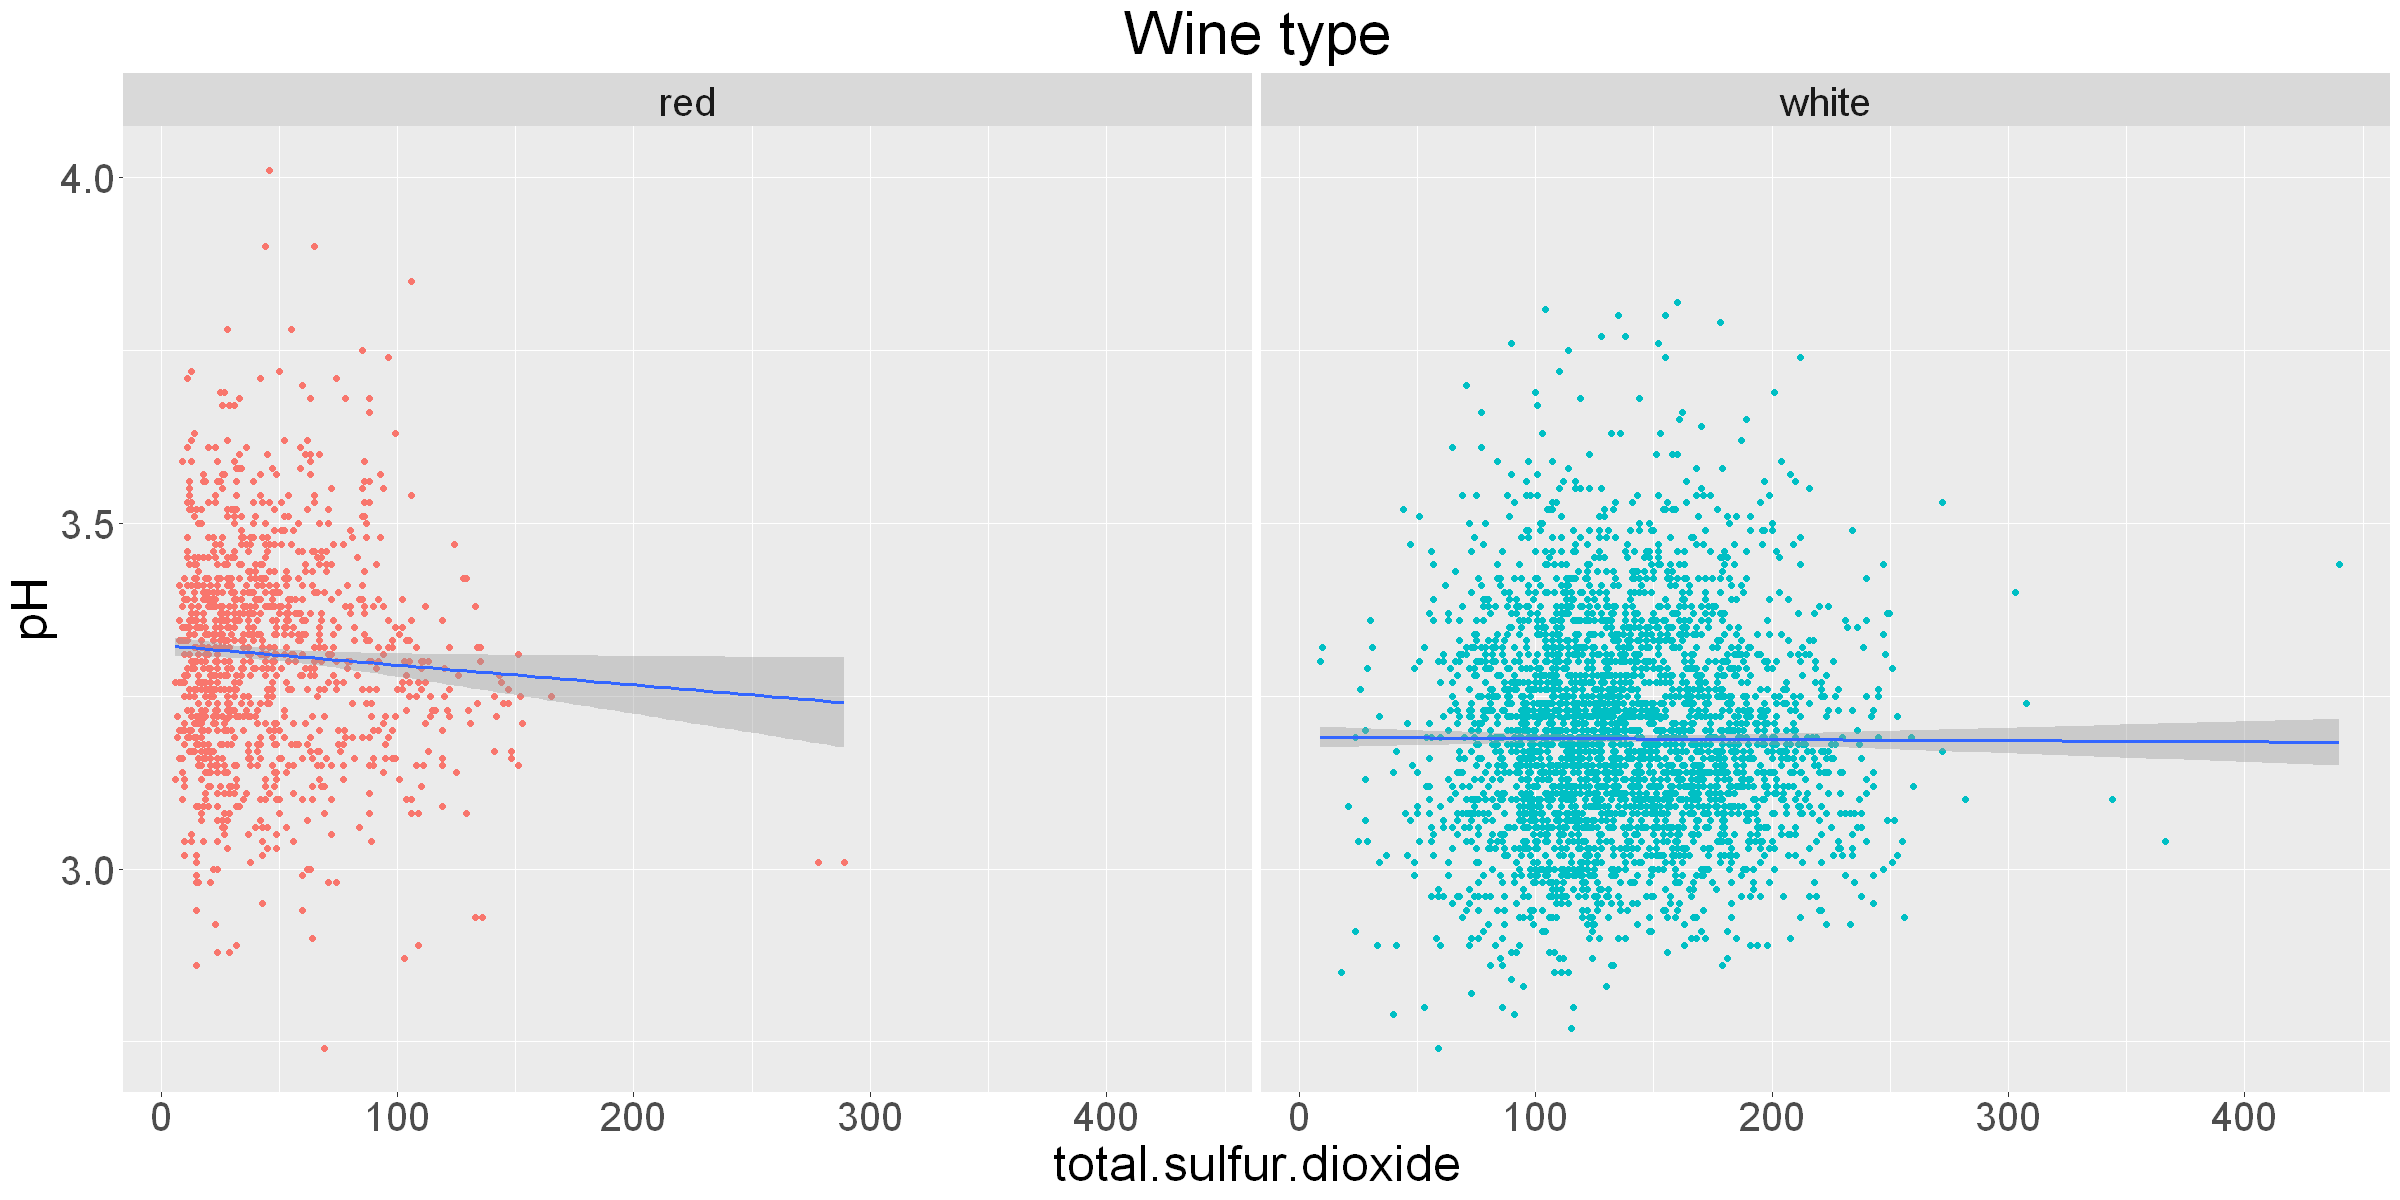

In [37]:
ggplot(train,aes(total.sulfur.dioxide,pH)) + geom_point(aes(col =factor(type))) + geom_smooth(method = 'lm') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
facet_wrap(~type) + ggtitle('Wine type')

# pH value decreases as the free.sulfur.dioxide increses for red wine.
# But level of free.sulfur.dioxide is not affecting the pH value for white wine.

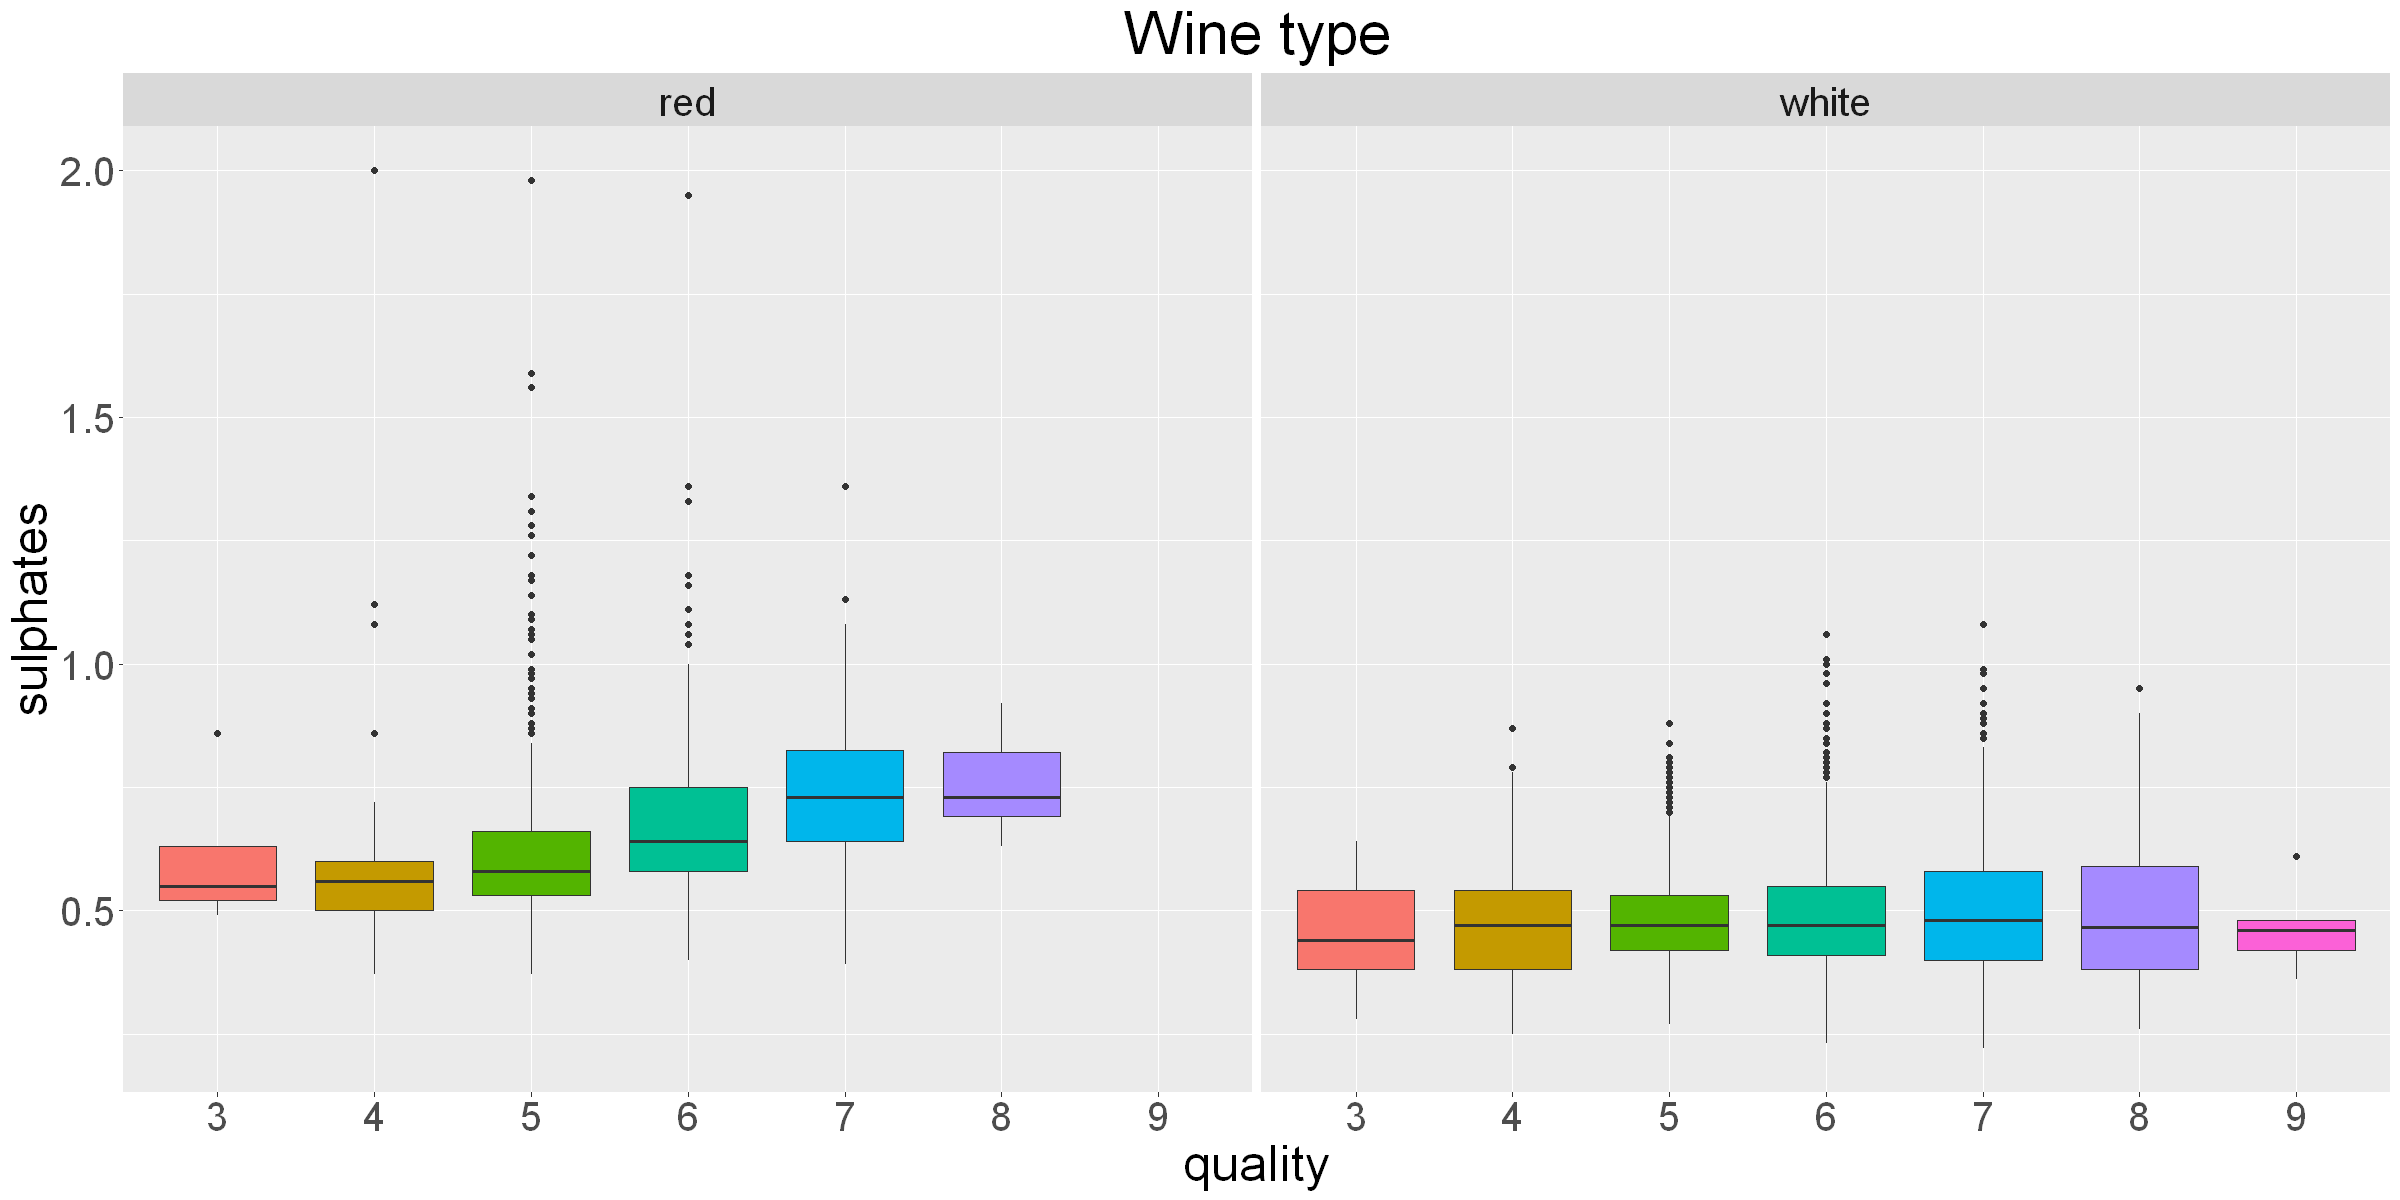

In [38]:
ggplot(train, aes(factor(quality),sulphates)) + geom_boxplot(aes(fill = factor(quality))) + labs(x ='quality') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
facet_wrap(~type) + ggtitle('Wine type')

# sulphates level in the red wine increases as the quality of wine improves but it's not much significant for
#                                                         white wine.

`geom_smooth()` using formula 'y ~ x'



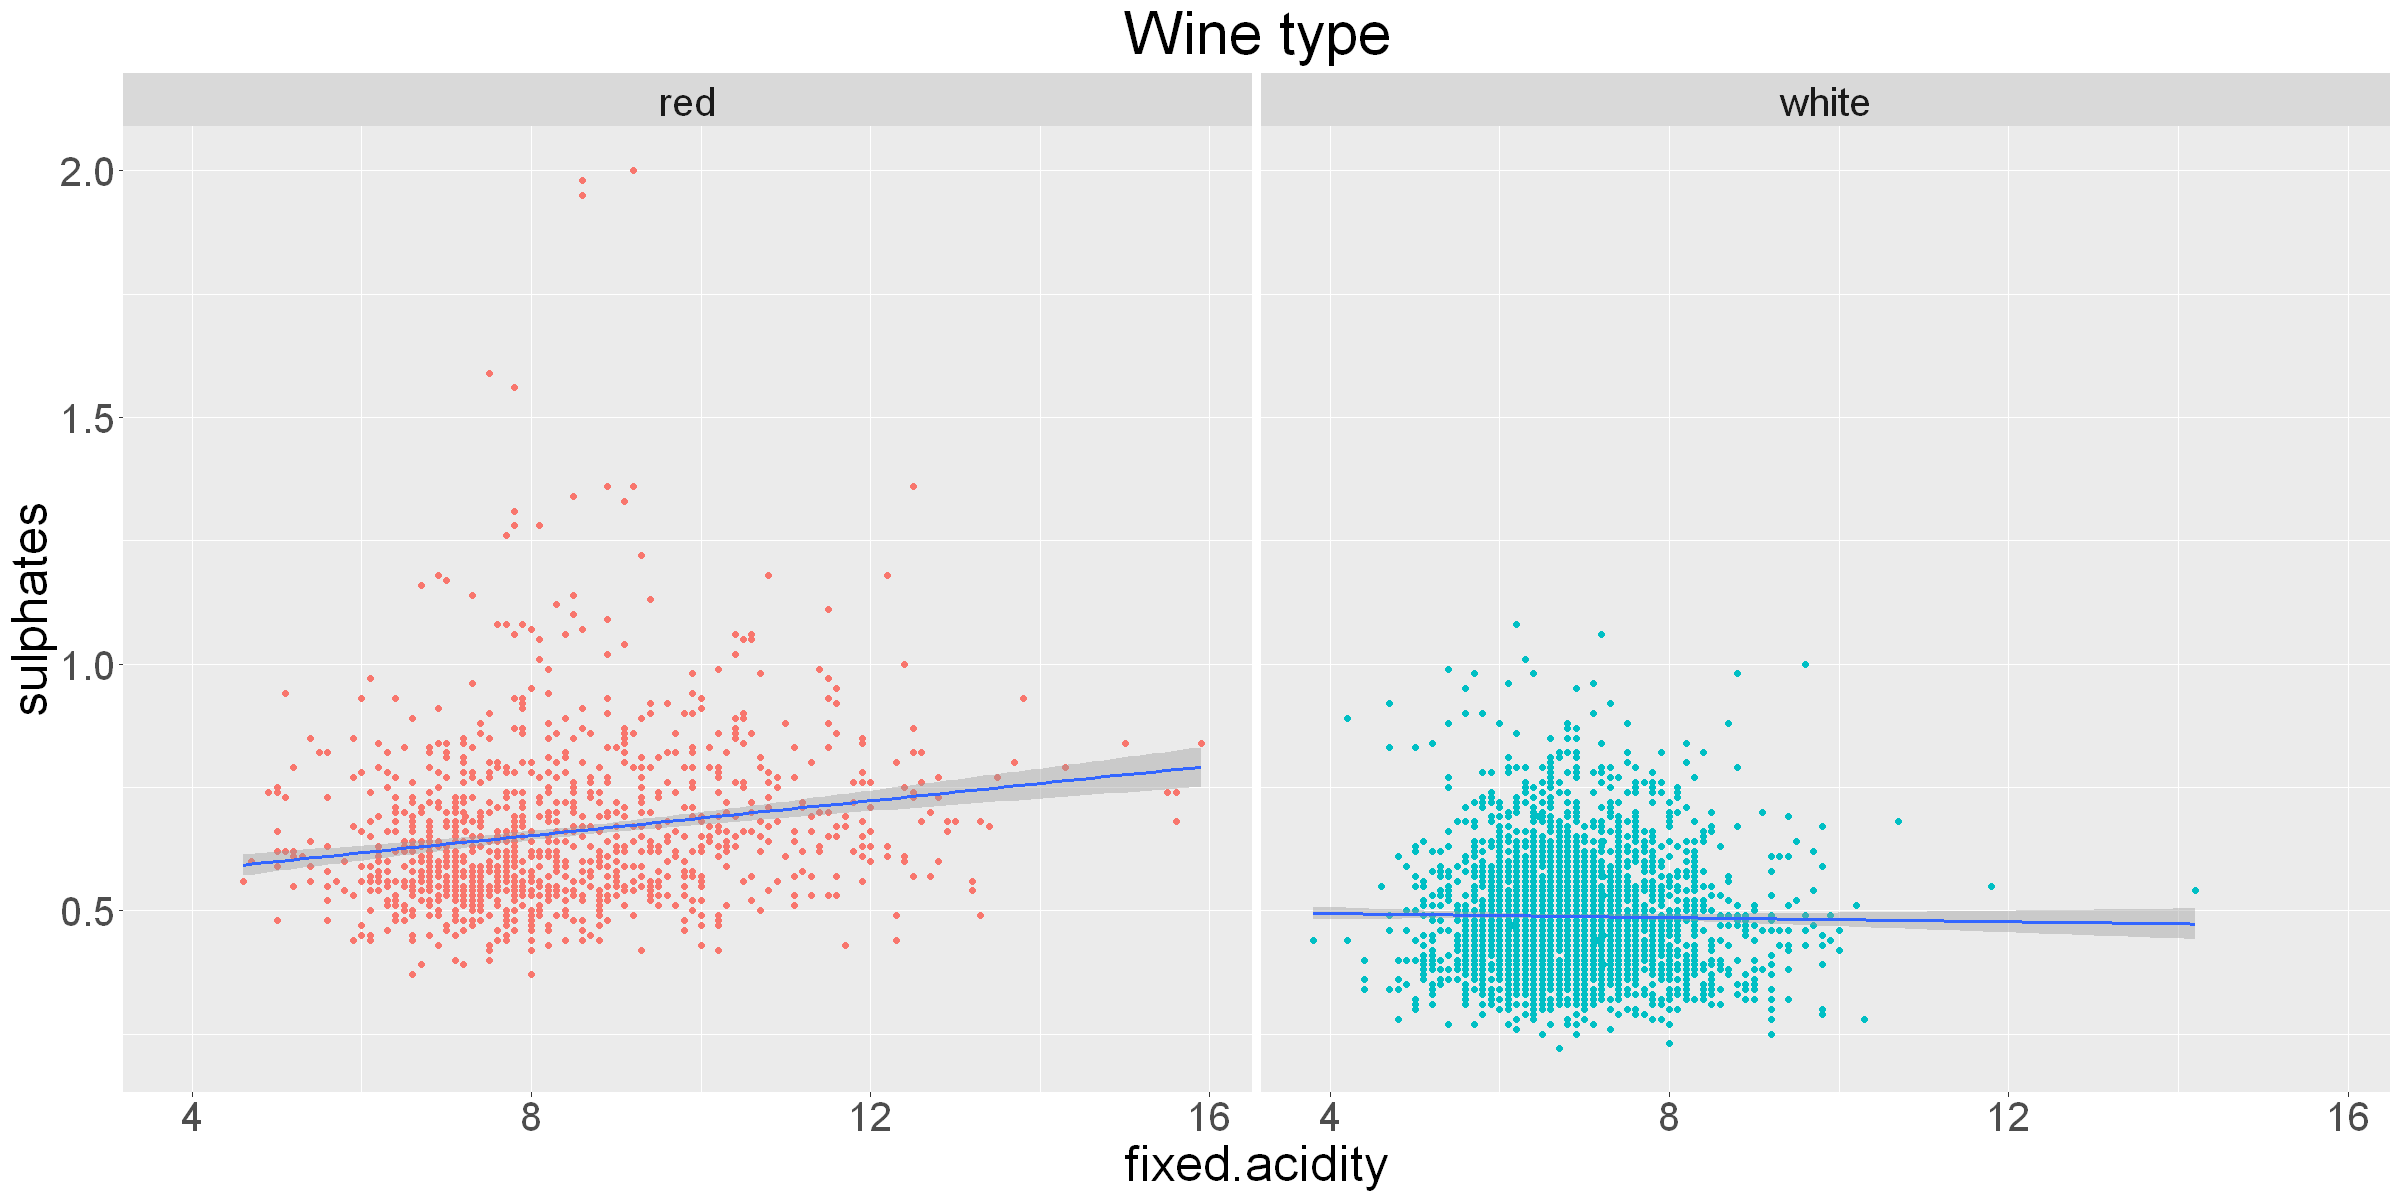

In [39]:
ggplot(train,aes(fixed.acidity,sulphates)) + geom_point(aes(col =factor(type))) + geom_smooth(method = 'lm') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
facet_wrap(~type) + ggtitle('Wine type')

# level of sulphates increases as the fixed.acidity level increases for red wine.
# But fixed.acidity level is not affecting sulphates level for  white wine.

`geom_smooth()` using formula 'y ~ x'



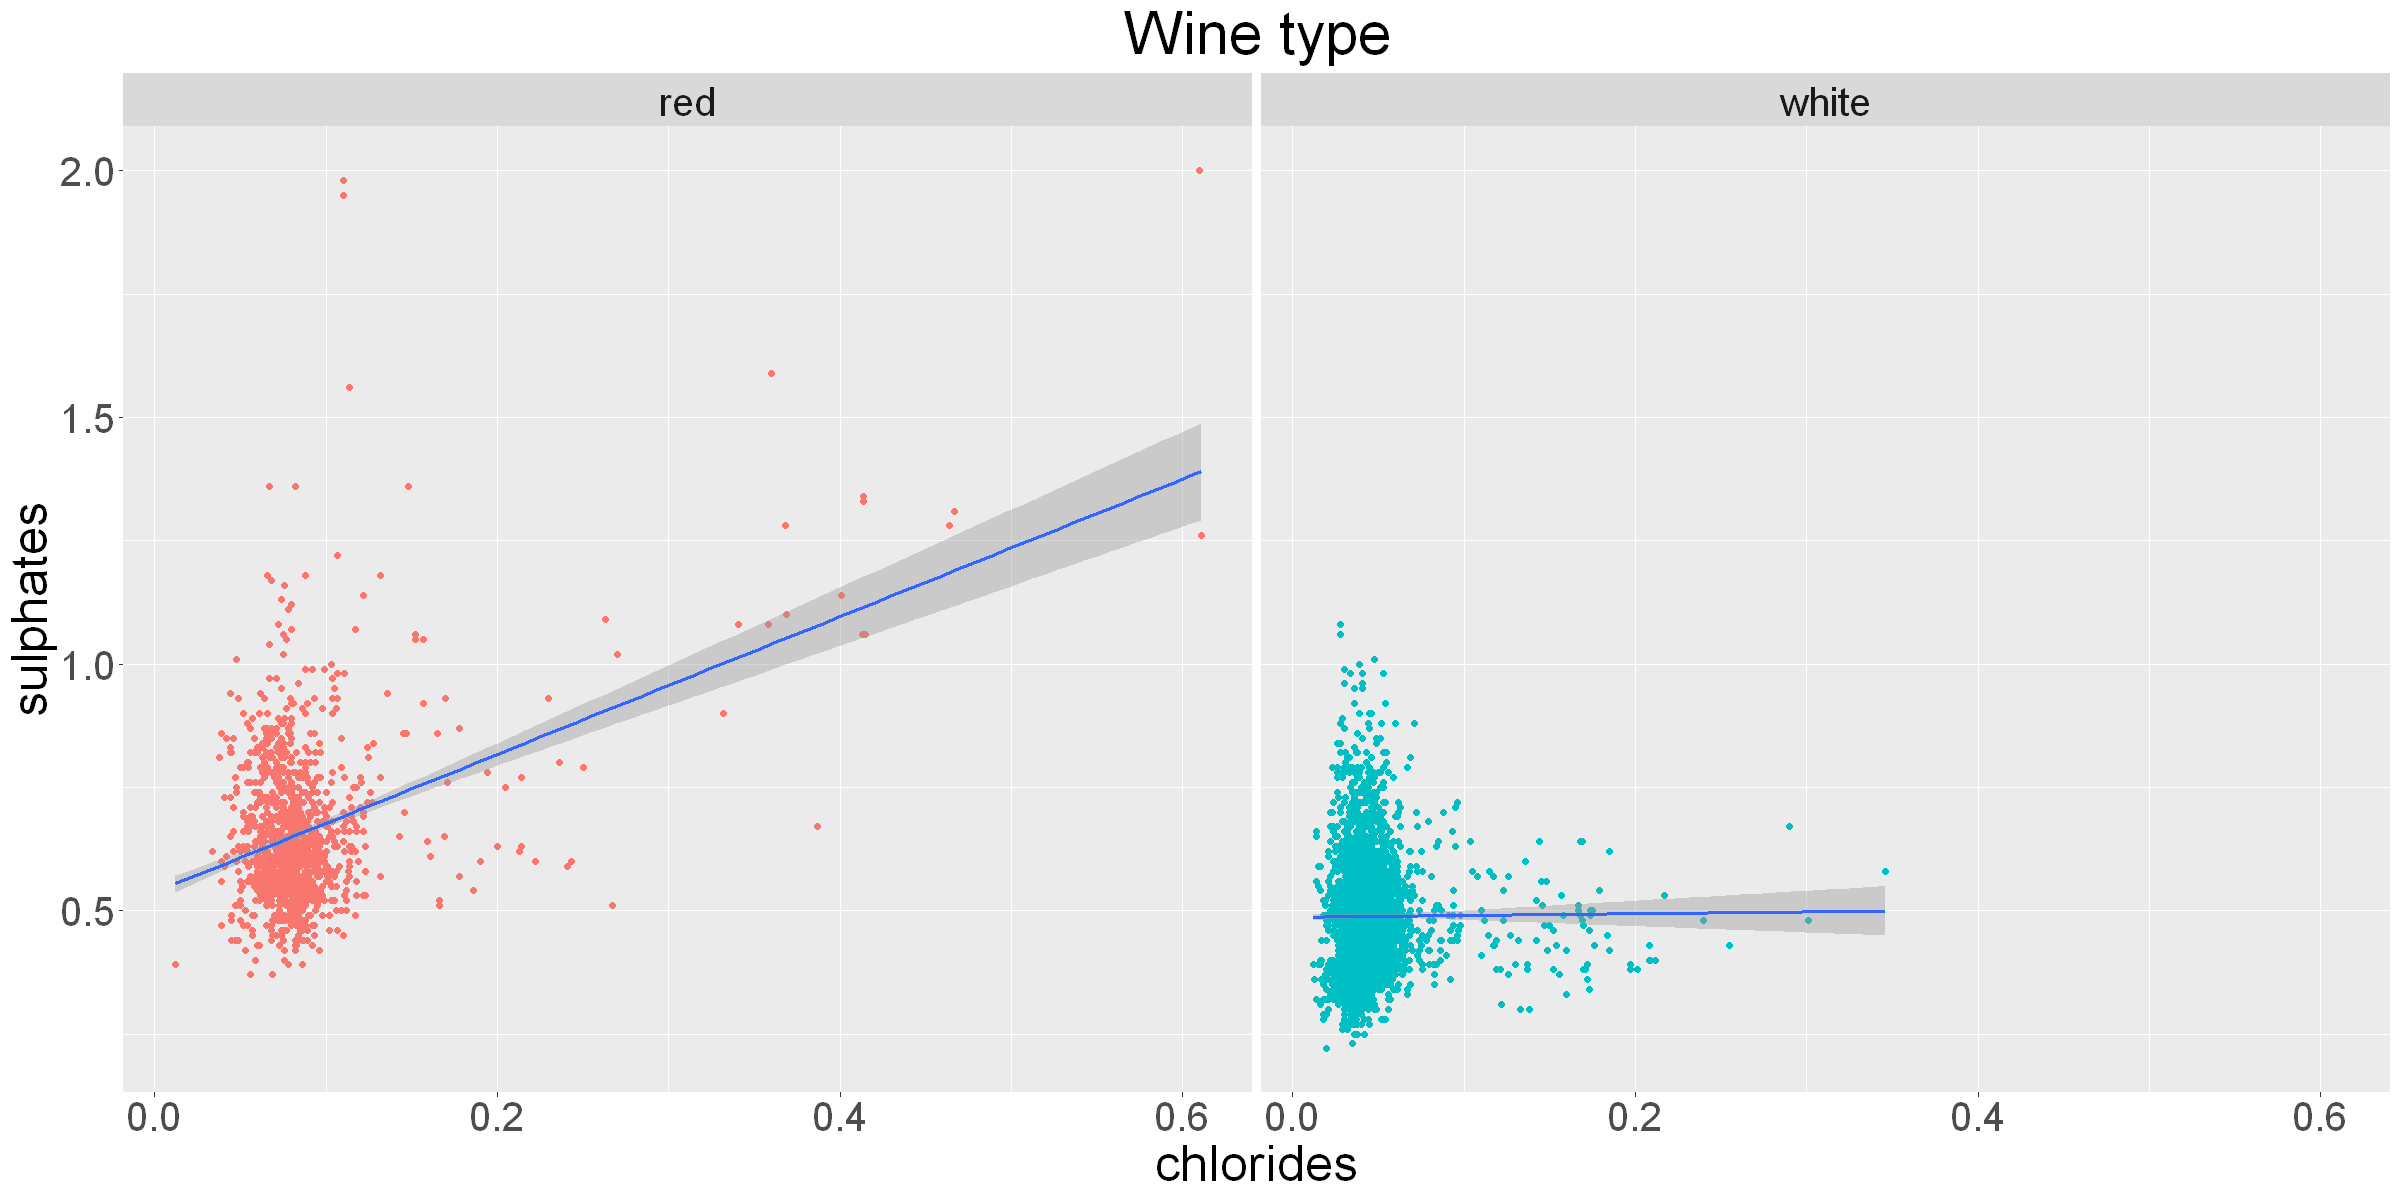

In [40]:
ggplot(train,aes(chlorides,sulphates)) + geom_point(aes(col =factor(type))) + geom_smooth(method = 'lm') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
facet_wrap(~type) + ggtitle('Wine type')

# sulphates level is greatly affected by chloride level in red wine.
# But sulphates level in white wine is not affected much by chloride level.

`geom_smooth()` using formula 'y ~ x'



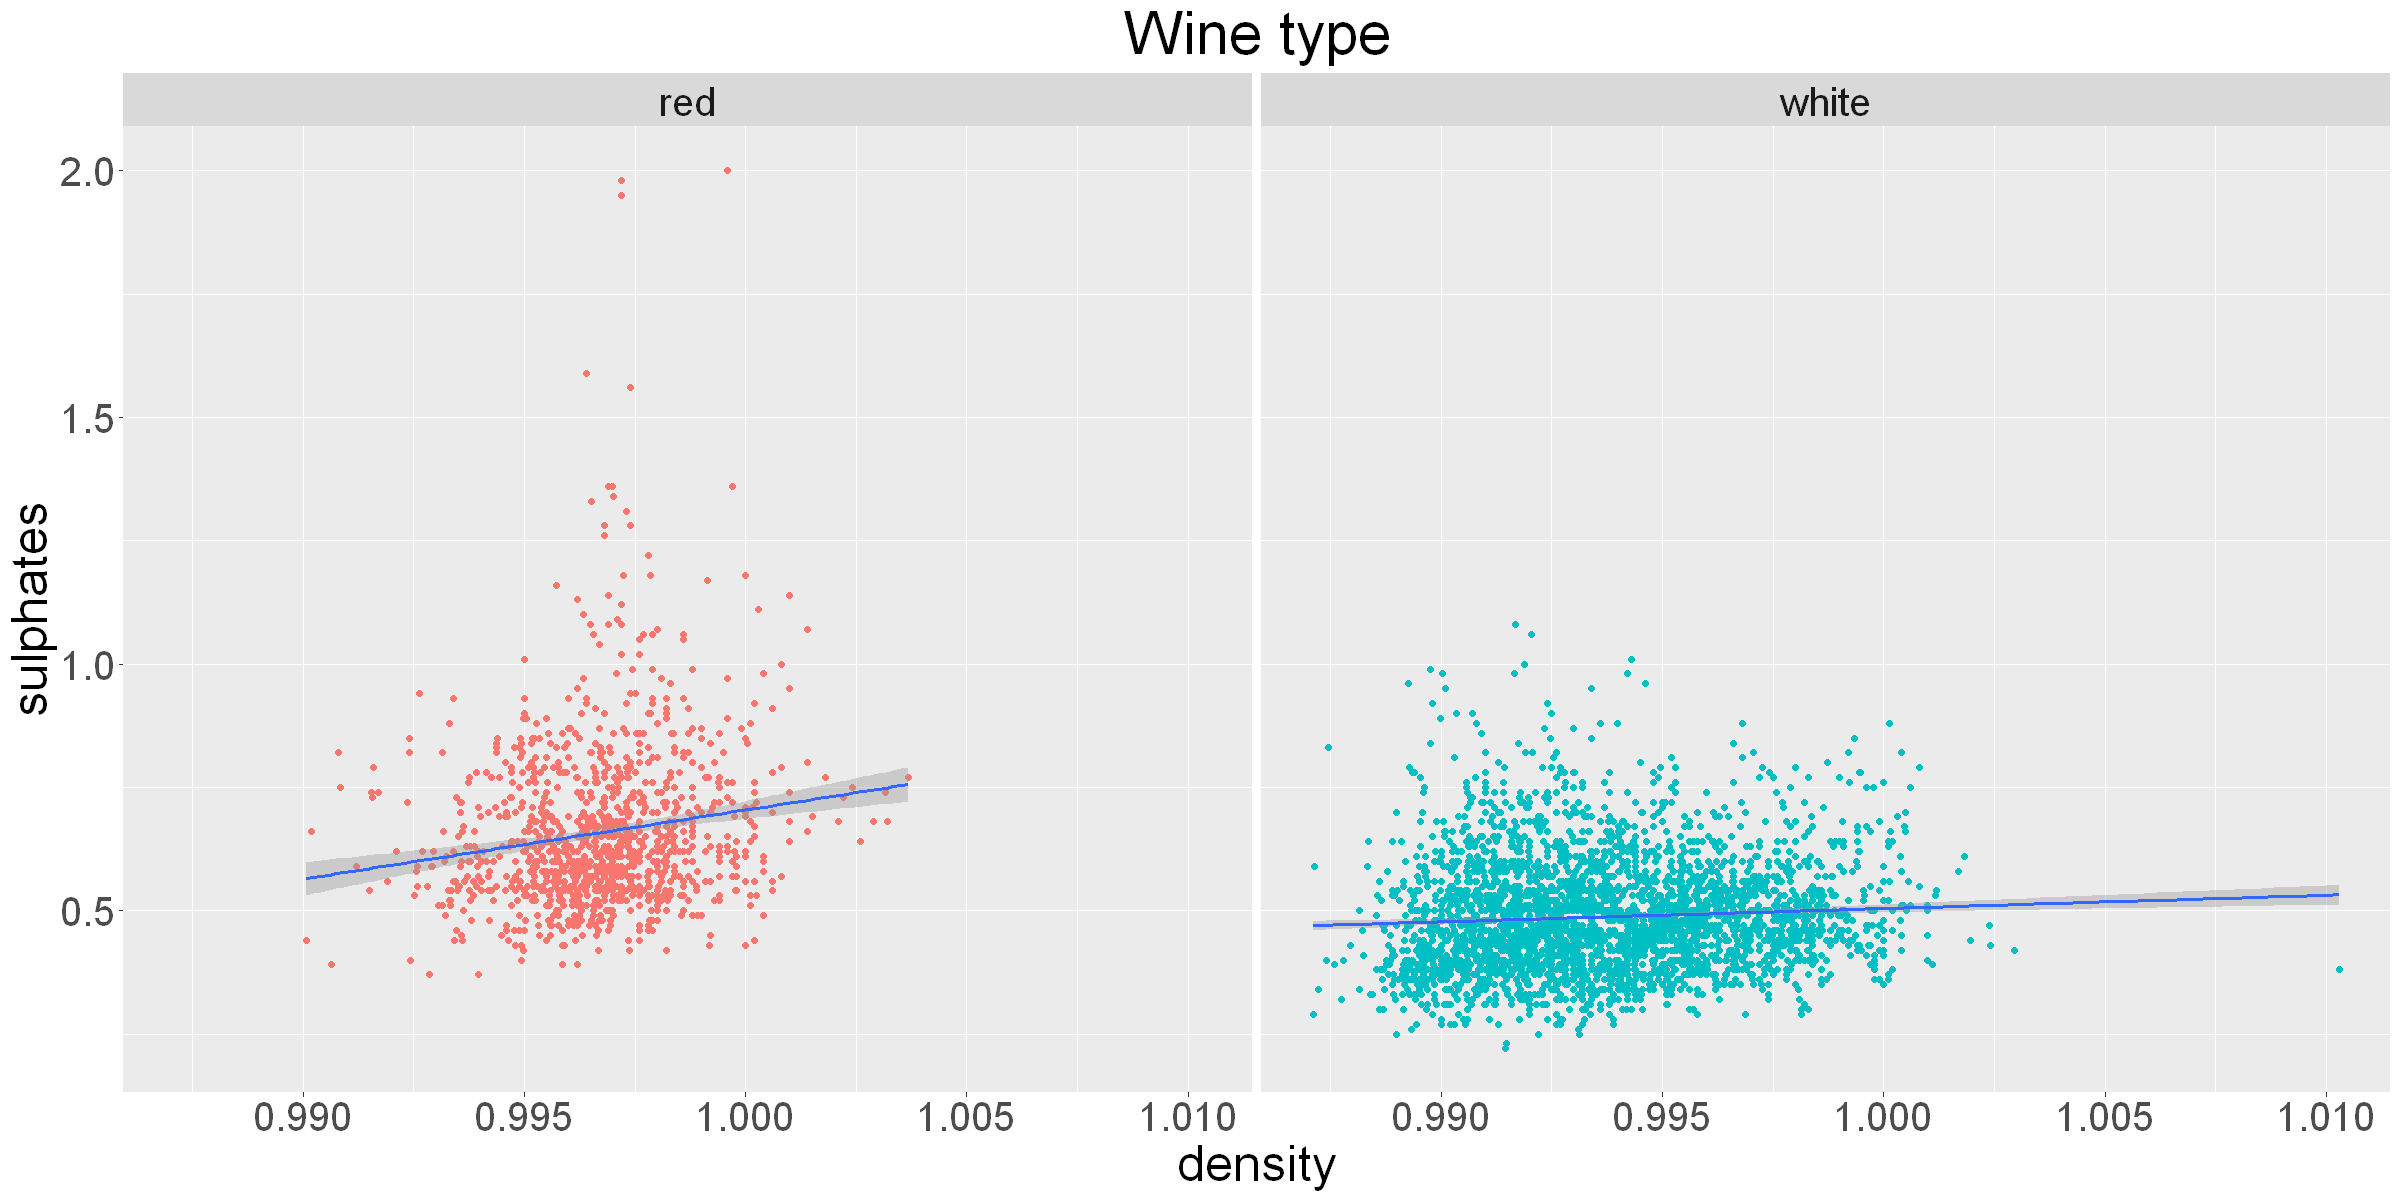

In [41]:
ggplot(train,aes(density,sulphates)) + geom_point(aes(col =factor(type))) + geom_smooth(method = 'lm') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
facet_wrap(~type) + ggtitle('Wine type')

# increase in sulphates level causes increase in the density of the wine.

`geom_smooth()` using formula 'y ~ x'



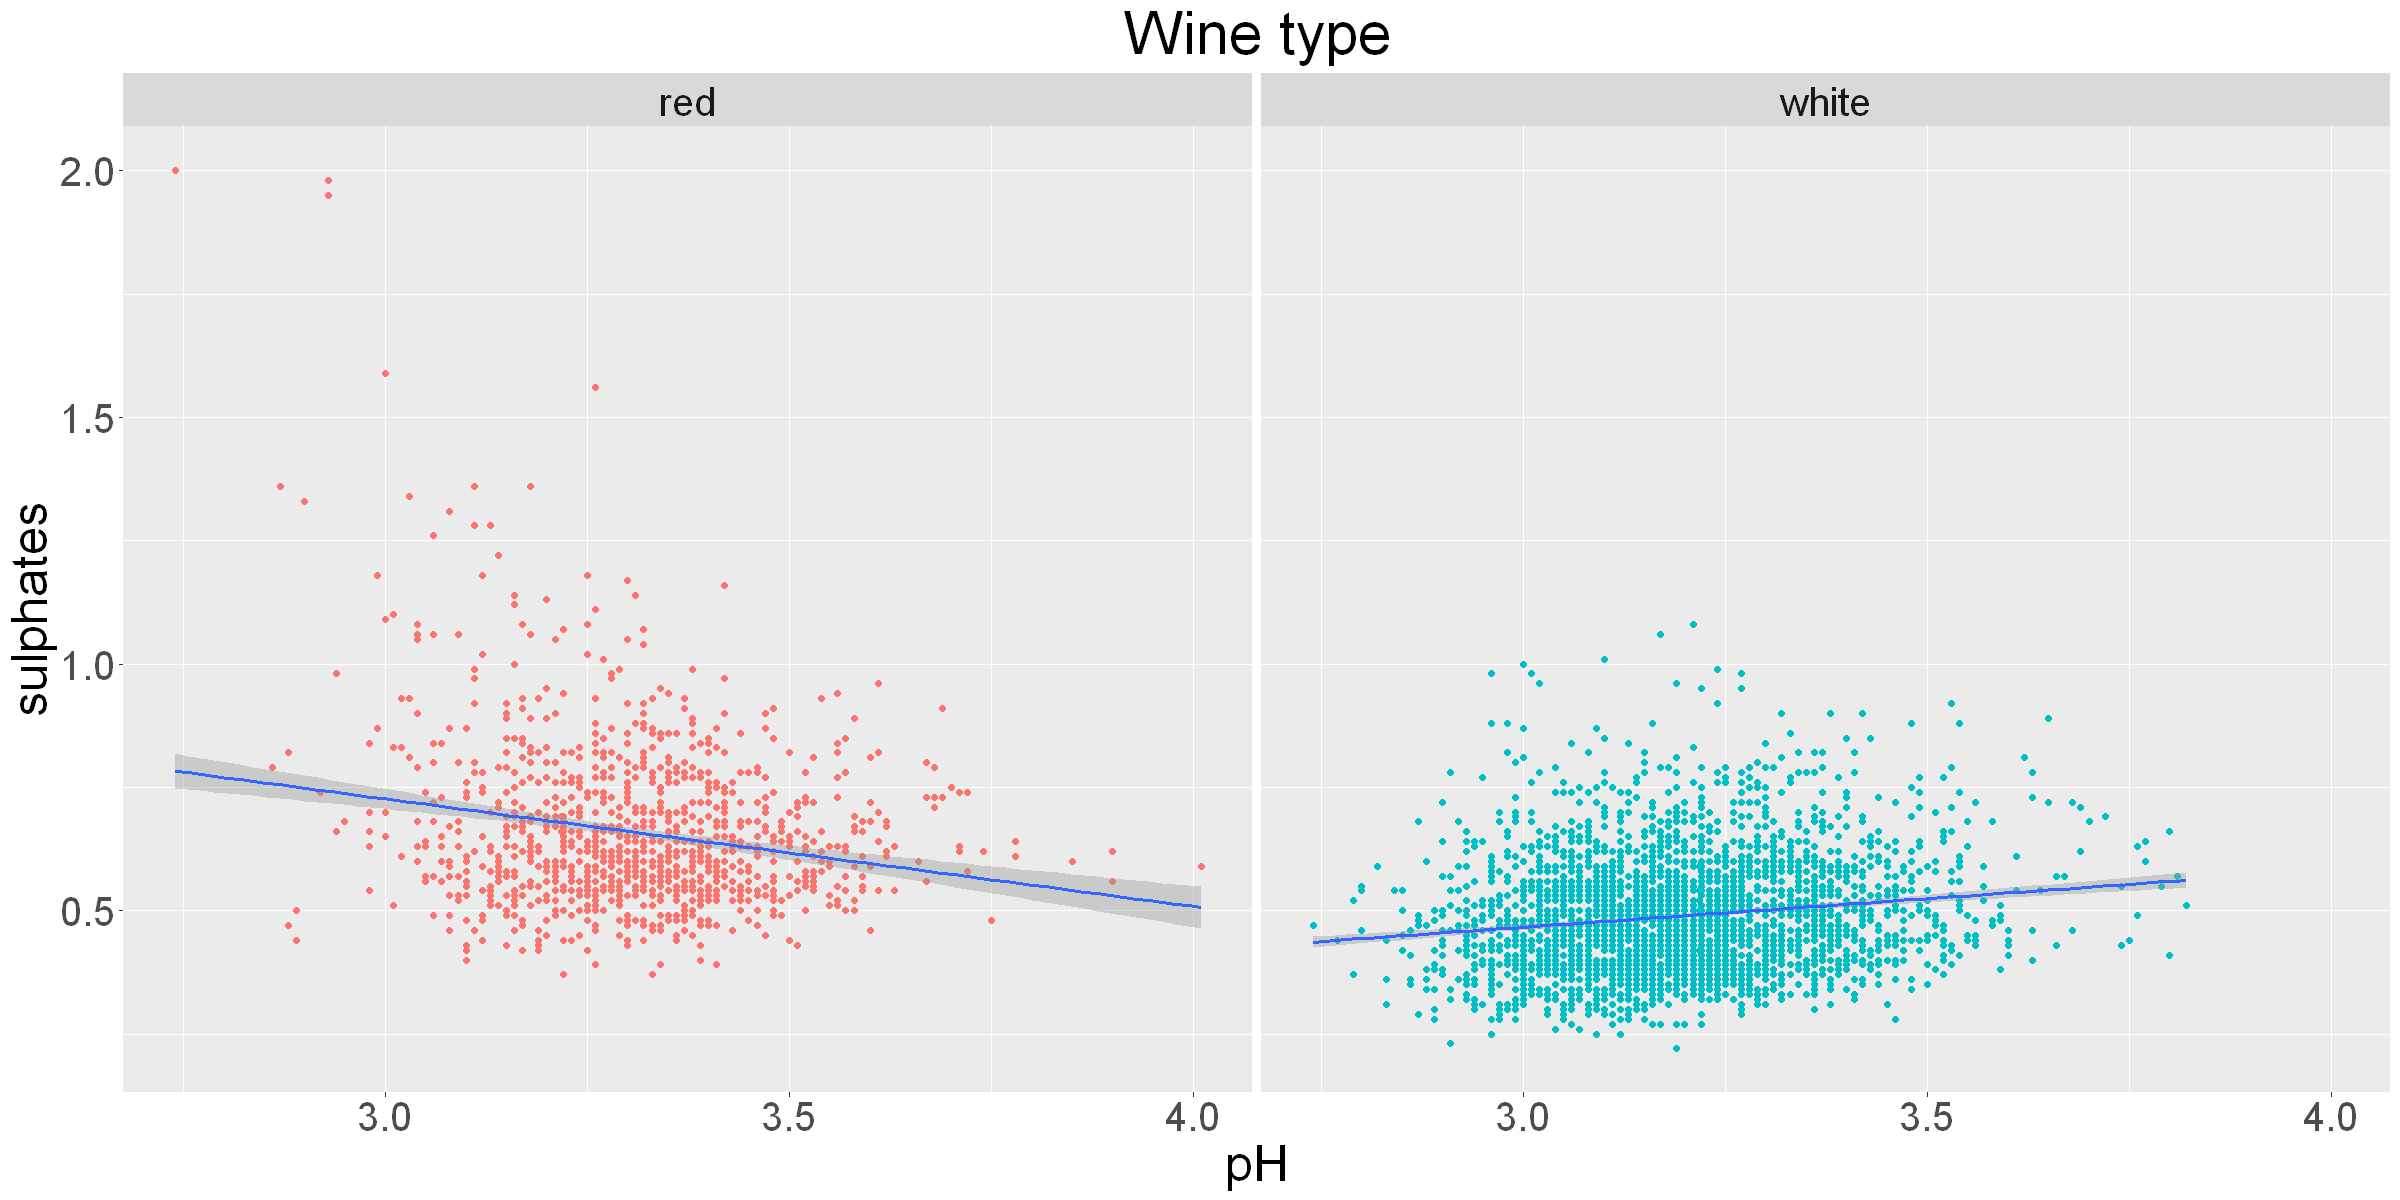

In [42]:
ggplot(train,aes(pH,sulphates)) + geom_point(aes(col =factor(type))) + geom_smooth(method = 'lm') + facet_wrap(~type) +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
ggtitle('Wine type')

# pH value increases as the sulphates level increases for white wine.
# whereas it decreases for red wine.

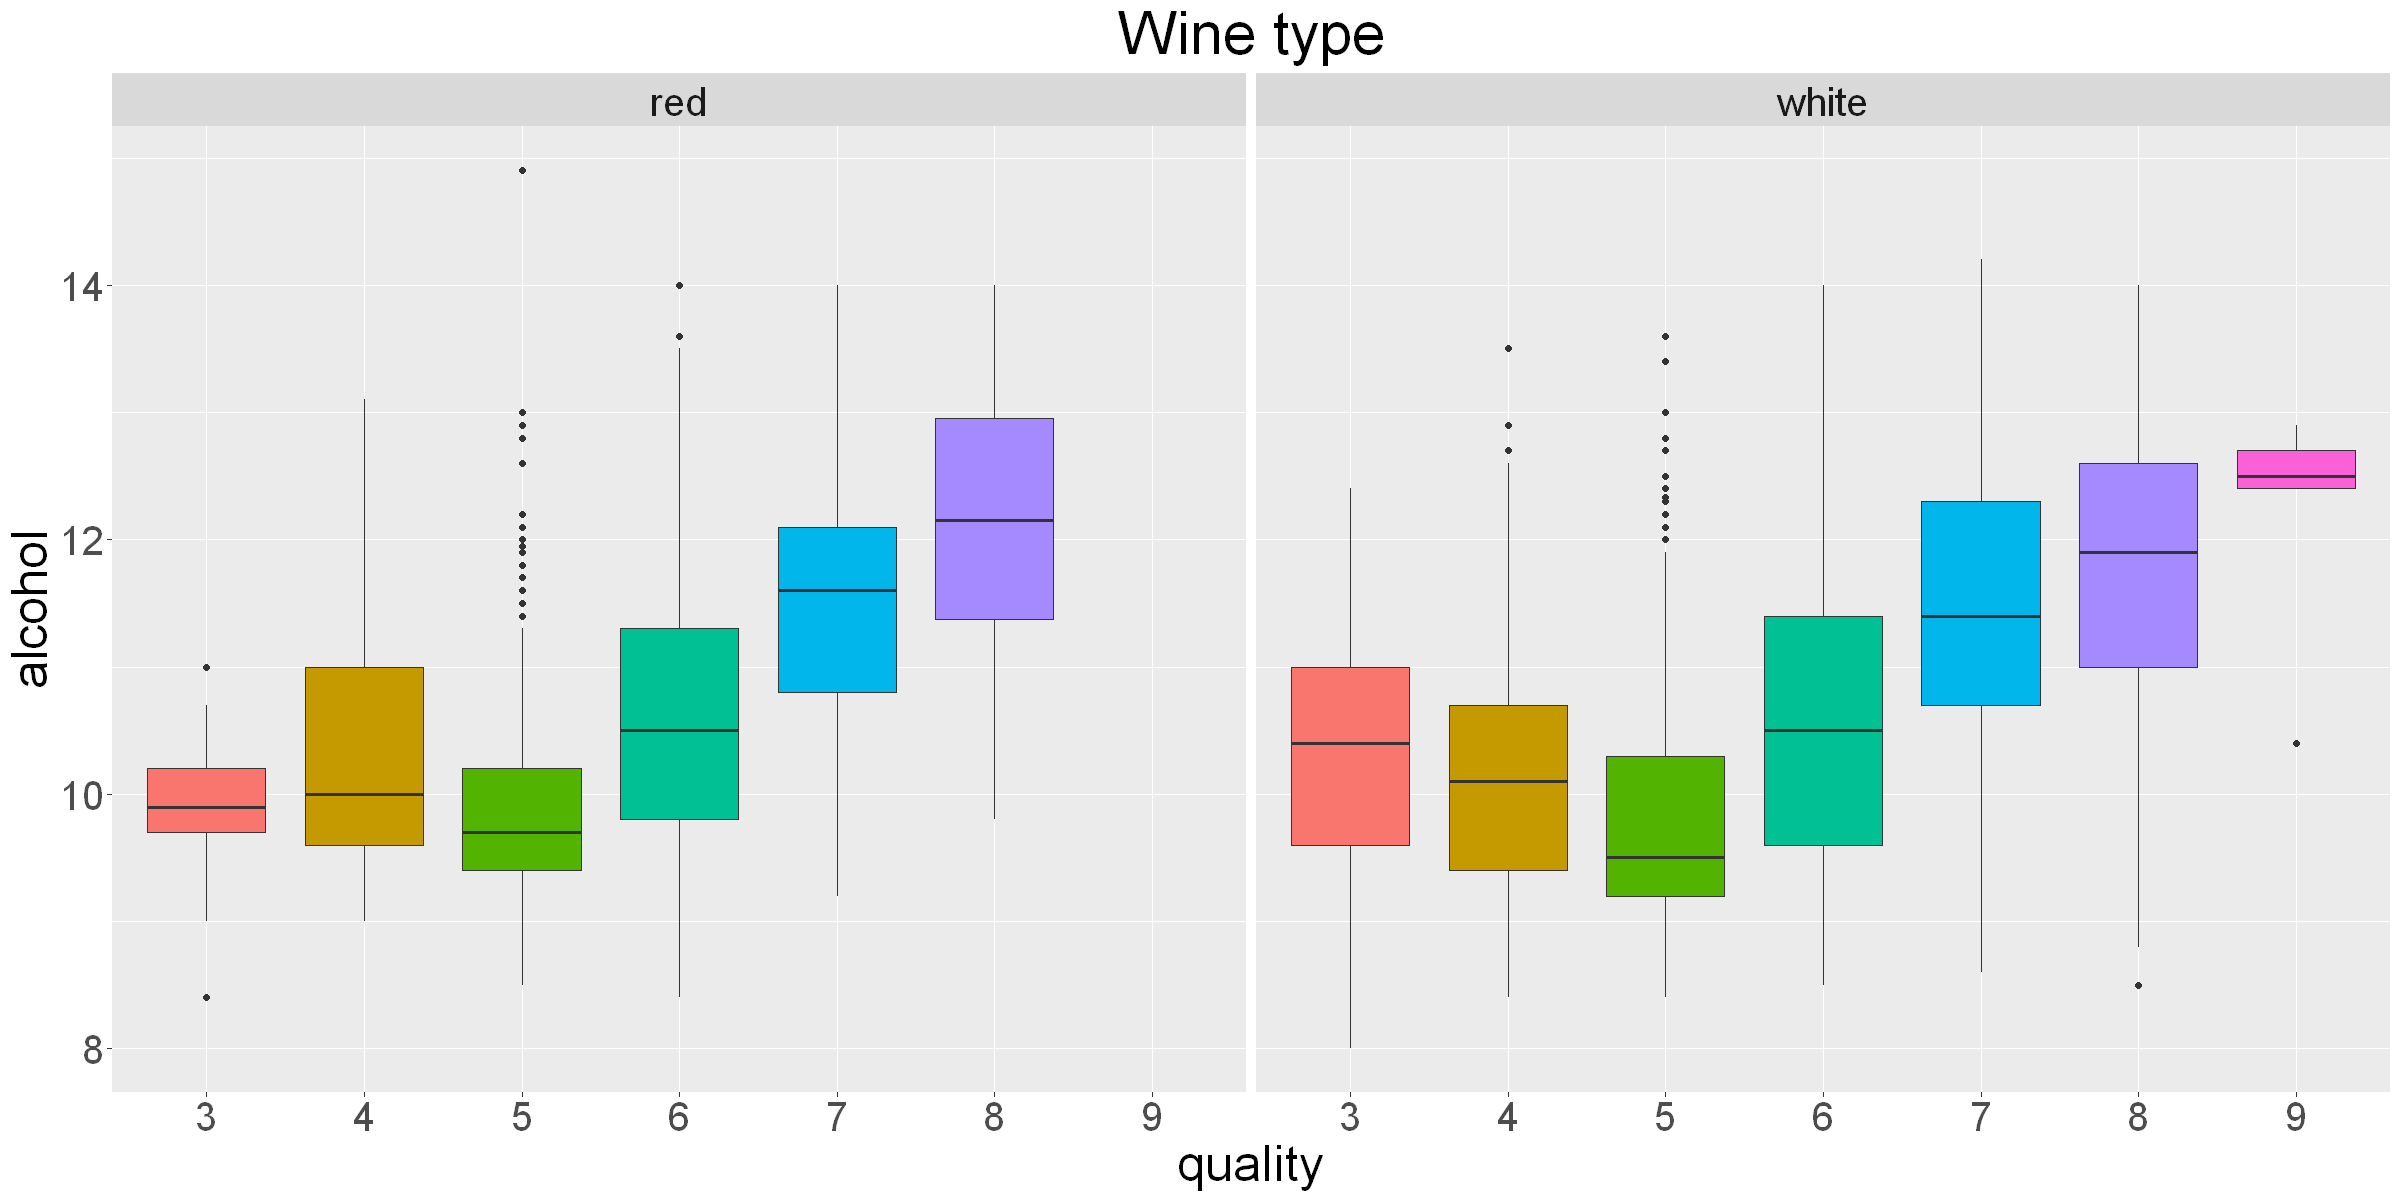

In [43]:
ggplot(train, aes(factor(quality),alcohol)) + geom_boxplot(aes(fill = factor(quality))) + labs(x ='quality') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
facet_wrap(~type) + ggtitle('Wine type')

# alcohol in the wine decreaes till the quality 3 but alchohol level increases afterwards.

`geom_smooth()` using formula 'y ~ x'



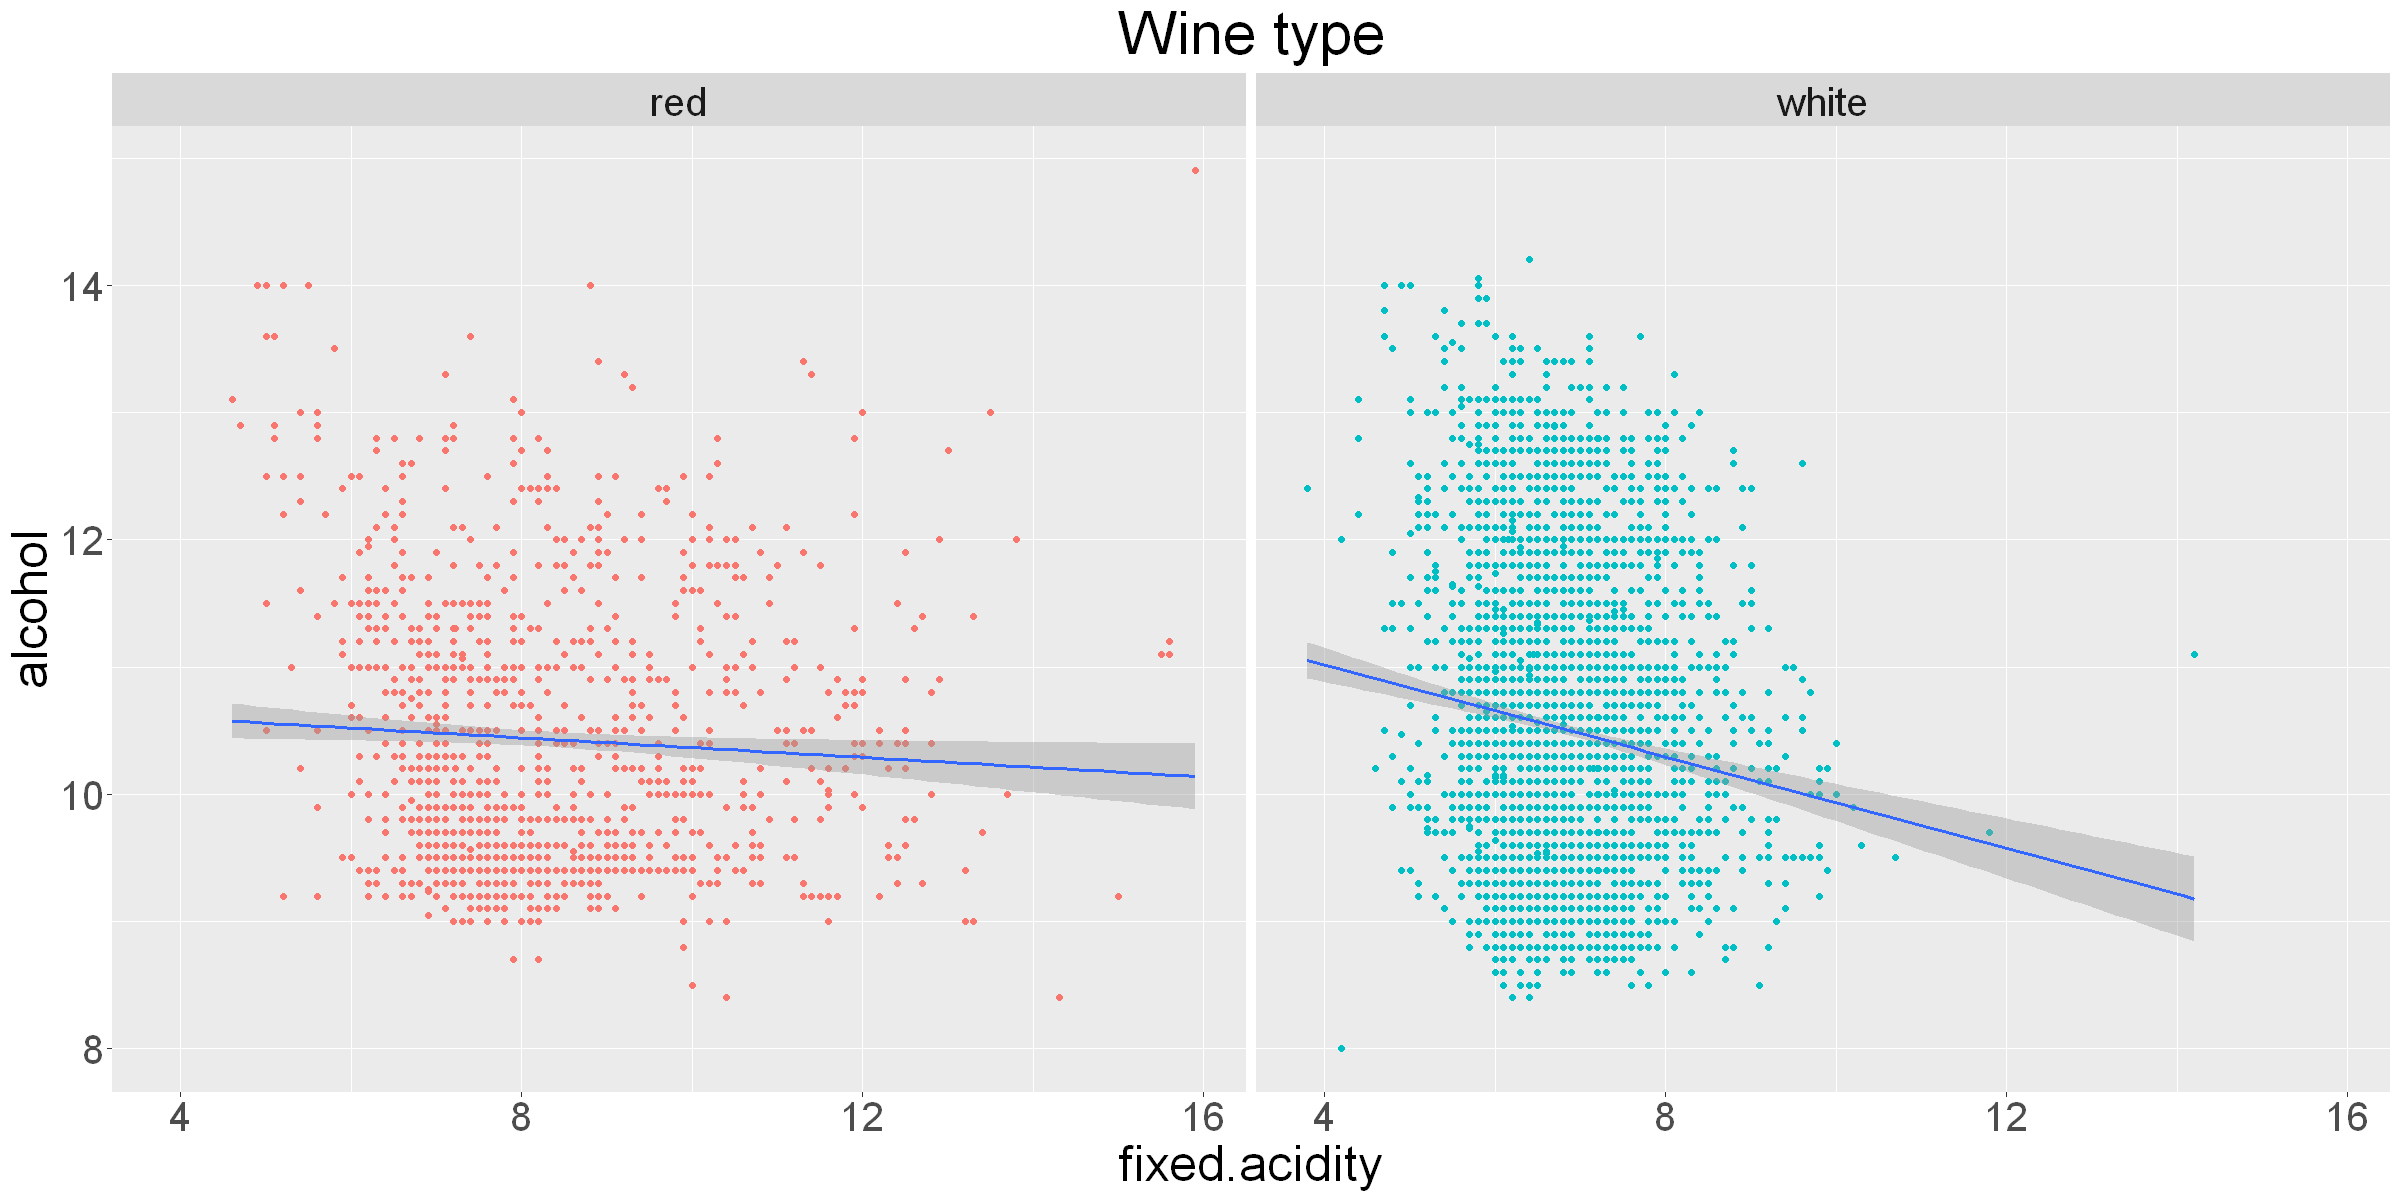

In [44]:
ggplot(train,aes(fixed.acidity,alcohol)) + geom_point(aes(col =factor(type))) + geom_smooth(method = 'lm') +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
facet_wrap(~type) + ggtitle('Wine type')

# alcohol level in the wine sharoly decreases as the fixed.acidity level increases for white wine.
# But fixed.acidity level is not getting affected much by alcohol level.

`geom_smooth()` using formula 'y ~ x'



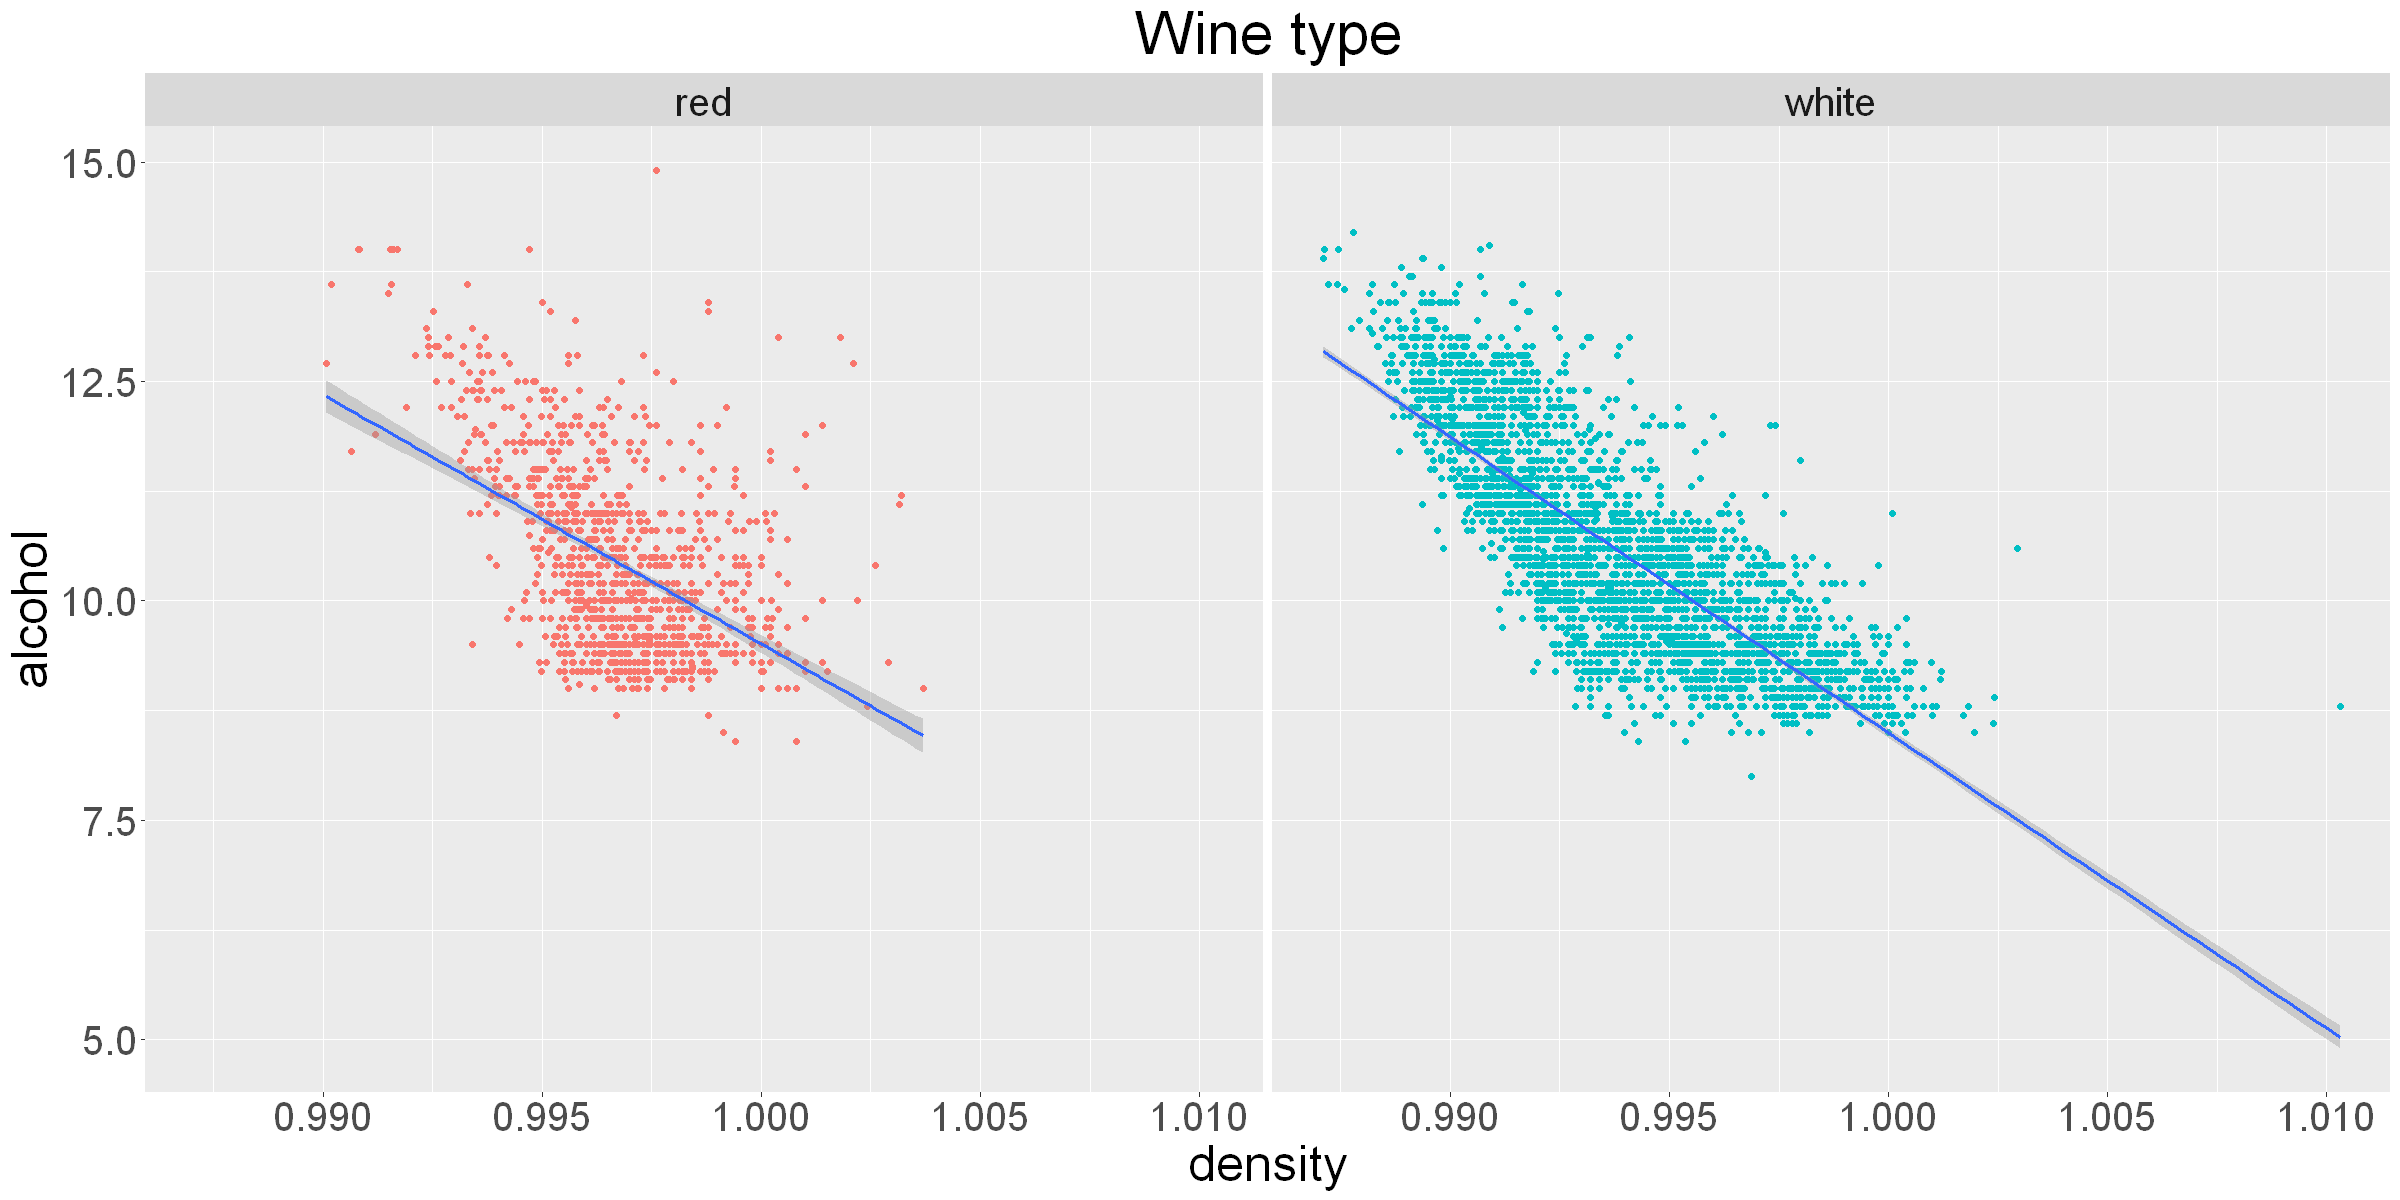

In [45]:
ggplot(train,aes(density,alcohol)) + geom_point(aes(col =factor(type))) + geom_smooth(method = 'lm') + facet_wrap(~type) +
theme(text = element_text(size = 30), legend.position = 'Null', plot.title = element_text(hjust = 0.5)) +
ggtitle('Wine type')

# density of the wine decreases as the level of alchohol increases.

## Prediction using Linear Regression

In [46]:
mod1 <- lm(quality ~ ., train)
summary(mod1)


Call:
lm(formula = quality ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8888 -0.4716 -0.0382  0.4591  3.0270 

Coefficients:
                         Estimate   Std. Error t value             Pr(>|t|)    
(Intercept)           116.0598263   17.4867362   6.637 0.000000000035277599 ***
typewhite              -0.4134659    0.0660523  -6.260 0.000000000416830750 ***
fixed.acidity           0.0926942    0.0185422   4.999 0.000000594966662978 ***
volatile.acidity       -1.5069577    0.0909587 -16.568 < 0.0000000000000002 ***
citric.acid            -0.0469736    0.0895247  -0.525             0.599814    
residual.sugar          0.0666151    0.0070096   9.503 < 0.0000000000000002 ***
chlorides              -0.7471278    0.3822303  -1.955             0.050678 .  
free.sulfur.dioxide     0.0054116    0.0008559   6.323 0.000000000278910794 ***
total.sulfur.dioxide   -0.0013900    0.0003659  -3.799             0.000147 ***
density              -115.2865663   17.72257

In [47]:
pred1 <- predict(mod1, test)

In [48]:
xtabs(~round(pred1) + quality, test)

# mod1 is 55.08% accurate on test.

            quality
round(pred1)   3   4   5   6   7   8
           4   1   2   2   2   0   0
           5   1  14 218  94   9   0
           6   2  18 196 446 169  29
           7   0   0   2  33  50  12

In [49]:
# variable citric.acid and chlorides is not significant. Hence removing these variables from the model.

mod2 <- lm(quality ~ . -citric.acid -chlorides , train)
summary(mod2)


Call:
lm(formula = quality ~ . - citric.acid - chlorides, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8745 -0.4747 -0.0380  0.4627  3.0266 

Coefficients:
                         Estimate   Std. Error t value             Pr(>|t|)    
(Intercept)           121.1256885   17.3253359   6.991  0.00000000000306915 ***
typewhite              -0.4024468    0.0654456  -6.149  0.00000000083635590 ***
fixed.acidity           0.0958523    0.0179685   5.334  0.00000009989363045 ***
volatile.acidity       -1.5027241    0.0856693 -17.541 < 0.0000000000000002 ***
residual.sugar          0.0689278    0.0069262   9.952 < 0.0000000000000002 ***
free.sulfur.dioxide     0.0053606    0.0008558   6.264  0.00000000040579350 ***
total.sulfur.dioxide   -0.0013877    0.0003646  -3.806             0.000143 ***
density              -120.6056045   17.5474530  -6.873  0.00000000000702202 ***
pH                      0.5705901    0.1021605   5.585  0.00000002452758830 ***
sulphates         

In [50]:
pred2 <- predict(mod2, test)

In [51]:
xtabs(~round(pred2) + quality, test)

# mod2 is 55% accurate in test

            quality
round(pred2)   3   4   5   6   7   8
           4   1   2   2   2   0   0
           5   1  14 217  93   8   0
           6   2  18 196 447 171  29
           7   0   0   3  33  49  12

In [52]:
summary(pred2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.924   5.480   5.824   5.824   6.175   7.167 

One point to be noticed is that all the predictors variables are numerical(continuous) but our target variable is integer. Also max and min prediced by linear regression are 7.17 and 3.93 respectively. Linear regression is not predicting any wine of quality 8 and 3. Even after removing insignificant variables from mod1, the quality of model is deteriorating. Hence we can conclude that linear regression models is not good for predicting the quality of wine. We'll try some other algorithm for predicting the same.

## Prediction using decision tree using rpart

In [53]:
mod_DT1 <- rpart(quality ~ ., train)
mod_DT1

n= 5197 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 5197 3996.6480 5.809121  
   2) alcohol< 10.625 3103 1718.9280 5.516275  
     4) volatile.acidity>=0.2525 2001  897.4463 5.343828 *
     5) volatile.acidity< 0.2525 1102  653.9274 5.829401 *
   3) alcohol>=10.625 2094 1617.2750 6.243075  
     6) alcohol< 11.74167 1177  896.7732 6.032285  
      12) volatile.acidity>=0.4425 206  155.2621 5.533981 *
      13) volatile.acidity< 0.4425 971  679.5077 6.138002 *
     7) alcohol>=11.74167 917  601.0796 6.513631 *

In [72]:
data.frame(mod_DT1$variable.importance)

,mod_DT1.variable.importance
,<dbl>
alcohol,779.866788
density,386.461565
chlorides,241.420801
volatile.acidity,233.725137
total.sulfur.dioxide,41.070570
sulphates,38.077208
fixed.acidity,35.467161
citric.acid,29.797699
type,15.350330


In [54]:
pred_DT1 <- predict(mod_DT1, test)

In [55]:
xtabs(~round(pred_DT1) + quality, test)

# mod_DT1 is 52.77% accurate on test.

               quality
round(pred_DT1)   3   4   5   6   7   8
              5   2  20 285 166  25   2
              6   1  13 120 311 113  15
              7   1   1  13  98  90  24

rpart is not predicting any wine of quality 3,4 and 8. We'll use ctree now.

## Prediction using decision tree using ctree

In [56]:
mod_ct <- ctree(quality ~ ., train)

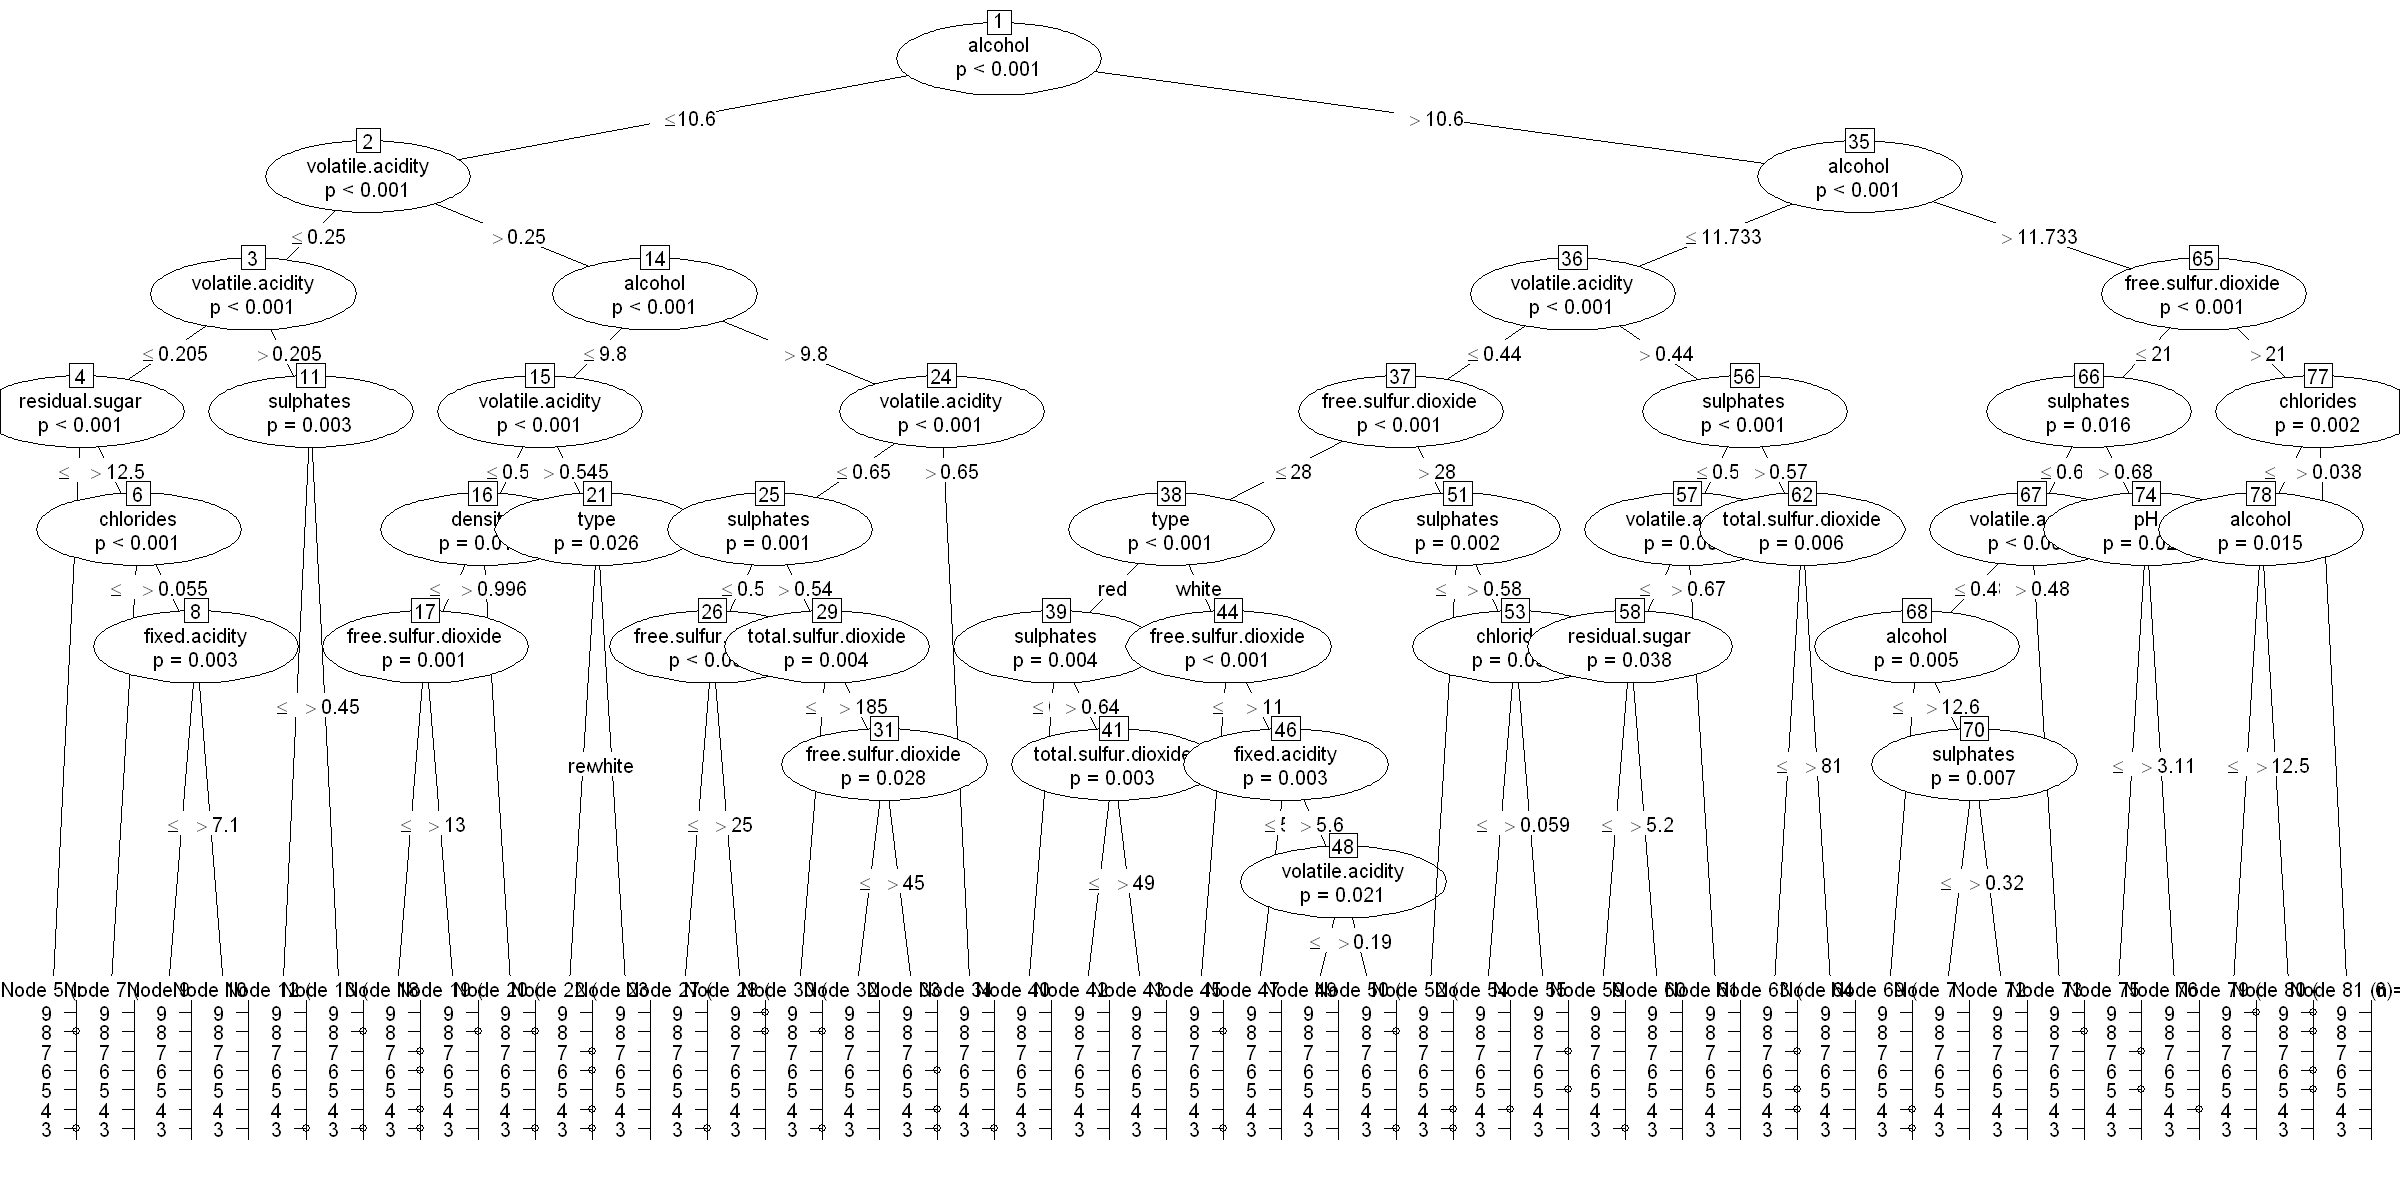

In [57]:
plot(mod_ct)

In [58]:
pred_ct <- predict(mod_ct, test)

In [59]:
xtabs(~round(pred_ct) + quality, test )

# mod_CT is 54.54% accurate on test.

              quality
round(pred_ct)   3   4   5   6   7   8
             5   2  24 258 138  14   1
             6   2  10 152 368 131  20
             7   0   0   8  68  81  18
             8   0   0   0   1   2   2

ctree prediction is better than rpart. Prediction by linear regression is very close to ctree prediction.

## Prediction using Random Forest

In [60]:
set.seed(100)

mod_rf <- randomForest(quality~ ., train)

In [61]:
pred_rf <- predict(mod_rf, test)

In [62]:
xtabs(~round(pred_rf) + quality, test)

# mod_rf is 69% accurate on test. Lets try to improve the model by tuning some parameters.

              quality
round(pred_rf)   3   4   5   6   7   8
             4   1   1   2   0   0   0
             5   1  23 298  68   6   3
             6   2  10 113 474 103  12
             7   0   0   5  33 119  21
             8   0   0   0   0   0   5

In [63]:
set.seed(200)

mod_rf2 <- randomForest(quality~ ., train, ntree = 500, mtry = 4)

In [64]:
pred_rf2 <- predict(mod_rf2, test)

In [65]:
xtabs(~round(pred_rf2) + quality, test)

# mod_rf2 is 69.15% accuratey on test. Accuracy of the moadel has improved a bit.

               quality
round(pred_rf2)   3   4   5   6   7   8
              4   1   2   2   0   0   0
              5   1  22 295  64   7   3
              6   2  10 117 479 104  11
              7   0   0   4  32 117  21
              8   0   0   0   0   0   6

In [66]:
set.seed(300)

mod_rf3 <- randomForest(quality~ ., train, ntree = 1000, mtry = 3, importance = TRUE)

In [67]:
pred_rf3 <- predict(mod_rf3, test)

In [68]:
xtabs(~round(pred_rf3) + quality, test)

# mod_rf3 is 68.92% accurate on test

               quality
round(pred_rf3)   3   4   5   6   7   8
              4   1   2   2   0   0   0
              5   1  22 294  67   3   3
              6   2  10 118 478 108  12
              7   0   0   4  30 117  21
              8   0   0   0   0   0   5

Random Forest prediction is much better than linear regression and Decision tree

## Prediction using gbm

In [69]:
mod_gbm = gbm(formula = quality ~ .,
            data = train,
            distribution = "gaussian",
            n.trees=800,
            interaction.depth=4,
            cv.folds=5,
            shrinkage=0.2,
            n.cores = 2)

In [70]:
pred_gbm <- predict(mod_gbm, test)

Using 159 trees...




In [71]:
xtabs(~round(pred_gbm) + quality, test)

# mod_gbm is 57.08% accurate on test

               quality
round(pred_gbm)   3   4   5   6   7   8
              4   1   4   4   0   0   0
              5   1  21 244 106  12   3
              6   2   9 165 409 132  11
              7   0   0   5  60  84  26
              8   0   0   0   0   0   1

## Conclusion

Accuracy of - 

(1) Linear Regression - 55.08% 
(2) rpart - 52.27% 
(3) ctree - 54.54% 
(4) random forest - 69.15% 
(5) gbm - 57.08%


Random forest is giving the best prediction.